<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

You work for a real estate company interested in using data science to determine the best properties to buy and re-sell. Specifically, your company would like to identify the characteristics of residential houses that estimate the sale price and the cost-effectiveness of doing renovations.

There are three components to the project:

1. Estimate the sale price of properties based on their "fixed" characteristics, such as neighborhood, lot size, number of stories, etc.


2. Estimate the impact of possible renovations to properties from the variation in sale price not explained by the fixed characteristics.  

3. Bonus Question: Determine the features in the housing data that best predict "abnormal" sales (foreclosures, etc.).

#### The full description of the data features can be found in a separate file in the project-3 repo: data_description.txt

#### For question one and two you will likely need to test different models to arrive at your "best model" for each question. This should not be an exhaustive exercise as the cleaning and eda ahead is significant enough by itself.  



#### This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).



In [1]:
import numpy as np
import scipy.stats as stats
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Correlation heatmap from github

def rddunlap23_corr_heatmap(df):
    corrs = df.corr()
    '''
    https://gist.github.com/rddunlap23/02d4014907ffaf9cbdf49f4004f82ba6
    '''
    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()


In [3]:
# Fundction to help me quickly count the nulls in a dataframe

def null_counter(df):
    '''
    Fundction to help me quickly count the nulls in a dataframe
    '''
    
    import pandas as pd
    return pd.DataFrame(df.isnull().sum()[df.isnull().sum() > 0])

The EDA and Data Cleaning Plan


Check for features that are int but are actually obj

Apply Dictionaries

Split the Data into Dummies then fixed/ (If we do this ahve have to come up with a mechanism to differenciate the dummy columns)
or
Split the Data into Fixed/renov then Dummies

In [4]:
# Load the data
house = pd.read_csv('./housing.csv')
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
# Applying Dictionary for column: ['MSSubClass']

MSSubClass_dict = {
        20 : '20 - 1-STORY 1946 & NEWER ALL STYLES',
        30 : '30 - 1-STORY 1945 & OLDER',
        40 : '40 - 1-STORY W/FINISHED ATTIC ALL AGES',
        45 : '45 - 1-1/2 STORY - UNFINISHED ALL AGES',
        50 : '50 - 1-1/2 STORY FINISHED ALL AGES',
        60 : '60 - 2-STORY 1946 & NEWER',
        70 : '70 - 2-STORY 1945 & OLDER',
        75 : '75 - 2-1/2 STORY ALL AGES',
        80 : '80 - SPLIT OR MULTI-LEVEL',
        85 : '85 - SPLIT FOYER',
        90 : '90 - DUPLEX - ALL STYLES AND AGES',
       120 : '120 - 1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150 : '150 - 1-1/2 STORY PUD - ALL AGES',
       160 : '160 - 2-STORY PUD - 1946 & NEWER',
       180 : '180 - PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190 : '190 - 2 FAMILY CONVERSION - ALL STYLES AND AGES'
    }

house['MSSubClass02'] = house['MSSubClass'].map(MSSubClass_dict)
house[['MSSubClass','MSSubClass02']]

house02 = house.drop(columns = ['MSSubClass'])
# house[['MSSubClass','MSSubClass02']]
house02[['MSSubClass02']]

,MSSubClass02
0,60 - 2-STORY 1946 & NEWER
1,20 - 1-STORY 1946 & NEWER ALL STYLES
2,60 - 2-STORY 1946 & NEWER
3,70 - 2-STORY 1945 & OLDER
4,60 - 2-STORY 1946 & NEWER
...,...
1455,60 - 2-STORY 1946 & NEWER
1456,20 - 1-STORY 1946 & NEWER ALL STYLES
1457,70 - 2-STORY 1945 & OLDER
1458,20 - 1-STORY 1946 & NEWER ALL STYLES


In [6]:
# Applying Dictionary for two columns: [['OverallQual02','OverallCond02']]

OverallQualCond_dict = {
       10 : '10 - Very Excellent',
       9 : '9 - Excellent',
       8 : '8 - Very Good',
       7 : '7 - Good',
       6 : '6 - Above Average',
       5 : '5 - Average',
       4 : '4 - Below Average',
       3 : '3 - Fair',
       2 : '2 - Poor',
       1 : '1 - Very Poor'
    }


house02['OverallQual02'] = house02['OverallQual'].map(OverallQualCond_dict)
house02['OverallCond02'] = house02['OverallCond'].map(OverallQualCond_dict)

#house = house.drop(columns = ['OverallQual', 'OverallCond'])

house02[['OverallQual','OverallQual02','OverallCond','OverallCond02']]

# Drop the unwanted columns
house03 = house02.drop(columns = ['OverallQual','OverallCond'])

# Display columns to make sure
house03[['OverallQual02','OverallCond02']]

,OverallQual02,OverallCond02
0,7 - Good,5 - Average
1,6 - Above Average,8 - Very Good
2,7 - Good,5 - Average
3,7 - Good,5 - Average
4,8 - Very Good,5 - Average
...,...,...
1455,6 - Above Average,5 - Average
1456,6 - Above Average,6 - Above Average
1457,7 - Good,9 - Excellent
1458,5 - Average,6 - Above Average


In [7]:
# No day-number for date, assumes sale takes place in the centre of the month

house03['MoYrSold'] = ((house03['MoSold']-0.5)/12) + house03['YrSold']

# house[['MoSold', 'YrSold']]
# house['MoSold'].unique()

# No longer need ['MoSold','YrSold']
house04 = house03.drop(columns = ['MoSold','YrSold'])


house05 = house04.drop(columns = ['Id'])
# house03[['MoSold','YrSold','MoYrSold']]


In [8]:
# Create a list-comprehension to find columns which are objects or  intergers & floats

for col in house05.columns:
    if house05[col].dtype != 'O':
        print(col, house05[col].dtype)
        
# [col for col in house05.columns if house05[col].dtype != 'O']

LotFrontage float64
LotArea int64
YearBuilt int64
YearRemodAdd int64
MasVnrArea float64
BsmtFinSF1 int64
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
TotRmsAbvGrd int64
Fireplaces int64
GarageYrBlt float64
GarageCars int64
GarageArea int64
WoodDeckSF int64
OpenPorchSF int64
EnclosedPorch int64
3SsnPorch int64
ScreenPorch int64
PoolArea int64
MiscVal int64
SalePrice int64
MoYrSold float64


In [9]:
# Find the non-Object columns that have nulls

# house05[[col for col in house05.columns if house05[col].dtype != 'O']].isnull().sum()
# house05[[col for col in house05.columns if house05[col].dtype != 'O']].isnull().sum()[house05[[col for col in house05.columns if house05[col].dtype != 'O']].isnull().sum() > 0]
house05[[col for col in house05.columns if house05[col].dtype != 'O']].isnull().sum()[house05[[col for col in house05.columns if house05[col].dtype != 'O']].isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [10]:
# List of non-object columns that contain nulls. Dataset big enough to drop them

['LotFrontage',
'MasVnrArea',
'GarageYrBlt']

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [11]:
# Drop nulls from column: 'LotFrontage' and name it house06

house06 = house05[house05['LotFrontage'].isnull() == False]
display(
    house05.shape,
    house06.shape
    )

(1460, 79)

(1201, 79)

In [12]:
# Drop nulls from column: 'MasVnrArea' and name it house07

house07 = house06[house06['MasVnrArea'].isnull() == False]
display(
    house06.shape,
    house07.shape
    )

(1201, 79)

(1195, 79)

In [13]:
# Drop nulls from column: 'GarageYrBlt' and name it house08

house08 = house07[house07['GarageYrBlt'].isnull() == False]
display(
    house07.shape,
    house08.shape
    )

(1195, 79)

(1121, 79)

In [14]:
# house08.columns.to_list()
# house08[['Condition1', 'Condition2']]

display(
    house08.shape#,
#    condition_dummies03.shape # NameError: name 'condition_dummies03' is not defined
    )

# pd.get_dummies(house08[['Condition1', 'Condition2']])

(1121, 79)

In [15]:
# house[['Condition1','Condition2']]

# display(
# house['Condition1'].unique(),
# house['Condition2'].unique()
#     )
uniques_of_conditions = list(house08['Condition1'].unique()) + list(house08['Condition2'].unique())
uniques_of_conditions02 = list(set(uniques_of_conditions))

display(
    uniques_of_conditions,
    uniques_of_conditions02
    )


['Norm',
 'Feedr',
 'Artery',
 'RRAe',
 'RRNn',
 'RRAn',
 'PosN',
 'PosA',
 'RRNe',
 'Norm',
 'Artery',
 'RRNn',
 'Feedr',
 'PosN',
 'PosA']

['RRNe', 'Feedr', 'RRAn', 'RRAe', 'RRNn', 'PosA', 'Artery', 'PosN', 'Norm']

In [16]:
col_names_Condition_dummies = ['Condition0_Artery',
 'Condition0_Feedr',
 'Condition0_Norm',
 'Condition0_PosA',
 'Condition0_PosN',
 'Condition0_RRAe',
 'Condition0_RRAn',
 'Condition0_RRNe',
 'Condition0_RRNn',
 'Condition0_Artery',
 'Condition0_Feedr',
 'Condition0_Norm',
 'Condition0_PosA',
 'Condition0_PosN',
 'Condition0_RRAe',
 'Condition0_RRAn',
 'Condition0_RRNn']

In [17]:
#house[['Condition1','Condition2']]



condition_dummies = pd.get_dummies(house08[['Condition1','Condition2']])
# 
# condition_dummies.columns = col_names_Condition_dummies

display(
    condition_dummies,
    condition_dummies.columns.to_list(),
    condition_dummies.describe()
    )

# condition_dummies

,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1456,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1457,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1458,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


['Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRNn']

,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,0.038359,0.049955,0.866191,0.003568,0.008029,0.008029,0.021409,0.000892,0.003568,0.001784,0.004460,0.989295,0.000892,0.001784,0.001784
std,0.192146,0.217950,0.340599,0.059655,0.089282,0.089282,0.144810,0.029867,0.059655,0.042220,0.066666,0.102954,0.029867,0.042220,0.042220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Make dummies and merge columns: Condition1 and Condition2


# This was BEFORE dropping the Nulls

# ['Condition1_Artery' + 'Condition2_Artery'
#  'Condition1_Feedr', 'Condition2_Feedr',
#  'Condition1_Norm', 'Condition2_Norm',
#  'Condition1_PosA', 'Condition2_PosA',
#  'Condition1_PosN', 'Condition2_PosN',
#  'Condition1_RRAe', 'Condition2_RRAe',
#  'Condition1_RRAn', 'Condition2_RRAn',
#  'Condition1_RRNe',
#  'Condition1_RRNn', 'Condition2_RRNn']


# This was AFTER dropping the Nulls

# ['Condition1_Artery', 'Condition2_Artery',
#  'Condition1_Feedr',  'Condition2_Feedr',
#  'Condition1_Norm', 'Condition2_Norm',
#  'Condition1_PosA', 'Condition2_PosA',
#  'Condition1_PosN', 'Condition2_PosN',
#  'Condition1_RRAe',
#  'Condition1_RRAn',
#  'Condition1_RRNe',
#  'Condition1_RRNn', 'Condition2_RRNn']
 


condition_dummies['Condition0_Artery'] = condition_dummies['Condition1_Artery'] + condition_dummies['Condition2_Artery']
condition_dummies['Condition0_Feedr'] = condition_dummies['Condition1_Feedr'] + condition_dummies['Condition2_Feedr']
condition_dummies['Condition0_Norm'] = condition_dummies['Condition1_Norm'] + condition_dummies['Condition2_Norm']
condition_dummies['Condition0_PosA'] = condition_dummies['Condition1_PosA'] + condition_dummies['Condition2_PosA']
condition_dummies['Condition0_PosN'] = condition_dummies['Condition1_PosN'] + condition_dummies['Condition2_PosN']
condition_dummies['Condition0_RRAe'] = condition_dummies['Condition1_RRAe']
condition_dummies['Condition0_RRAn'] = condition_dummies['Condition1_RRAn']
condition_dummies['Condition0_RRNe'] = condition_dummies['Condition1_RRNe']
condition_dummies['Condition0_RRNn'] = condition_dummies['Condition1_RRNn'] + condition_dummies['Condition2_RRNn']
 

col_list_cond0s = ['Condition0_Artery', 'Condition0_Feedr', 'Condition0_Norm', 'Condition0_PosA', 'Condition0_PosN', 'Condition0_RRAe', 'Condition0_RRAn', 'Condition0_RRNe', 'Condition0_RRNn']

#condition_dummies
condition_dummies02 = condition_dummies[col_list_cond0s]
condition_dummies03 = condition_dummies02.replace(2,1) # Dummies are binary
# condition_dummies02.columns

# condition_dummies[col_list_cond0s].value_counts()
# pd.DataFrame(condition_dummies[col_list_cond0s].value_counts())
# condition_dummies['Condition0_Norm'].value_counts()
# condition_dummies['Condition0_Norm'].replace('2', '1')


# Still need to replace the 2s in condition_dummies02
display(
    condition_dummies03.describe(),

#     This is a list-comp for columns ith 2s:
    [x for x in condition_dummies03.columns if max(condition_dummies03[x]) == 2]

    )

,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,Condition0_RRNn
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,0.038359,0.054416,0.989295,0.004460,0.008029,0.008029,0.021409,0.000892,0.005352
std,0.192146,0.226937,0.102954,0.066666,0.089282,0.089282,0.144810,0.029867,0.072996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[]

In [19]:
# Use .describe() to make sure there are no 2' in a binary dummy

# condition_dummies02[[x for x in condition_dummies02.columns if max(condition_dummies02[x]) == 2]].replace(2,1)
# condition_dummies02[[x for x in condition_dummies02.columns if max(condition_dummies02[x]) == 2]].replace(2,1).describe()
condition_dummies03 = condition_dummies02.replace(2,1)
display(
    condition_dummies03.describe(),
    condition_dummies03.columns,
    [x for x in condition_dummies03.columns if max(condition_dummies03[x]) == 2],
    condition_dummies03.shape
    )


# Can Use condition_dummies03

,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,Condition0_RRNn
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,0.038359,0.054416,0.989295,0.004460,0.008029,0.008029,0.021409,0.000892,0.005352
std,0.192146,0.226937,0.102954,0.066666,0.089282,0.089282,0.144810,0.029867,0.072996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Index(['Condition0_Artery', 'Condition0_Feedr', 'Condition0_Norm',
       'Condition0_PosA', 'Condition0_PosN', 'Condition0_RRAe',
       'Condition0_RRAn', 'Condition0_RRNe', 'Condition0_RRNn'],
      dtype='object')

[]

(1121, 9)

In [20]:
# Drop the old columns ['Condition1', 'Condition2']

house09 = house08.drop(columns = ['Condition1', 'Condition2'])

house09.shape

(1121, 77)

In [21]:
# Drop all row that are not residential

house10 = pd.concat([house09,condition_dummies03],axis = 1)

# MSZoning: Identifies the general zoning classification of the sale.
		
#        A	Agriculture
#        C	Commercial
#        FV	Floating Village Residential
#        I	Industrial
#        RH	Residential High Density
#        RL	Residential Low Density
#        RP	Residential Low Density Park 
#        RM	Residential Medium Density


house10 = house10[house10['MSZoning'].isin(['RL', 'RM', 'FV', 'RH'])]

house10.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', '

In [22]:
# .unique() = ['RL', 'RM', 'C (all)', 'FV', 'RH']

['RL', 'RM', 'FV', 'RH']


house10[house10['MSZoning'].isin(['RL', 'RM', 'FV', 'RH'])]

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoYrSold,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,Condition0_RRNn
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2008.125000,0,0,1,0,0,0,0,0,0
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,2007.375000,0,1,1,0,0,0,0,0,0
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,2008.708333,0,0,1,0,0,0,0,0,0
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,2006.125000,0,0,1,0,0,0,0,0,0
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,2008.958333,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2007.625000,0,0,1,0,0,0,0,0,0
1456,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2010.125000,0,0,1,0,0,0,0,0,0
1457,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2010.375000,0,0,1,0,0,0,0,0,0
1458,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2010.291667,0,0,1,0,0,0,0,0,0


In [23]:
# Function built to Project 3 to create  a columns deciding if a row is for testing or for traning

def test_train_labeller(year):
    '''
    Function built to Project 3 to create  a columns deciding if a row is for testing or for traning
    '''
    if year >= 2010:
        return 'Test'
    else:
        return 'Train'

# 'MoYrSold'
# house10[['YearBuilt']]
house10[['YearBuilt']] >= 2010
house11 = house10.copy()
house11['TestOrTrain'] = house11['MoYrSold'].map(test_train_labeller)
house11[['MoYrSold','TestOrTrain']].head(60)

# Eyeball the data to check the dictionary is labelling it properly

,MoYrSold,TestOrTrain
0,2008.125000,Train
1,2007.375000,Train
2,2008.708333,Train
3,2006.125000,Train
4,2008.958333,Train
5,2009.791667,Train
6,2007.625000,Train
8,2008.291667,Train
9,2008.041667,Train
10,2008.125000,Train


In [24]:
# Get counts to put in slideshow

house11['TestOrTrain'].value_counts()

Train    984
Test     129
Name: TestOrTrain, dtype: int64

In [25]:
# Check how many months are included in the data


(house11['MoYrSold'].max() - house11['MoYrSold'].min())*12

54.0

```python
house11['MoYrSold'].hist(bins = 54)
```

<AxesSubplot:>

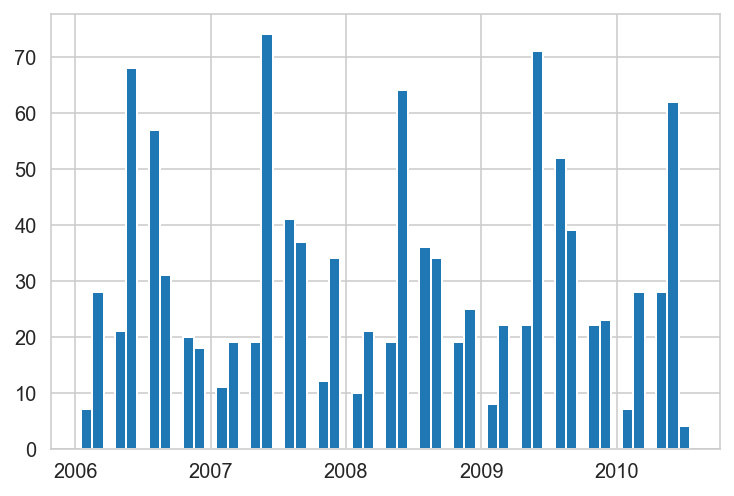

In [26]:
house11['MoYrSold'].hist(bins = 54)

In [27]:
# List and for-loop to both determine and split Fixed vs Renovatable


# List of Features prevously altered in code:
    # condition_dummies02
    
#     ['Condition0_Artery', 'Condition0_Feedr', 'Condition0_Norm',
#        'Condition0_PosA', 'Condition0_PosN', 'Condition0_RRAe',
#        'Condition0_RRAn', 'Condition0_RRNe', 'Condition0_RRNn']
    
#     'OverallQual','OverallQual02','OverallCond','OverallCond02'
    
#     'MSSubClass02'
    
#     'MSSubClass'
    
    
    
    


renovate_0_1 = [# 'Id', 0, # Remove ID from all subsets
# 'MSSubClass', 0, # Coverted to object with dictionary
 'MSSubClass02', 0, # Coverted to object with dictionary
 'MSZoning', 0,
 'LotFrontage', 0,
 'LotArea', 0,
 'Street', 0,
 'Alley', 0,
 'LotShape', 0,
 'LandContour', 0,
 'Utilities', 0,
 'LotConfig', 0,
 'LandSlope', 0,
 'Neighborhood', 0,
# 'Condition1', 0, # Already dummified
# 'Condition2', 0, # Already dummified
 'Condition0_Artery', 0, # Already dummified
 'Condition0_Feedr', 0, # Already dummified
 'Condition0_Norm', 0, # Already dummified
 'Condition0_PosA', 0, # Already dummified
 'Condition0_PosN', 0, # Already dummified
 'Condition0_RRAe', 0, # Already dummified
 'Condition0_RRAn', 0, # Already dummified
 'Condition0_RRNe', 0, # Already dummified
 'Condition0_RRNn', 0, # Already dummified
 'BldgType', 0,
 'HouseStyle', 1,
# 'OverallQual', 1, # Coverted to object with dictionary
 'OverallQual02', 1, # Coverted to object with dictionary
# 'OverallCond', 1, # Coverted to object with dictionary
 'OverallCond02', 1, # Coverted to object with dictionary
 'YearBuilt', 0,
 'YearRemodAdd', 0,
 'RoofStyle', 1,
 'RoofMatl', 1,
 'Exterior1st', 1,
 'Exterior2nd', 1,
 'MasVnrType', 1, 
 'MasVnrArea', 1, 
 'ExterQual', 1,
 'ExterCond', 1, 
 'Foundation', 0,
 'BsmtQual', 0, # Evaluates the height of the basement - This is FIXED, not Renovatable
 'BsmtCond', 1,
 'BsmtExposure', 0,
 'BsmtFinType1', 1,
 'BsmtFinSF1', 0,
 'BsmtFinType2', 1,
 'BsmtFinSF2', 1,
 'BsmtUnfSF', 1,
 'TotalBsmtSF', 0,
 'Heating', 1,
 'HeatingQC', 1,
 'CentralAir', 1,
 'Electrical', 1,
 '1stFlrSF', 0,
 '2ndFlrSF', 0,
 'LowQualFinSF', 0,
 'GrLivArea', 0,
 'BsmtFullBath', 1,
 'BsmtHalfBath', 1,
 'FullBath', 1,
 'HalfBath', 1,
 'BedroomAbvGr', 1,
 'KitchenAbvGr', 1,
 'KitchenQual', 1,
 'TotRmsAbvGrd', 1,
 'Functional', 1,
 'Fireplaces', 1,
 'FireplaceQu', 1,
 'GarageType', 0,
 'GarageYrBlt', 0,
 'GarageFinish', 1,
 'GarageCars', 0,
 'GarageArea', 0,
 'GarageQual', 1,
 'GarageCond', 1,
 'PavedDrive', 0,
 'WoodDeckSF', 1,
 'OpenPorchSF', 1,
 'EnclosedPorch', 1,
 '3SsnPorch', 1,
 'ScreenPorch', 1,
 'PoolArea', 1,
 'PoolQC', 1,
 'Fence', 1,
 'MiscFeature', 1,
 'MiscVal', 1,
#  'MoSold', 0,
#  'YrSold', 0,
 'MoYrSold', 0, # Created using prevous two
 'SaleType', 0,
 'SaleCondition', 0,
 'TestOrTrain', 0, # Need in both because this is how we split the Train and Test
 'TestOrTrain', 1, # Need in both because this is how we split the Train and Test
 'SalePrice', 0, # Add target variable to BOTH subsets
 'SalePrice', 1 # Add target variable to BOTH subsets
               ]



fixed_features = []
renov_features = []

# This is a for-loop for all the fixed/non-renovatable features

for z in range(len(renovate_0_1)):
    if z == 0:
        continue
    elif z % 2 != 0 and renovate_0_1[z] == 0:
        fixed_features.append(renovate_0_1[z-1])
    elif z % 2 != 0 and renovate_0_1[z] == 1:
        renov_features.append(renovate_0_1[z-1])

display(
    list(fixed_features),
    len(fixed_features),
    renov_features,
    len(renov_features),
    len(renovate_0_1)
    )

['MSSubClass02',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition0_Artery',
 'Condition0_Feedr',
 'Condition0_Norm',
 'Condition0_PosA',
 'Condition0_PosN',
 'Condition0_RRAe',
 'Condition0_RRAn',
 'Condition0_RRNe',
 'Condition0_RRNn',
 'BldgType',
 'YearBuilt',
 'YearRemodAdd',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageType',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'MoYrSold',
 'SaleType',
 'SaleCondition',
 'TestOrTrain',
 'SalePrice']

43

['HouseStyle',
 'OverallQual02',
 'OverallCond02',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'TestOrTrain',
 'SalePrice']

46

178

In [28]:
# Assign the subsets to the questions

house11_Q1 = house11[fixed_features]

house11_Q2 = house11[renov_features]

# house10_Q1_X = house10_Q1.drop(columns = 'SalePrice')
# house10_Q1_X = pd.get_dummies(house10_Q1_X)
# house10_Q1_y = house10_Q1['SalePrice']

# display(
#     house10_Q1_X.dtypes.value_counts(),
#     house10_Q1_X.shape,
#     house10_Q1_y.shape
#     )



In [29]:
# dsi-unit-3.05-regression-sklearn_statsmodels_intro-lesson


# lm = linear_model.LinearRegression()
# X = df[["B"]]
# y = target 
# model = lm.fit(X, y)

# model.coef_

# model.intercept_


In [30]:
def lin_reg302(x,y):
    '''
       
    Gets the optimal Slope and y intercept
    Using other libraries for standard Deviation and Pearson Correlation Coef.
    Note that in SLR, the correlation coefficient multiplied by the standard
    deviation of y divided by standard deviation of x is the optimal slope.
    
    Source: dsi-unit-3.02-regression-simple_linear_regression-lab
    
    
    You can get the same output by putting .params[0] and .params[1] at the and of your results
    Your results is usually just after your .fit()
    
    Source: dsi-unit-3.39-regression-review-lab
    
    
    '''
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    
    # Pearson Co. Coef returns a tuple so it needs to be sliced/indexed
    # the optimal beta is found by: mean(y) - b1 * mean(x)
    beta_0 = np.mean(y)-(beta_1*np.mean(x)) 
    
    #Print the Optimal Values
#     print('The Optimal Y Intercept is ', beta_0)
#     print('The Optimal slope is ', beta_1)
    return [beta_0,beta_1]
    

In [31]:
def get_beta_1_reg302(x,y):
    import scipy.stats
    '''
       
    Gets the optimal Slope and y intercept
    Using other libraries for standard Deviation and Pearson Correlation Coef.
    Note that in SLR, the correlation coefficient multiplied by the standard
    deviation of y divided by standard deviation of x is the optimal slope.
    
    Source: dsi-unit-3.02-regression-simple_linear_regression-lab
    
    
    You can get the same output by putting .params[0] and .params[1] at the and of your results
    Your results is usually just after your .fit()
    
    Source: dsi-unit-3.39-regression-review-lab
    
    
    '''
    
    #Print the Optimal Values
    #print('The Optimal Y Intercept is ', beta_0)
    #print('The Optimal slope is ', beta_1)
    
    return (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))

In [32]:
def get_beta_0_reg302(x,y):
    import scipy.stats
    '''
       
    Gets the optimal Slope and y intercept
    Using other libraries for standard Deviation and Pearson Correlation Coef.
    Note that in SLR, the correlation coefficient multiplied by the standard
    deviation of y divided by standard deviation of x is the optimal slope.
    
    Source: dsi-unit-3.02-regression-simple_linear_regression-lab
    
    
    You can get the same output by putting .params[0] and .params[1] at the and of your results
    Your results is usually just after your .fit()
    
    Source: dsi-unit-3.39-regression-review-lab
    
    
    '''

    #Print the Optimal Values
    #print('The Optimal Y Intercept is ', beta_0)
    #print('The Optimal slope is ', beta_1)
    return np.mean(y)-(beta_1*np.mean(x)) 

In [33]:
def corr_sort(df):
    '''
    Creates an output DataFrame with correlations between all features.
    Beware of Anscombe's quartet
    
    Inspired by dsi-unit-3.11-regression-regularization-lesson
    Written by Krisdan
    '''
    import pandas as pd
    df = pd.DataFrame(df.corr().stack())
    df = df.reset_index()
    df = df.rename(columns = {0 : 'corr'})
    df = df.sort_values(by = 'corr', ascending  = False)
    df = df[df['level_0'] != df['level_1']]
    df = df.reset_index(drop=True)
    return df

In [34]:
# Take good look at the effect of pd.get_dummies()

display(
    house11,
    house11.dtypes.value_counts(),
    pd.get_dummies(house11),
    pd.get_dummies(house11).dtypes.value_counts()
    )

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,Condition0_RRNn,TestOrTrain
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,0,Train
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,1,1,0,0,0,0,0,0,Train
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,0,Train
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,1,0,0,0,0,0,0,Train
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,1,0,0,0,0,0,0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,0,Train
1456,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,0,Test
1457,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,0,Test
1458,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,0,Test


object     45
int64      29
uint8       9
float64     4
dtype: int64

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OverallCond02_2 - Poor,OverallCond02_3 - Fair,OverallCond02_4 - Below Average,OverallCond02_5 - Average,OverallCond02_6 - Above Average,OverallCond02_7 - Good,OverallCond02_8 - Very Good,OverallCond02_9 - Excellent,TestOrTrain_Test,TestOrTrain_Train
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,0,1
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,0,1,0,0,1
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,0,1
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,0,0,0,0,0,1
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,0,0,1,0,0,0,0,0,1
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,0,0,0,0,0,0,1,1,0
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,0,0,0,0,1,0,0,0,1,0


uint8      269
int64       29
float64      4
dtype: int64

In [35]:
# Test which order to feel the parameters into to make sure it's rise-over-run and not run-over-rise


import scipy.stats

display(
lin_reg302(pd.get_dummies(house11)['GrLivArea'],pd.get_dummies(house11)['SalePrice']),
lin_reg302(pd.get_dummies(house11)['SalePrice'],pd.get_dummies(house11)['GrLivArea'])
    )

[15238.166272517905, 111.51847166135587]

[702.9906957723784, 0.004459695455924795]

In [36]:
#Create correlation table from cleaned data 'house11' and filter only the correlation to 'SalePrice'

house11_SalePrice_Corr = corr_sort(pd.get_dummies(house11))[corr_sort(pd.get_dummies(house11))['level_0'] == 'SalePrice']


house11_SalePrice_Corr = house11_SalePrice_Corr.reset_index(drop = True)

# house11_SalePrice_Corr['beta_0'] = get_beta_1_reg302(pd.get_dummies(house11)[house11_SalePrice_Corr['level_1']],pd.get_dummies(house11)[house11_SalePrice_Corr['level_0']])
# TypeError: No loop matching the specified signature and casting was found for ufunc add
# house11_SalePrice_Corr


# Create new columns with their Beta0 and Beta1s
house11_SalePrice_Corr['beta_0'] = [lin_reg302(pd.get_dummies(house11)[x],pd.get_dummies(house11)['SalePrice'])[0] for x in house11_SalePrice_Corr['level_1'].values]
house11_SalePrice_Corr['beta_1'] = [lin_reg302(pd.get_dummies(house11)[x],pd.get_dummies(house11)['SalePrice'])[1] for x in house11_SalePrice_Corr['level_1'].values]


# house11_SalePrice_Corr.shape[0]



In [37]:
# Create to columns to help distinquish from the dummes and the intergers

# house11_SalePrice_Corr['level_1_dtype'] = pd.get_dummies(house11)[house11_SalePrice_Corr['level_1']].dtype
# AttributeError: 'DataFrame' object has no attribute 'dtype'

house11_SalePrice_Corr['level_1_dtype'] = [pd.get_dummies(house11)[x].dtype for x in house11_SalePrice_Corr['level_1'].values]


In [38]:
house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'int64'].sort_values(by = 'corr', ascending = False)

,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
0,SalePrice,GrLivArea,0.705222,1.523817e+04,111.518472,int64
1,SalePrice,GarageCars,0.650192,3.149145e+04,82311.054751,int64
2,SalePrice,GarageArea,0.629252,4.875488e+04,273.563426,int64
3,SalePrice,TotalBsmtSF,0.613378,6.342166e+04,113.809037,int64
4,SalePrice,1stFlrSF,0.605124,3.376799e+04,129.693103,int64
6,SalePrice,FullBath,0.562486,5.172044e+04,84899.190866,int64
7,SalePrice,TotRmsAbvGrd,0.547630,-1.108712e+03,28480.269462,int64
9,SalePrice,YearBuilt,0.520657,-2.573769e+06,1399.192522,int64
11,SalePrice,YearRemodAdd,0.514934,-3.860668e+06,2037.844936,int64
16,SalePrice,Fireplaces,0.458285,1.498849e+05,59918.874072,int64


In [39]:
# Check Top 60 and bottom 60

display(
    house11_SalePrice_Corr.sort_values(by = 'corr', ascending = False).head(60),
    house11_SalePrice_Corr.sort_values(by = 'corr', ascending = True).head(60)
    )

,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
0,SalePrice,GrLivArea,0.705222,1.523817e+04,111.518472,int64
1,SalePrice,GarageCars,0.650192,3.149145e+04,82311.054751,int64
2,SalePrice,GarageArea,0.629252,4.875488e+04,273.563426,int64
3,SalePrice,TotalBsmtSF,0.613378,6.342166e+04,113.809037,int64
4,SalePrice,1stFlrSF,0.605124,3.376799e+04,129.693103,int64
5,SalePrice,BsmtQual_Ex,0.581399,1.701126e+05,159219.006522,uint8
6,SalePrice,FullBath,0.562486,5.172044e+04,84899.190866,int64
7,SalePrice,TotRmsAbvGrd,0.547630,-1.108712e+03,28480.269462,int64
8,SalePrice,KitchenQual_Ex,0.535835,1.730528e+05,161750.145416,uint8
9,SalePrice,YearBuilt,0.520657,-2.573769e+06,1399.192522,int64


,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
299,SalePrice,ExterQual_TA,-0.614703,248106.434298,-103637.717431,uint8
298,SalePrice,KitchenQual_TA,-0.538111,229484.811518,-89054.774481,uint8
297,SalePrice,GarageFinish_Unf,-0.512402,224553.947798,-85203.053798,uint8
296,SalePrice,BsmtQual_TA,-0.477659,220555.203150,-79813.648756,uint8
295,SalePrice,GarageType_Detchd,-0.412228,208603.451861,-74397.080604,uint8
294,SalePrice,OverallQual02_5 - Average,-0.394763,206247.723457,-73355.442929,uint8
293,SalePrice,MasVnrType_None,-0.382945,223945.798265,-64301.620351,uint8
292,SalePrice,Foundation_CBlock,-0.378233,211955.087218,-63792.399718,uint8
291,SalePrice,HeatingQC_TA,-0.334141,203296.052045,-61900.290607,uint8
290,SalePrice,LotShape_Reg,-0.328858,227640.863095,-59250.017535,uint8


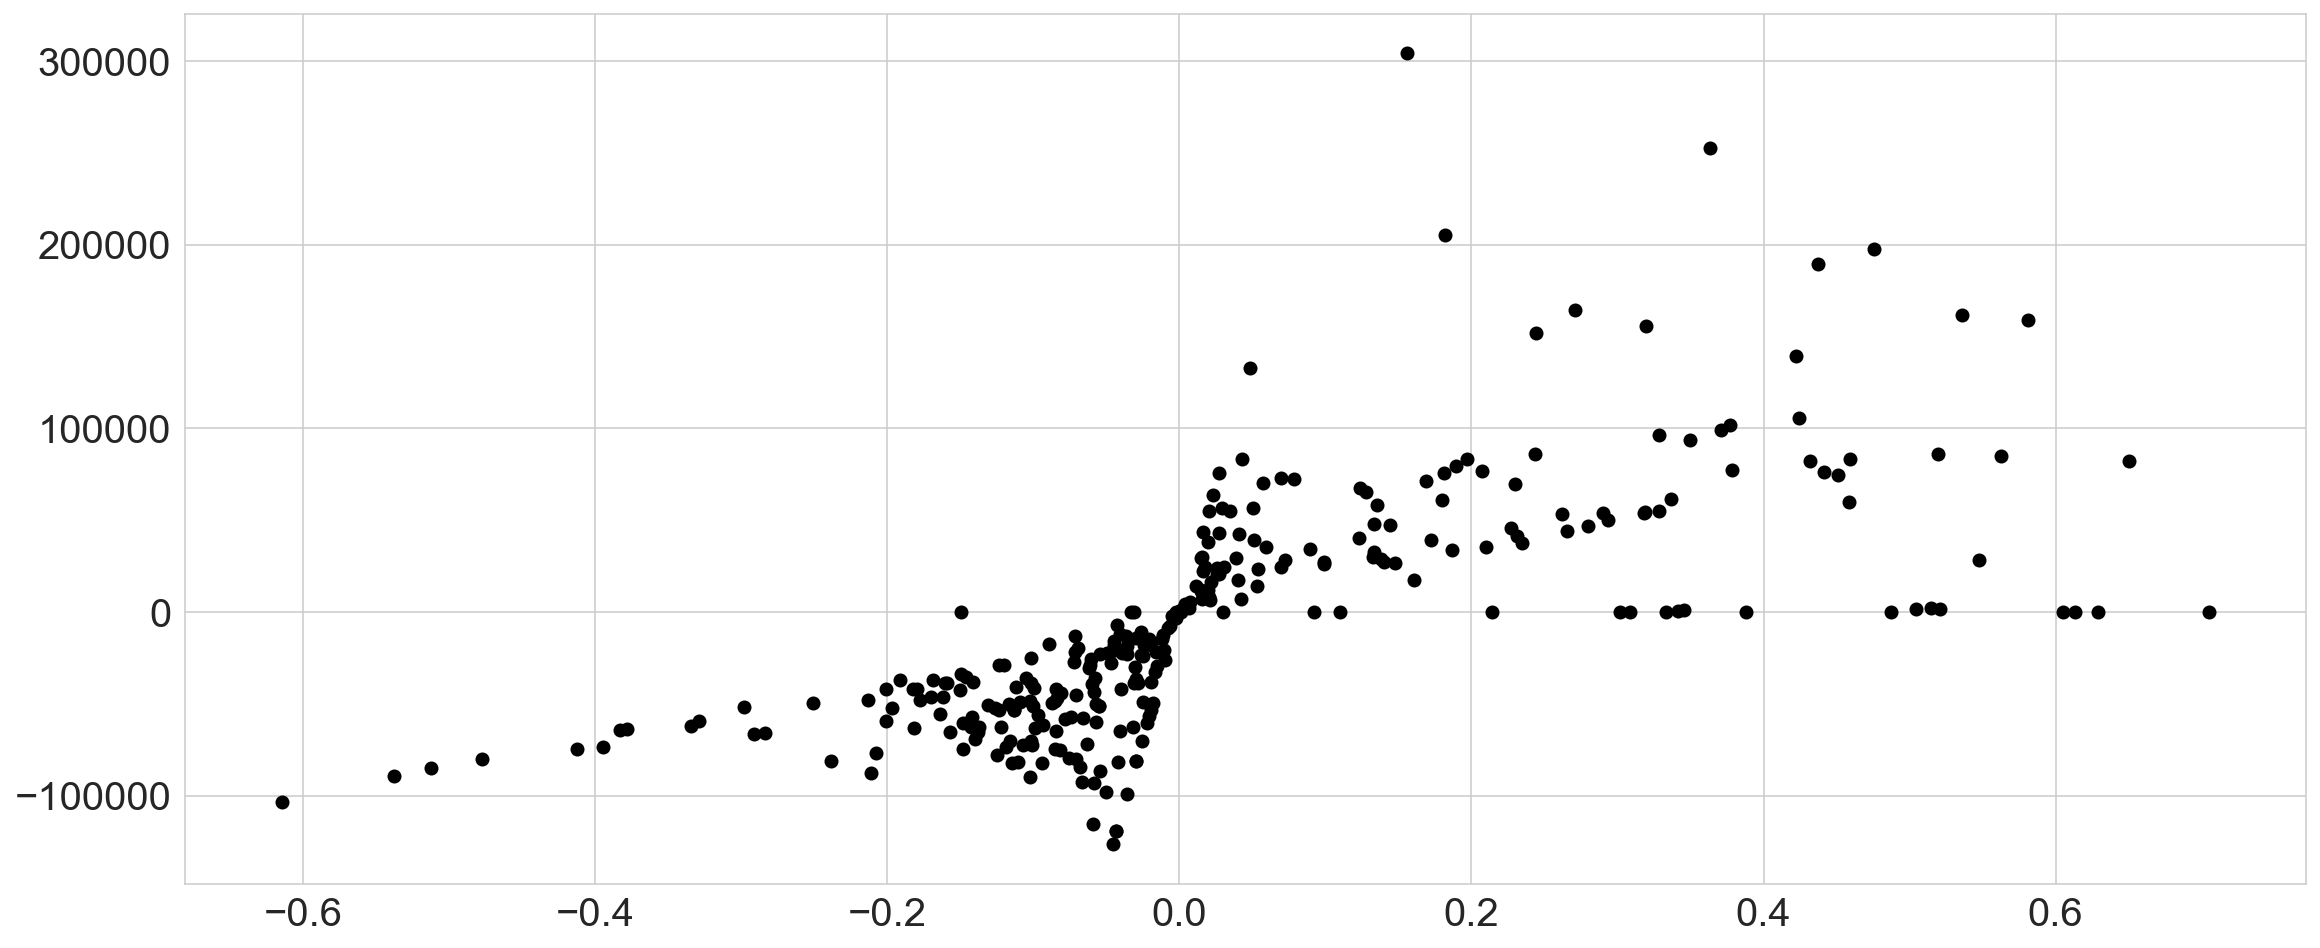

In [40]:
# Create scatter graph for all features, Correlation vs Beta1

# sns.plot(x='corr', y='beta_1', data=house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'int64'])
# AttributeError: module 'seaborn' has no attribute 'plot'


# Plot showing out linear forcast
fig = plt.figure(figsize=(19,8))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
#This is filtered by 'int64'
# ax.scatter(
#     x= house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'int64']['corr'], 
#     y=house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'int64']['beta_1'], 
#     c='k'
#     )

ax.scatter(
    x= house11_SalePrice_Corr['corr'], 
    y=house11_SalePrice_Corr['beta_1'], 
    c='k'
    )

# ax.plot(
#     house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'int64']['corr'], 
#     house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'int64']['beta_1'], 
#     color='r'
# )

In [41]:

def scatter_maker(df,x,y,size):
    fig = plt.figure(figsize=(size,size))

    # change the fontsize of minor ticks label
    plot = fig.add_subplot(111)
    plot.tick_params(axis='both', which='major', labelsize=20)

    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(
        x= df[x], 
        y=df[y], 
        c='k')

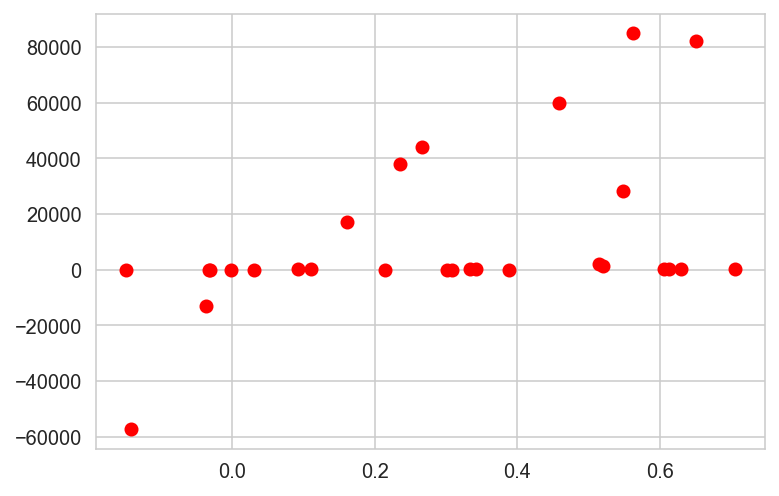

In [42]:
plt.scatter(
    house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'int64']['corr'], 
    house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'int64']['beta_1'], 
    color='r'
)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\P

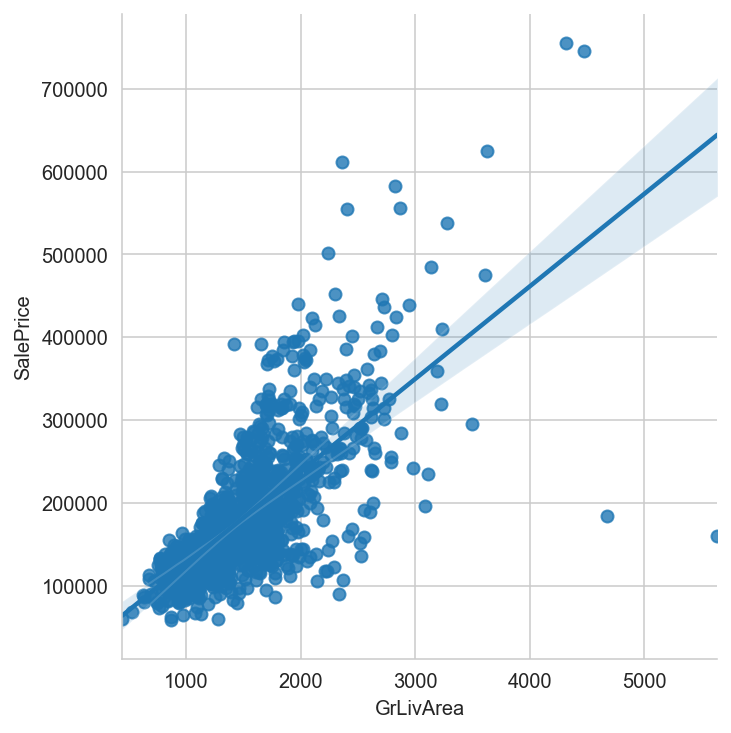

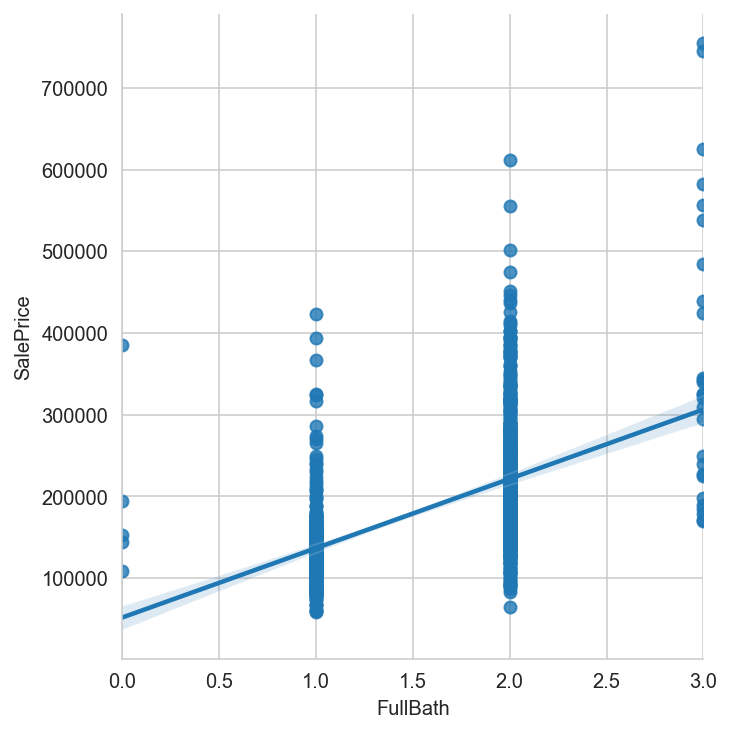

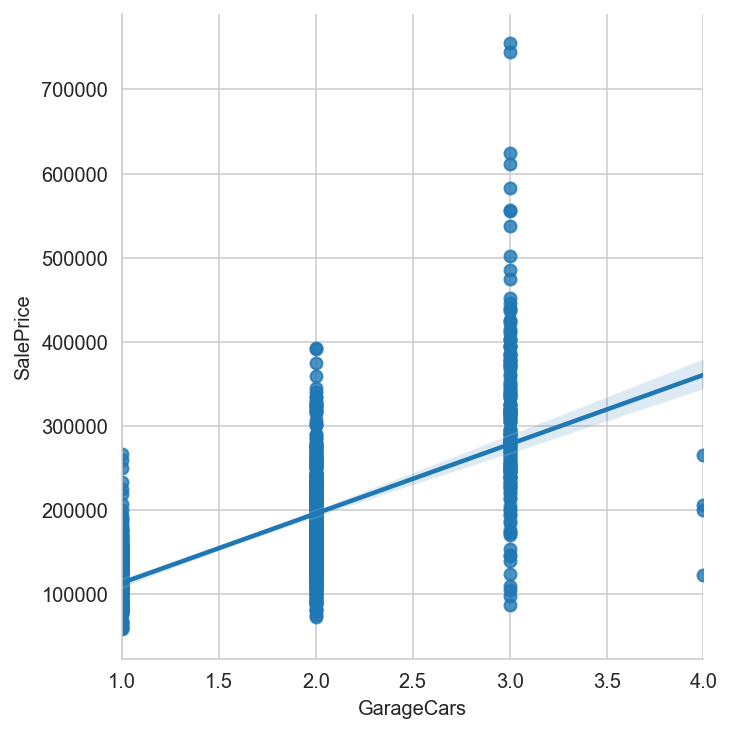

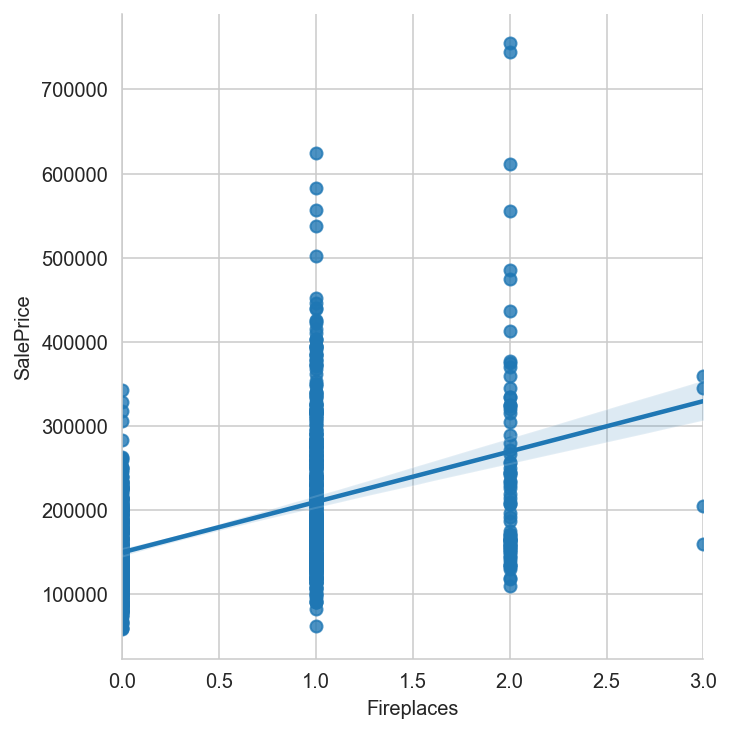

In [43]:
# Visualise the linear relationships

display(
    sns.lmplot('GrLivArea','SalePrice', house11),
    sns.lmplot('FullBath','SalePrice', house11),
    sns.lmplot('GarageCars','SalePrice', house11),
    sns.lmplot('Fireplaces','SalePrice', house11)
    )


# dsi-unit-3.08-evaluation-cross_validation_train_test-lesson


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


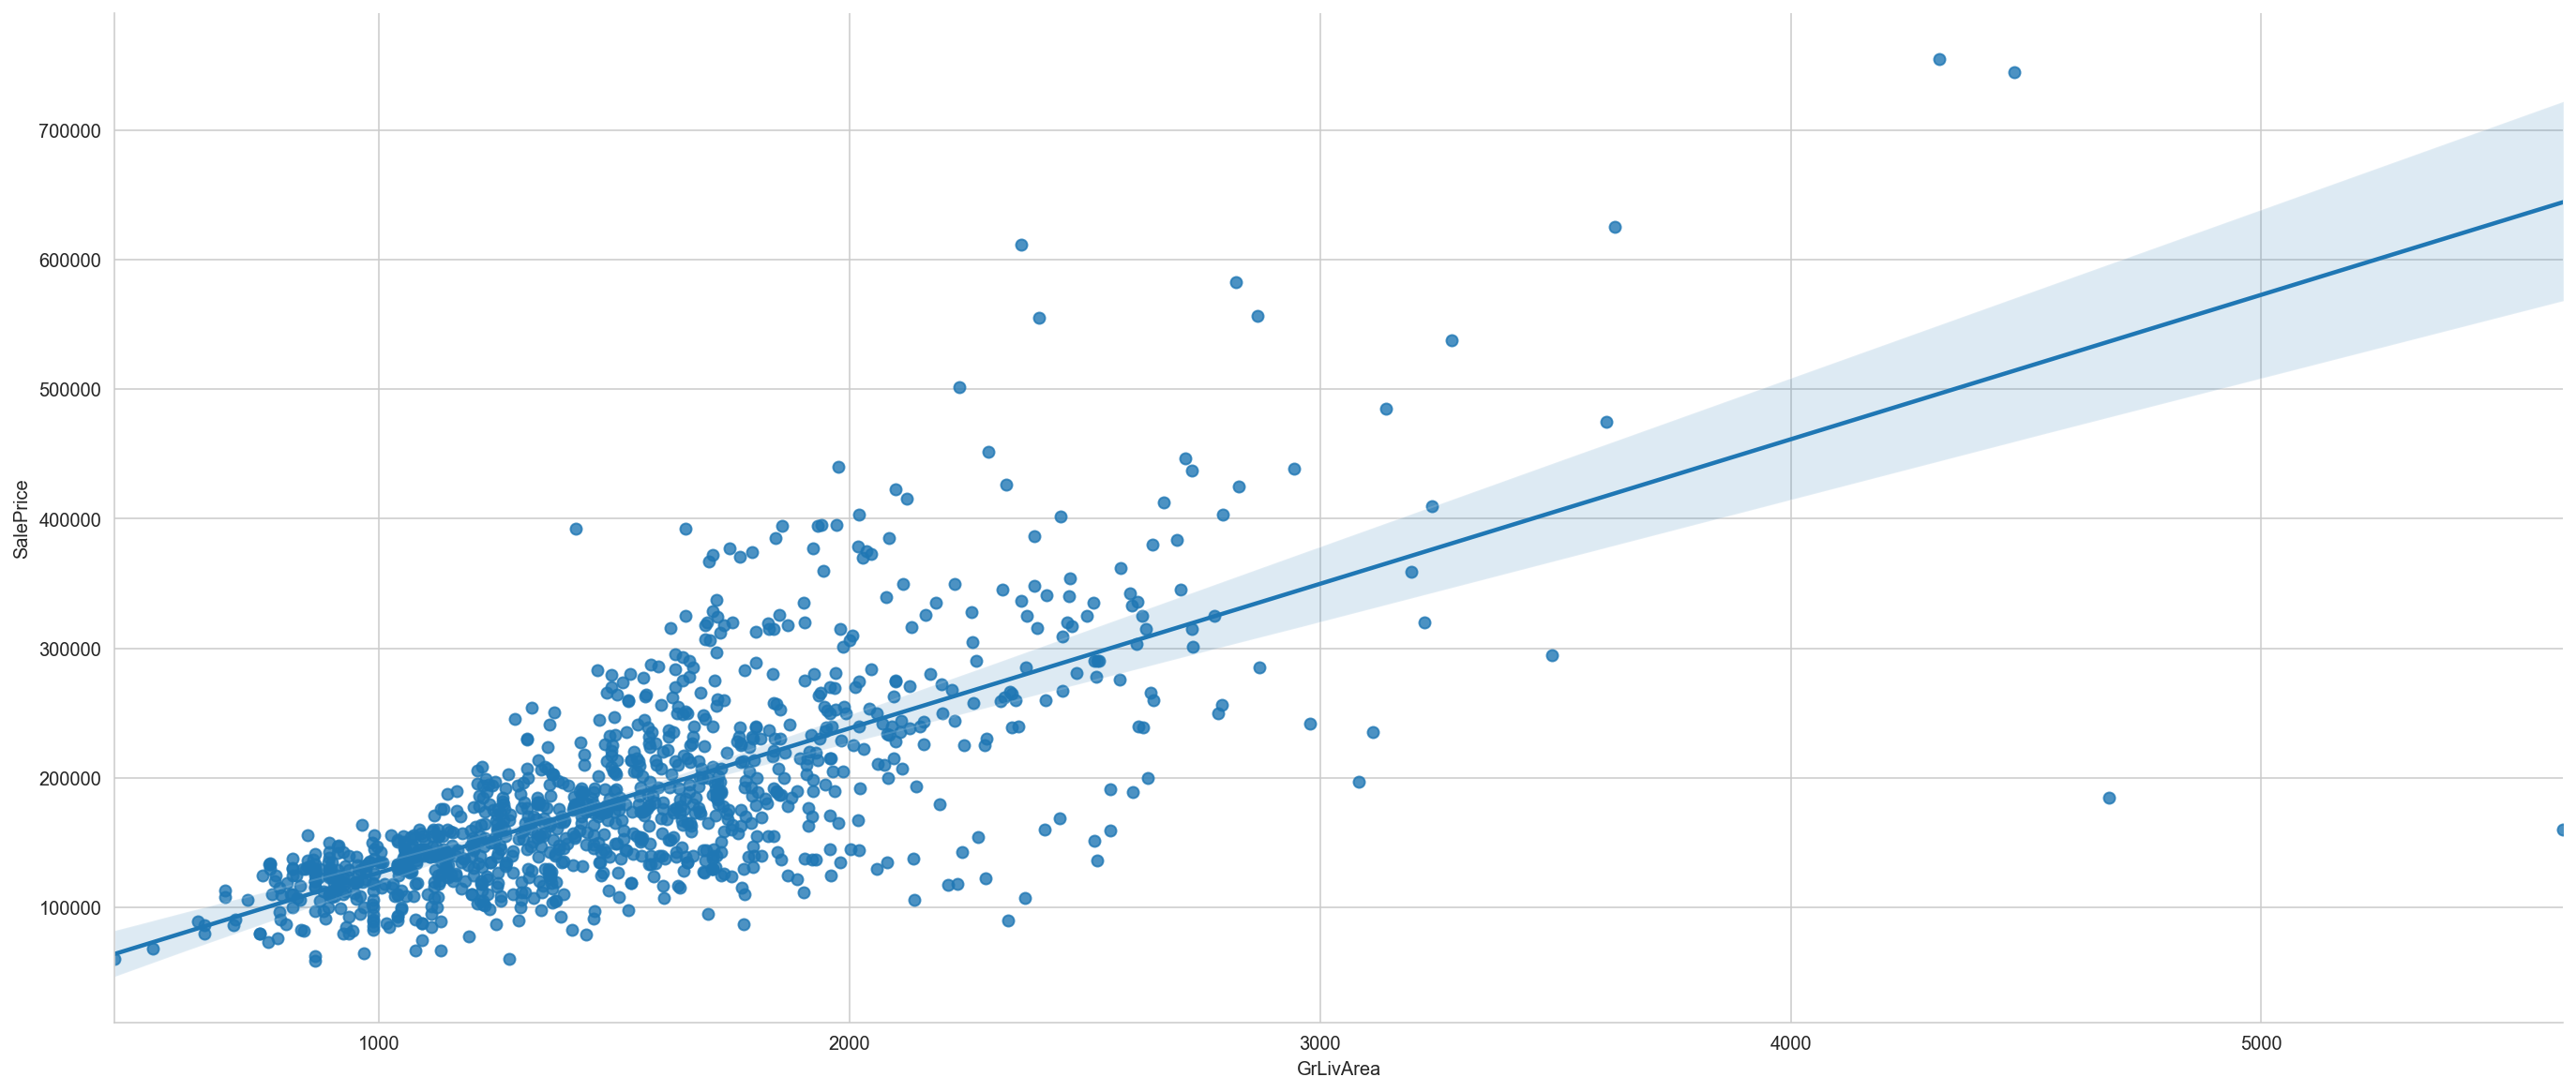

In [44]:
# Create a big plot to put in the slideshow 

sns.lmplot('GrLivArea','SalePrice', house11, height=8, aspect=(19/8))

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


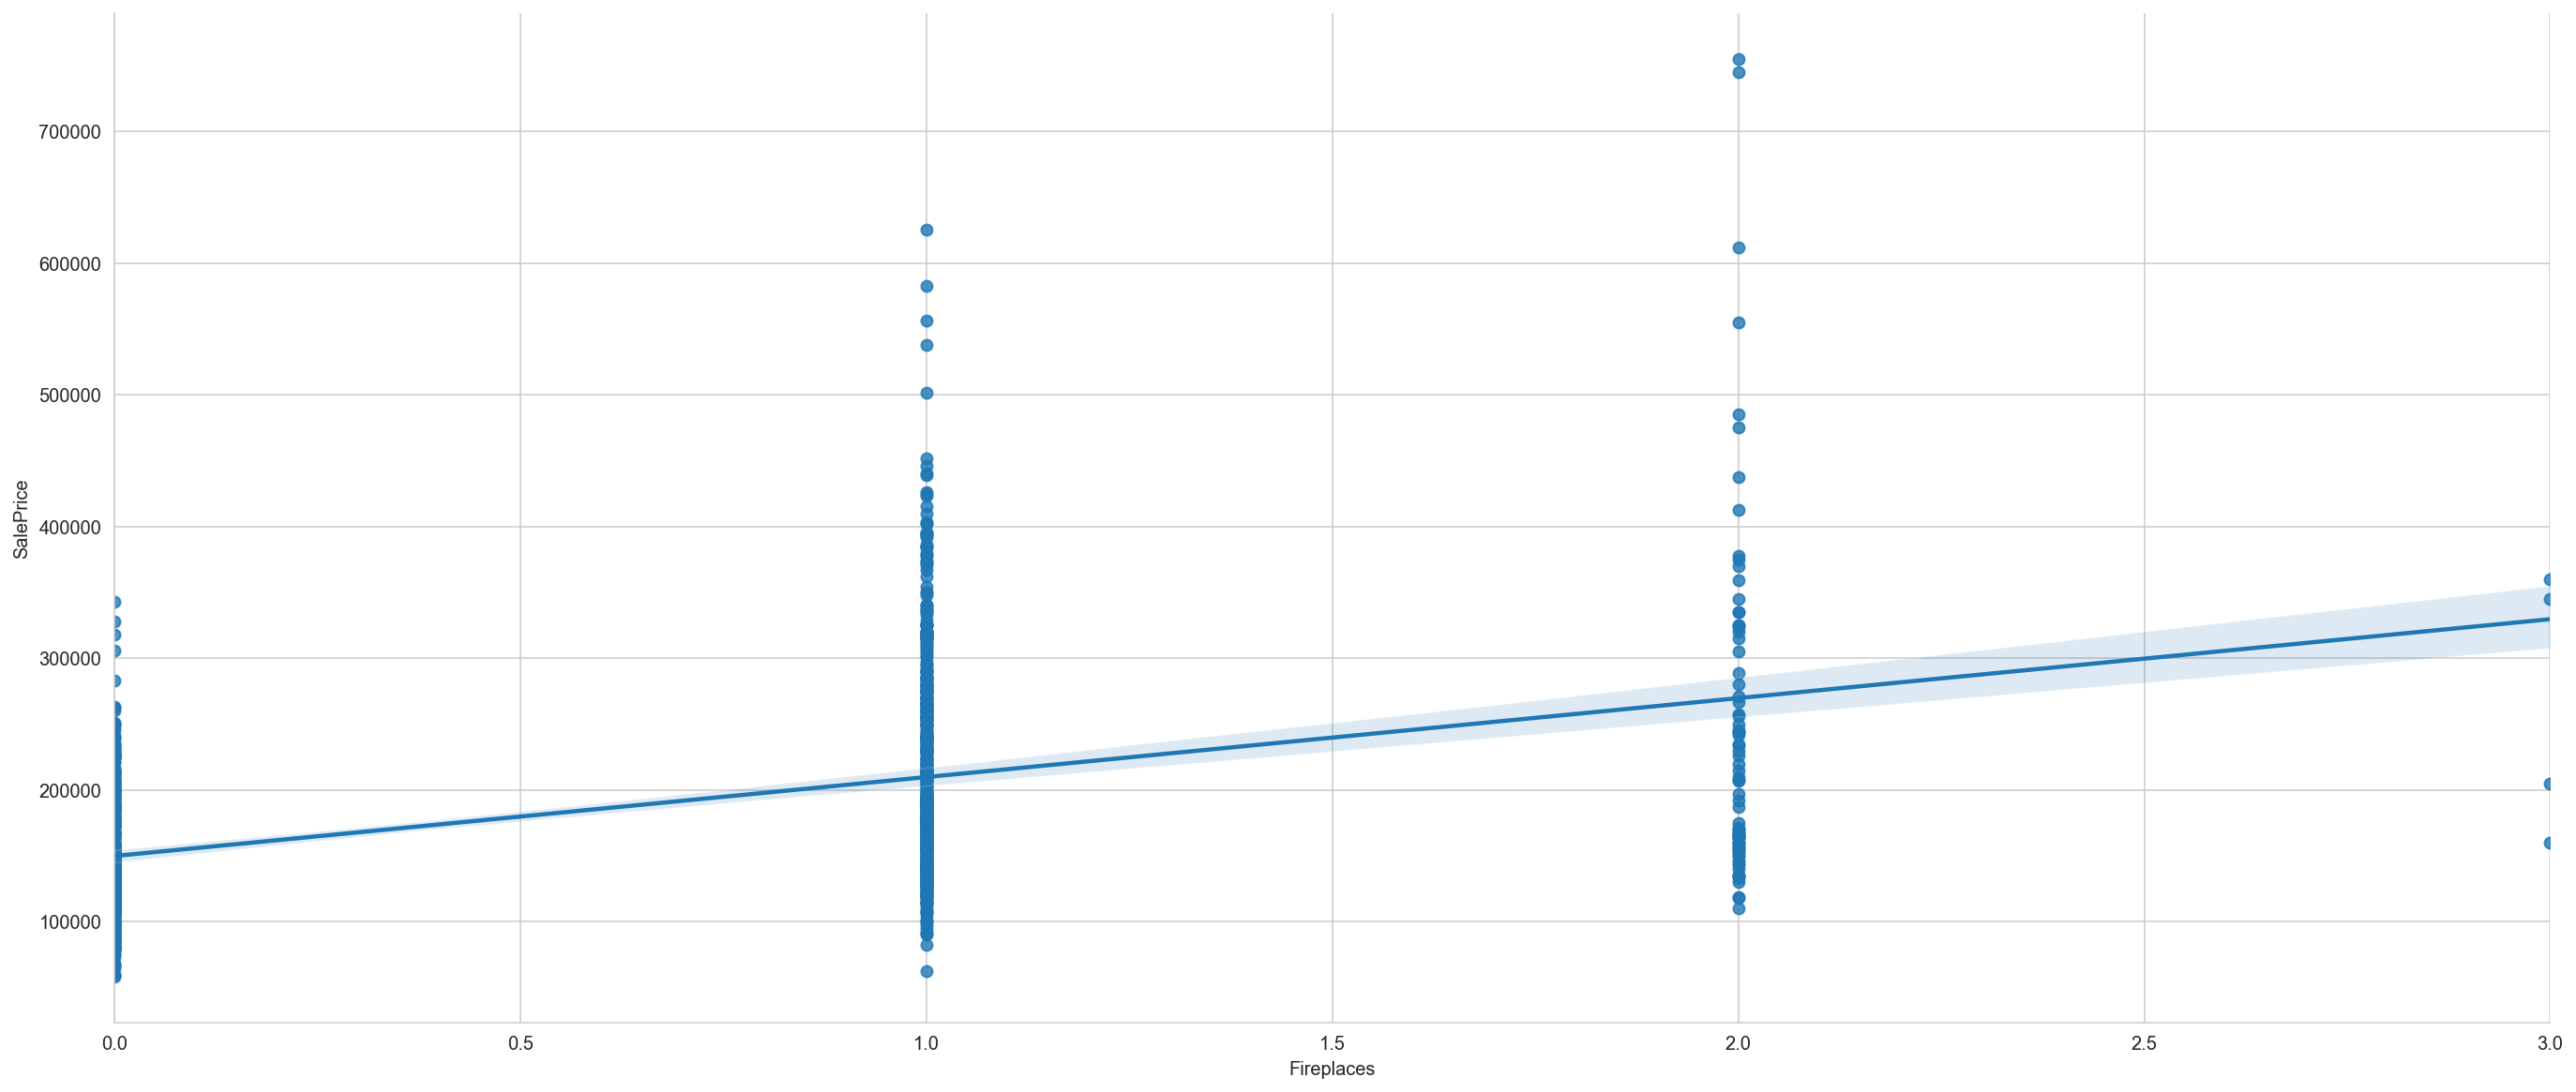

In [45]:
# Just visualising the fireplace correllation

sns.lmplot('Fireplaces','SalePrice', house11, height=8, aspect=(19/8))

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


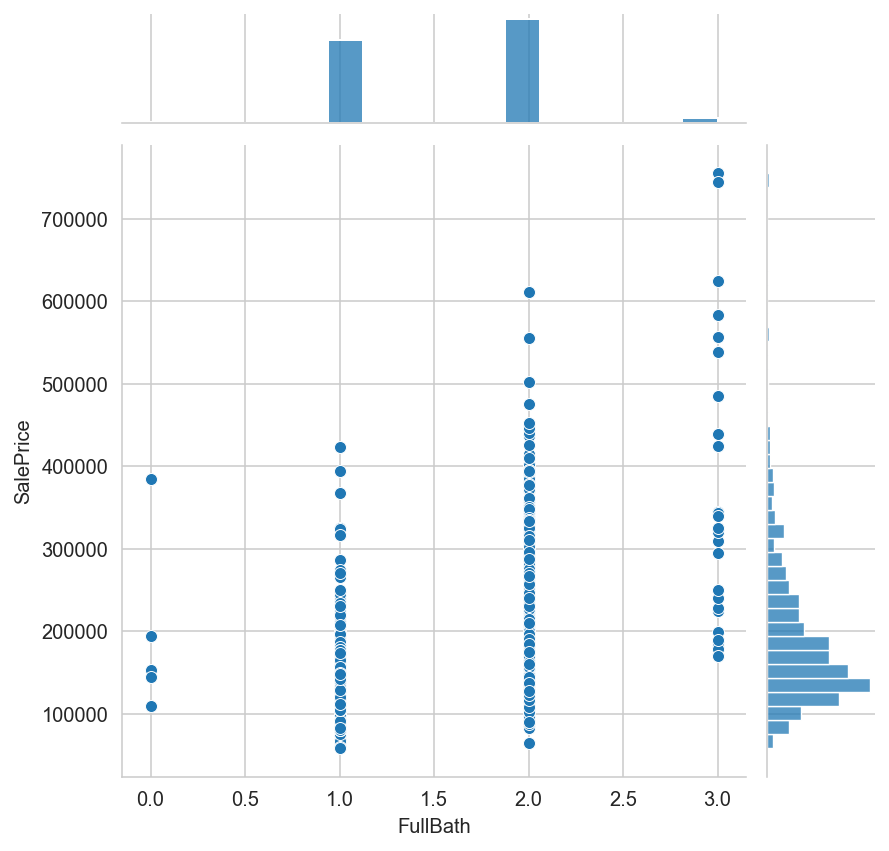

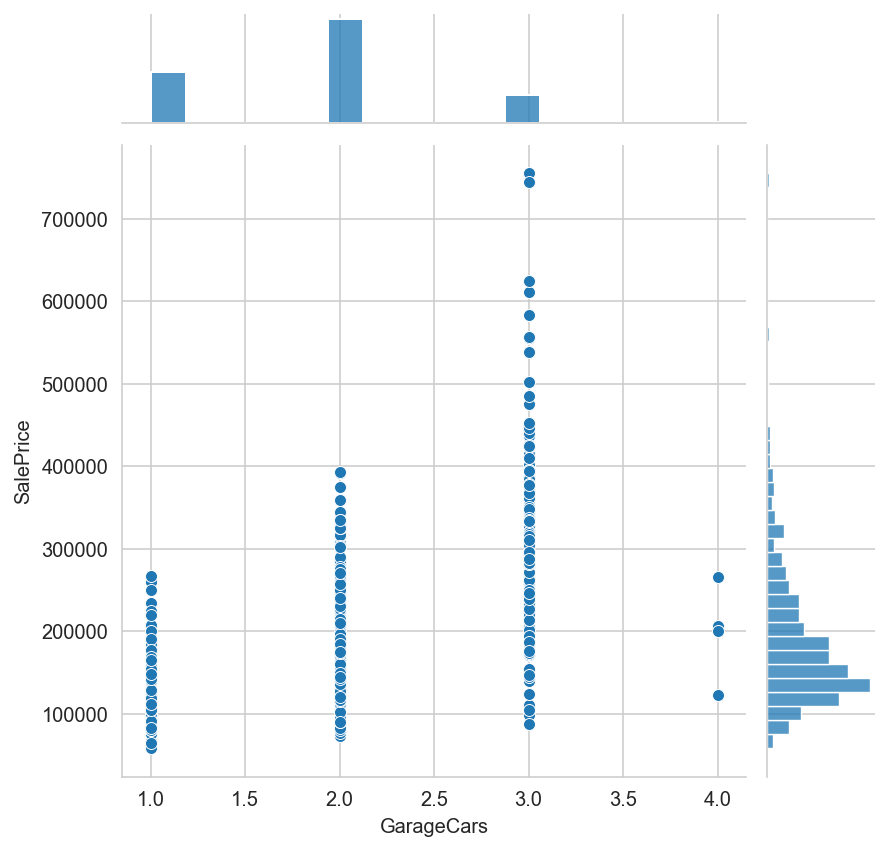

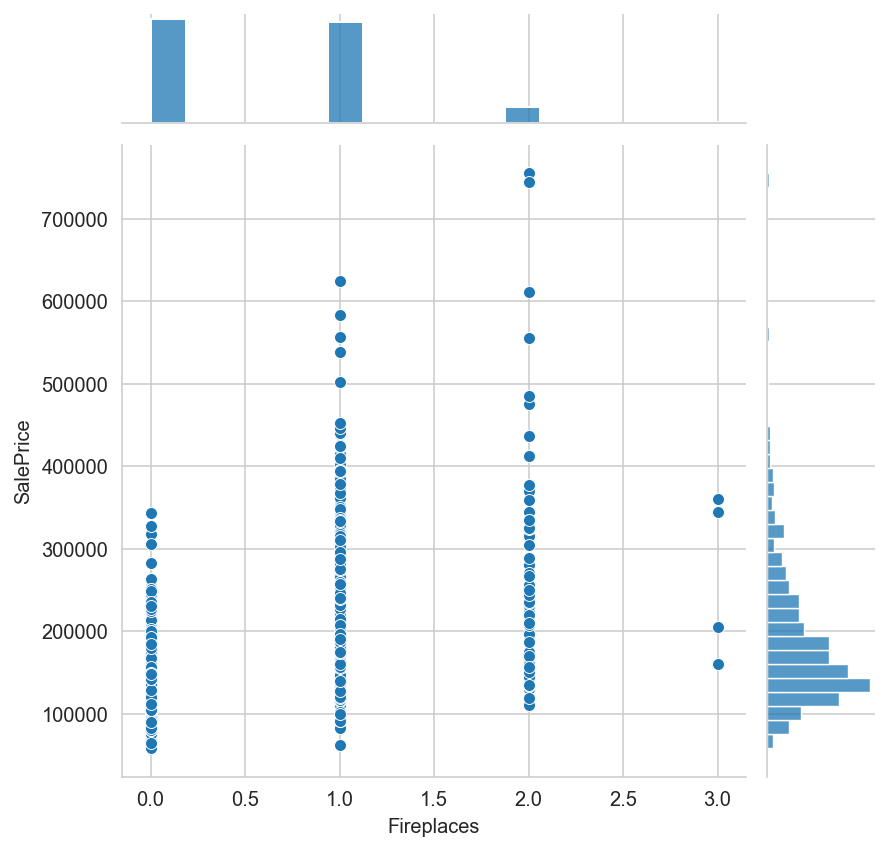

In [46]:
# Visualising again using .jointplot.
# Considering what to include in the slideshow

# sns.jointplot(x = house11_Q1_y_test, y = house11_Q1_yhat)

display(
    sns.jointplot(house11['FullBath'],house11['SalePrice']),
    sns.jointplot(house11['GarageCars'],house11['SalePrice']),
    sns.jointplot(house11['Fireplaces'],house11['SalePrice'])
    )


In [47]:
# Time to look at the dummied features, can filter by when dtype == 'uint8'

display(
house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'uint8'].sort_values(by = 'corr', ascending = False).head(15),
house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'uint8'].sort_values(by = 'corr', ascending = False).tail(15)
    )

,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
5,SalePrice,BsmtQual_Ex,0.581399,170112.551000,159219.006522,uint8
8,SalePrice,KitchenQual_Ex,0.535835,173052.788650,161750.145416,uint8
10,SalePrice,Foundation_PConc,0.519322,145836.245763,86063.624218,uint8
14,SalePrice,ExterQual_Ex,0.475725,178107.729147,197676.401288,uint8
15,SalePrice,BsmtFinType1_GLQ,0.459030,161947.771863,83577.613939,uint8
17,SalePrice,HeatingQC_Ex,0.450691,145963.187135,74783.316199,uint8
18,SalePrice,ExterQual_Gd,0.441119,159056.360839,76123.837653,uint8
19,SalePrice,OverallQual02_9 - Excellent,0.437026,179119.474323,189691.478058,uint8
20,SalePrice,GarageFinish_Fin,0.431646,165628.069544,82376.256621,uint8
21,SalePrice,OverallQual02_8 - Very Good,0.424210,172968.393628,105808.534943,uint8


,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
285,SalePrice,OverallQual02_4 - Below Average,-0.238719,191392.806328,-81331.092042,uint8
286,SalePrice,RoofStyle_Gable,-0.250708,224509.189723,-49478.733909,uint8
287,SalePrice,SaleType_WD,-0.283430,242469.509091,-65972.095589,uint8
288,SalePrice,MSZoning_RM,-0.291540,196693.164179,-66242.712751,uint8
289,SalePrice,BsmtExposure_No,-0.297843,220424.010499,-51919.271428,uint8
290,SalePrice,LotShape_Reg,-0.328858,227640.863095,-59250.017535,uint8
291,SalePrice,HeatingQC_TA,-0.334141,203296.052045,-61900.290607,uint8
292,SalePrice,Foundation_CBlock,-0.378233,211955.087218,-63792.399718,uint8
293,SalePrice,MasVnrType_None,-0.382945,223945.798265,-64301.620351,uint8
294,SalePrice,OverallQual02_5 - Average,-0.394763,206247.723457,-73355.442929,uint8


In [48]:
# Need to come up with a way to filter column 'level_1' by whether it starts is a specified string


# for row in house11_SalePrice_Corr['level_1']:
#     if "KitchenQual" in row:
#         print(True)
#     else:
#         print(False)

# Leave commented out to save time scrolling

In [49]:
# Create a list-comp for all outputs of a spefici dummified column

[row for row in house11_SalePrice_Corr['level_1'] if "KitchenQual" in row]
#         print(True)
#     else:
#         print(False)

['KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_Fa', 'KitchenQual_TA']

In [50]:
# .isin( does the trick
# Create function

def row_filterer(df,row,string):
    '''
    Filters a dataframe by single row if the value in that row is containing a specific text
    
    dsi-unit-3-project-03
    
    Written by Krisdan
    '''
    return df[df[row].isin([x for x in df[row] if string in x])]



In [51]:
# df_KitchenQual['level_1'].unique()
# NameError: name 'df_KitchenQual' is not defined


In [52]:
# Test nmew function 'row_filterer'

row_filterer(house11_SalePrice_Corr,'level_1',"KitchenQual")

,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
8,SalePrice,KitchenQual_Ex,0.535835,173052.788650,161750.145416,uint8
42,SalePrice,KitchenQual_Gd,0.279879,166812.326687,46995.439040,uint8
245,SalePrice,KitchenQual_Fa,-0.115725,187605.006410,-70350.244505,uint8
298,SalePrice,KitchenQual_TA,-0.538111,229484.811518,-89054.774481,uint8


<AxesSubplot:title={'center':'KitchenQual'}, xlabel='level_1'>

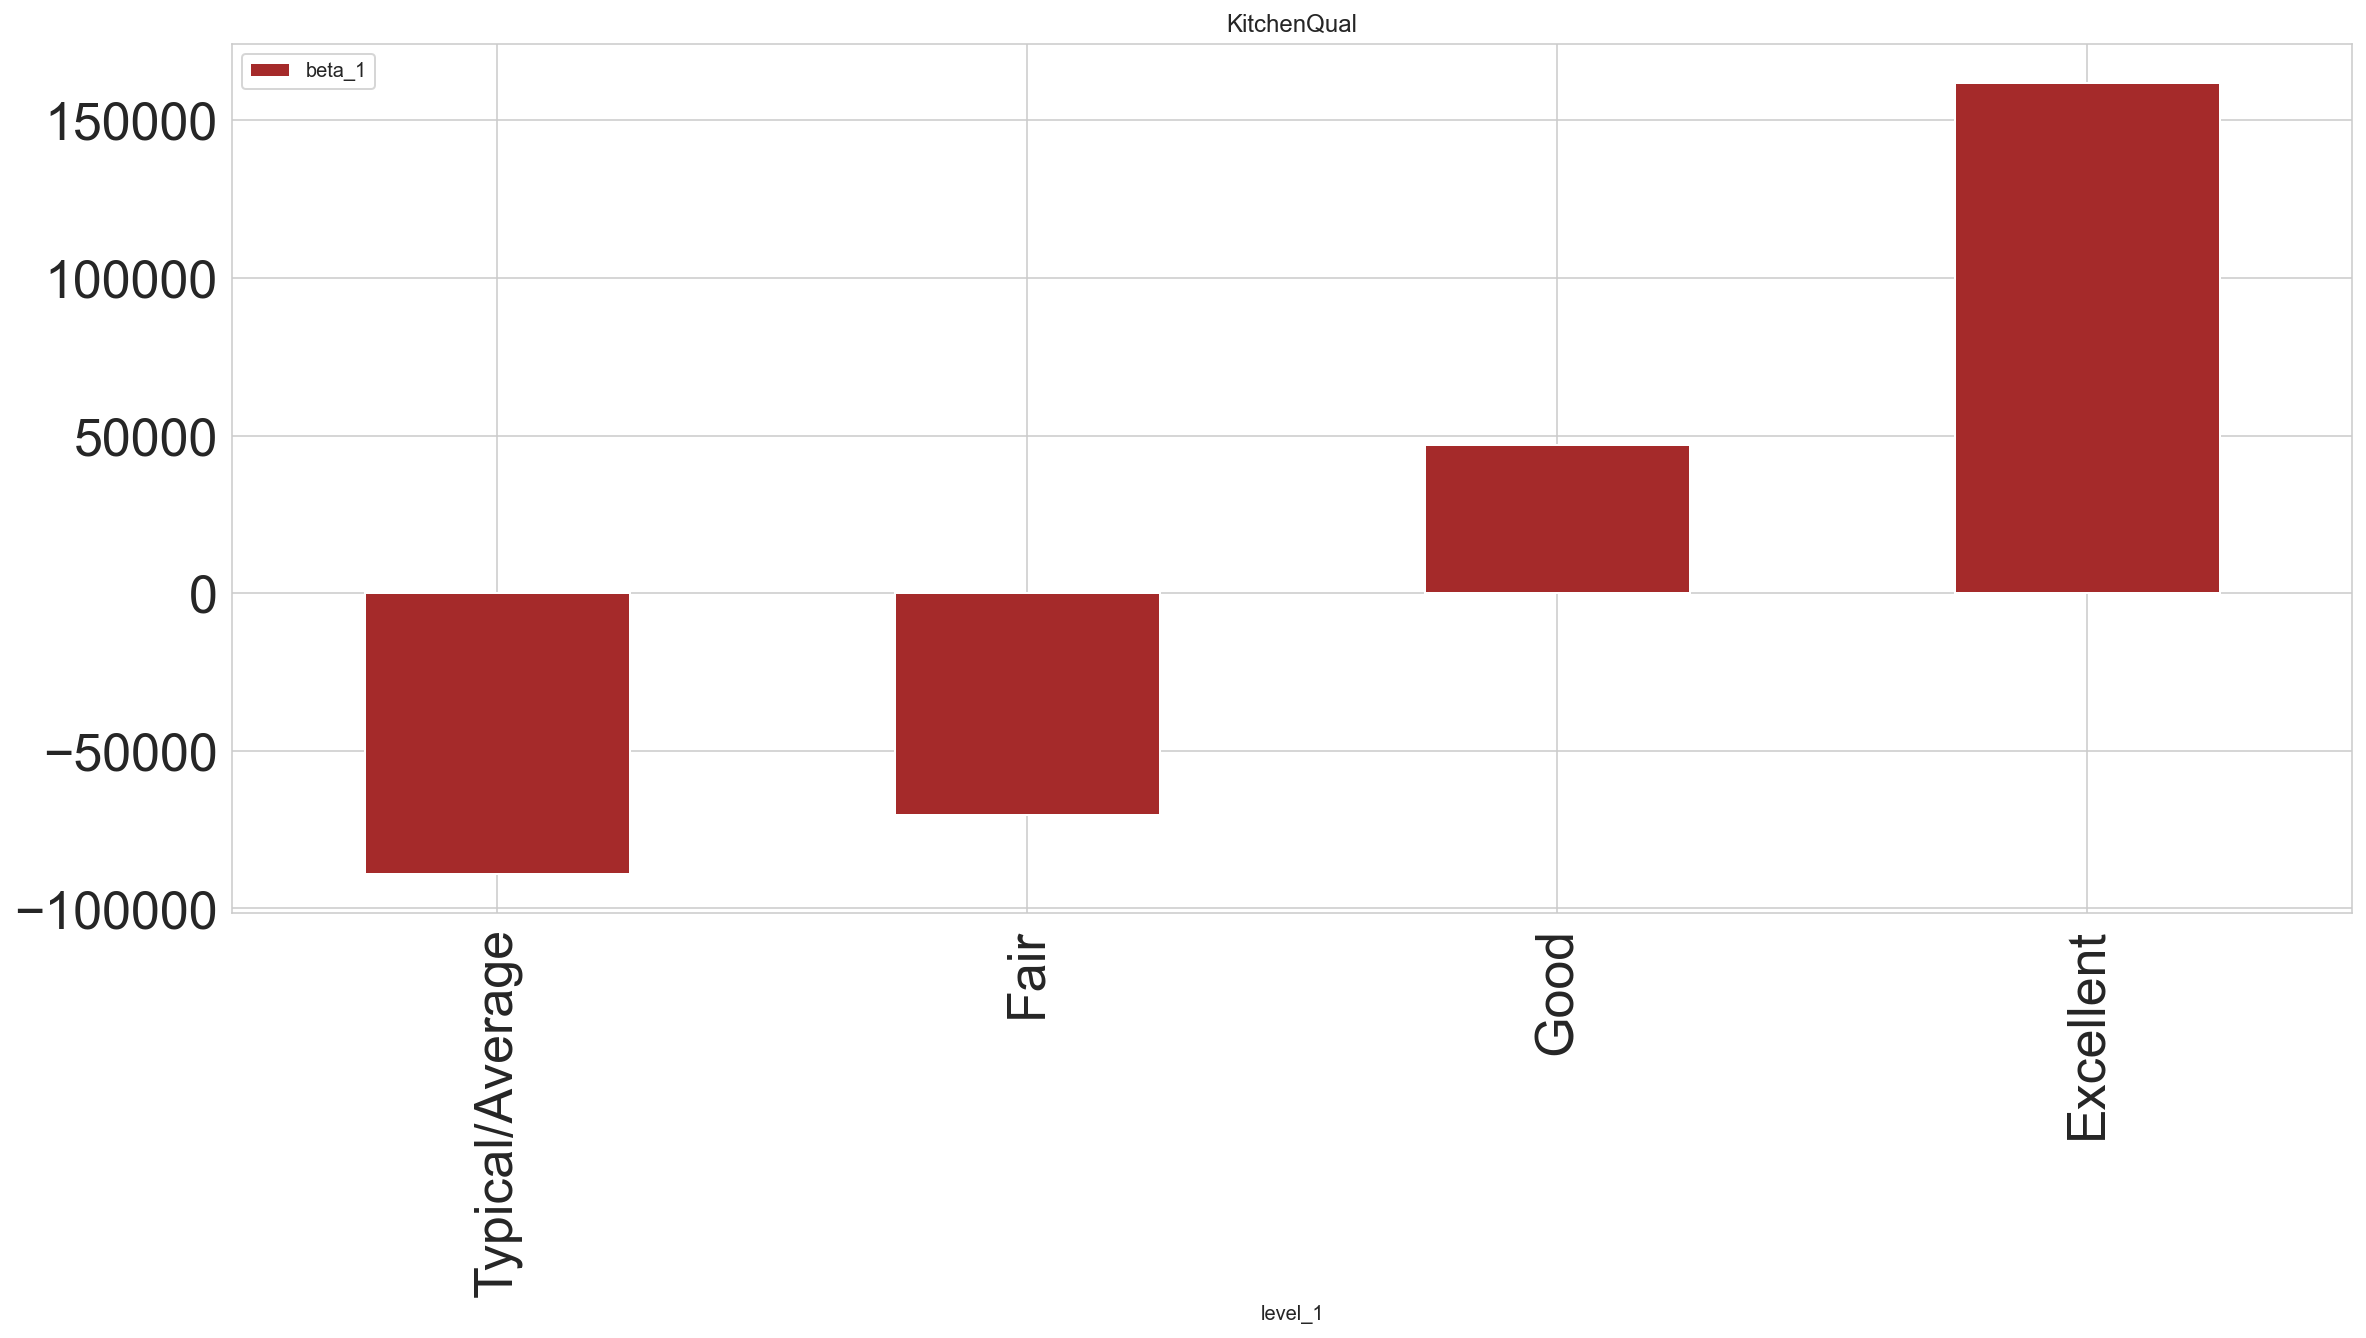

In [53]:
# Create and implement dictionary for feature 'KitchenQual'

# Check WHERE 'level_1' contains "KitchenQual"


# KitchenQual: Kitchen quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor

KitchenQual_dict = {
    'KitchenQual_Ex':'Excellent', 
    'KitchenQual_Gd':'Good', 
    'KitchenQual_Fa':'Fair',
    'KitchenQual_TA':'Typical/Average'
}


row_filterer(house11_SalePrice_Corr,'level_1',"KitchenQual")


df_KitchenQual = row_filterer(house11_SalePrice_Corr,'level_1',"KitchenQual").sort_values(by= 'beta_1', ascending  = False)
df_KitchenQual.index = df_KitchenQual['level_1'].map(KitchenQual_dict)

df_KitchenQual[['beta_1']].sort_values('beta_1').plot(kind='bar', figsize = (19,8), fontsize = 26, color = 'brown', title = 'KitchenQual')

In [54]:
# show dataframe to list into the notes for the slideshow


df_KitchenQual[['beta_1']]

,beta_1
level_1,
Excellent,161750.145416
Good,46995.439040
Fair,-70350.244505
Typical/Average,-89054.774481


<AxesSubplot:xlabel='level_1'>

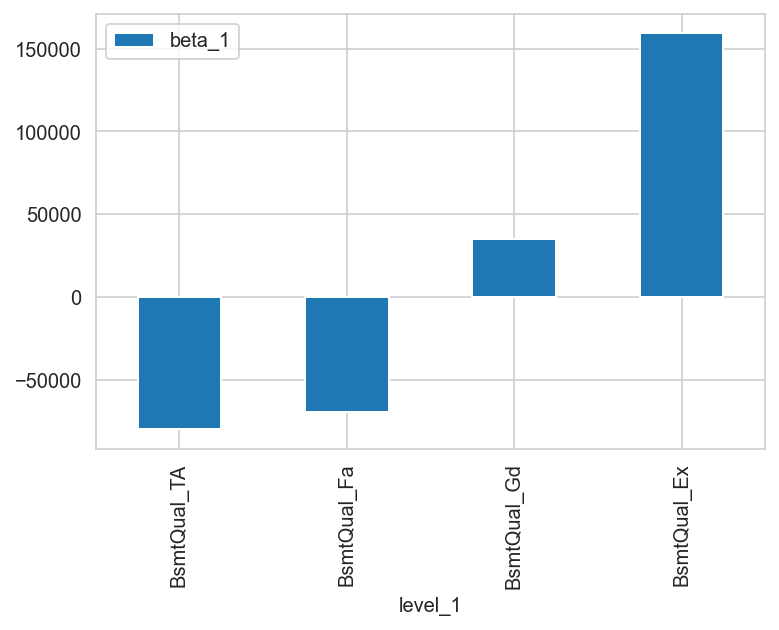

In [55]:
# Check WHERE 'level_1' contains BsmtQual"



row_filterer(house11_SalePrice_Corr,'level_1',"BsmtQual")


df_BsmtQual = row_filterer(house11_SalePrice_Corr,'level_1',"BsmtQual").sort_values(by= 'beta_1', ascending  = False)
df_BsmtQual.index = df_BsmtQual['level_1']
df_BsmtQual[['beta_1']].sort_values('beta_1').plot(kind='bar')


In [56]:
# Get the unique() to build the dictionary

row_filterer(house11_SalePrice_Corr,'level_1',"Fire")['level_1'].unique()

array(['Fireplaces', 'FireplaceQu_Gd', 'FireplaceQu_Ex', 'FireplaceQu_TA',
       'FireplaceQu_Fa', 'FireplaceQu_Po'], dtype=object)

<AxesSubplot:xlabel='level_1'>

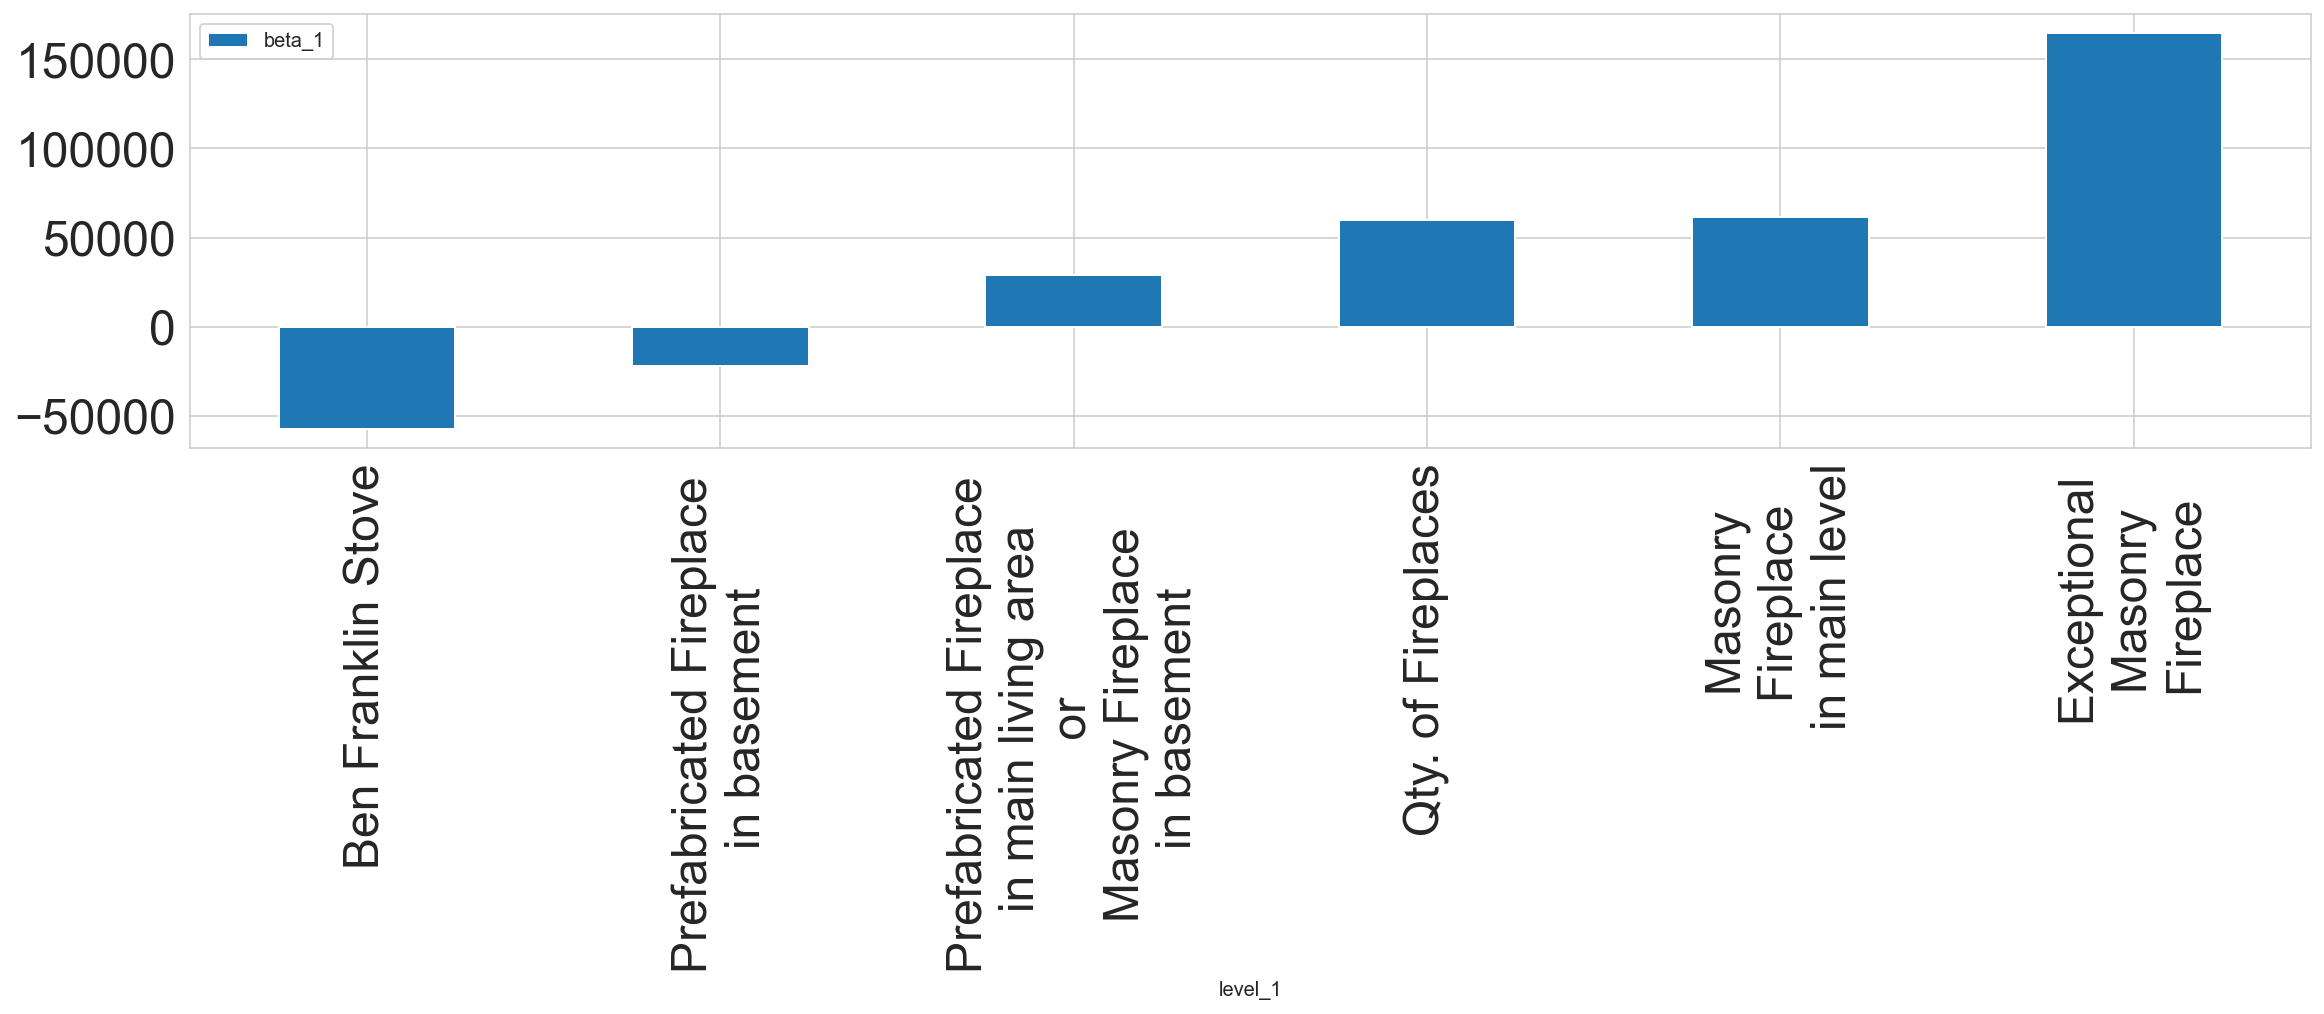

In [57]:
# Check WHERE 'level_1' contains "Fire"
# Create and implement dicitonary 


row_filterer(house11_SalePrice_Corr,'level_1',"Fire").sort_values(by= 'beta_1', ascending  = False)

# house11_SalePrice_Corr[house11_SalePrice_Corr['level_1'].isin([row for row in house11_SalePrice_Corr['level_1'] if "Fire" in row])]


# Fireplaces: Number of fireplaces

# FireplaceQu: Fireplace quality

#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace

Fireplaces_dict = {
    'Fireplaces':'Qty. of Fireplaces', 
    'FireplaceQu_Gd':'Masonry \nFireplace \nin main level', 
    'FireplaceQu_Ex':'Exceptional \nMasonry \nFireplace', 
    'FireplaceQu_TA':'Prefabricated Fireplace \nin main living area\n or \nMasonry Fireplace \nin basement',
    'FireplaceQu_Fa':'Prefabricated Fireplace \nin basement', 
    'FireplaceQu_Po':'Ben Franklin Stove'
        }


# Fireplaces

df_Fire = row_filterer(house11_SalePrice_Corr,'level_1',"Fire").sort_values(by= 'beta_1', ascending  = False)
df_Fire.index = df_Fire['level_1'].map(Fireplaces_dict)
# df_Fire = df_Fire[['beta_1']]
df_Fire[['beta_1']].sort_values('beta_1').plot(kind='bar', figsize = (19,4), fontsize = 24)

In [58]:
df_Fire

,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
level_1,,,,,,
Exceptional \nMasonry \nFireplace,SalePrice,FireplaceQu_Ex,0.270715,183172.543040,164570.314103,uint8
Masonry \nFireplace \nin main level,SalePrice,FireplaceQu_Gd,0.336336,168722.234925,61637.758766,uint8
Qty. of Fireplaces,SalePrice,Fireplaces,0.458285,149884.868039,59918.874072,int64
Prefabricated Fireplace \nin main living area\n or \nMasonry Fireplace \nin basement,SalePrice,FireplaceQu_TA,0.138187,180685.065702,28951.343601,uint8
Prefabricated Fireplace \nin basement,SalePrice,FireplaceQu_Fa,-0.039166,186758.555556,-22302.305556,uint8
Ben Franklin Stove,SalePrice,FireplaceQu_Po,-0.074445,186947.030909,-57309.877063,uint8


In [59]:
# Check WHERE 'level_1' contains "ExterQual_"


row_filterer(house11_SalePrice_Corr,'level_1',"ExterQual_").sort_values(by= 'beta_1', ascending  = False)


# house11_SalePrice_Corr[house11_SalePrice_Corr['level_1'].isin([row for row in house11_SalePrice_Corr['level_1'] if "ExterQual_" in row])]

,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
14,SalePrice,ExterQual_Ex,0.475725,178107.729147,197676.401288,uint8
18,SalePrice,ExterQual_Gd,0.441119,159056.360839,76123.837653,uint8
206,SalePrice,ExterQual_Fa,-0.068123,186656.152527,-84256.152527,uint8
299,SalePrice,ExterQual_TA,-0.614703,248106.434298,-103637.717431,uint8


<AxesSubplot:xlabel='level_1'>

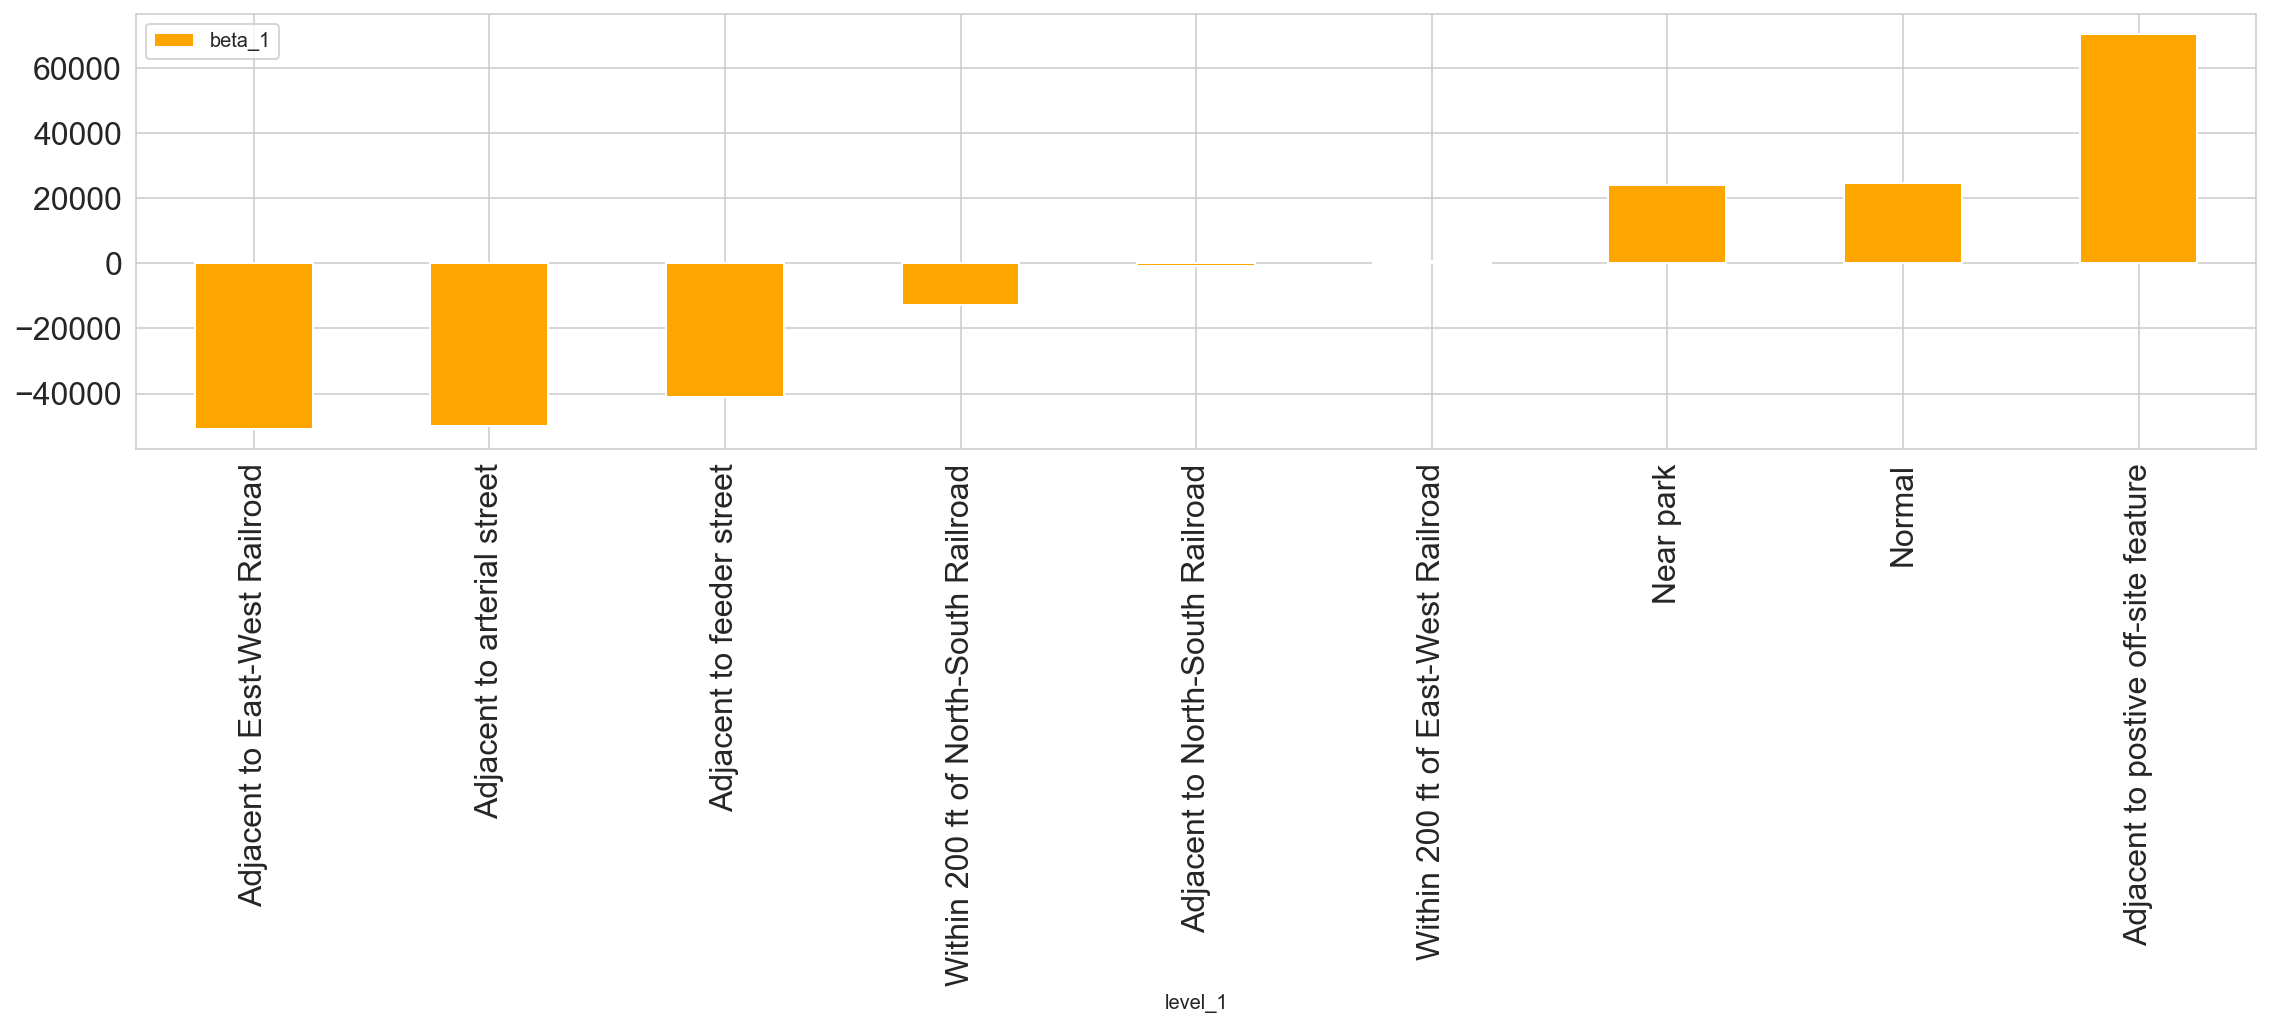

In [60]:

# Create dictionary for 'Condition'
# Create NIMBY/YIMBY chart for the slideshow

row_filterer(house11_SalePrice_Corr,'level_1',"Condition0_").sort_values(by= 'beta_1', ascending  = False)

#        Artery	Adjacent to arterial street
#        Feedr	Adjacent to feeder street	
#        Norm	Normal	
#        RRNn	Within 200' of North-South Railroad
#        RRAn	Adjacent to North-South Railroad
#        PosN	Near positive off-site feature--park, greenbelt, etc.
#        PosA	Adjacent to postive off-site feature
#        RRNe	Within 200' of East-West Railroad
#        RRAe	Adjacent to East-West Railroad

Condition0_dict = {
    'Condition0_PosA': 'Adjacent to postive off-site feature',
    'Condition0_Norm': 'Normal',
    'Condition0_PosN': 'Near park',
    'Condition0_RRNe': 'Within 200 ft of East-West Railroad',
    'Condition0_RRAn': 'Adjacent to North-South Railroad',
    'Condition0_RRNn': 'Within 200 ft of North-South Railroad',
    'Condition0_Feedr': 'Adjacent to feeder street', 
    'Condition0_Artery': 'Adjacent to arterial street',
    'Condition0_RRAe': 'Adjacent to East-West Railroad',
        }

df_Condition0 = row_filterer(house11_SalePrice_Corr,'level_1',"Condition0_").sort_values(by= 'beta_1', ascending  = False)
df_Condition0.index = df_Condition0['level_1'].map(Condition0_dict)
# df_Condition0 = df_Condition0[['beta_1']]
df_Condition0[['beta_1']].sort_values('beta_1').plot(kind='bar', figsize = (19,4), fontsize = 16, color = 'orange')

In [61]:
# Show in pandas view to paste into notes for the slideshow

df_Condition0

,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
level_1,,,,,,
Adjacent to postive off-site feature,SalePrice,Condition0_PosA,0.056952,185961.206679,70438.793321,uint8
Normal,SalePrice,Condition0_Norm,0.030722,161937.500000,24605.430972,uint8
Near park,SalePrice,Condition0_PosN,0.025987,186083.575181,23999.758152,uint8
Within 200 ft of East-West Railroad,SalePrice,Condition0_RRNe,0.000262,186276.993705,723.006295,uint8
Adjacent to North-South Railroad,SalePrice,Condition0_RRAn,-0.001447,186295.413223,-824.079890,uint8
Within 200 ft of North-South Railroad,SalePrice,Condition0_RRNn,-0.011299,186346.447154,-12763.113821,uint8
Adjacent to feeder street,SalePrice,Condition0_Feedr,-0.112104,188490.985755,-41057.502422,uint8
Adjacent to arterial street,SalePrice,Condition0_Artery,-0.116396,188207.585981,-49954.097609,uint8
Adjacent to East-West Railroad,SalePrice,Condition0_RRAe,-0.055260,186690.323370,-51034.767814,uint8


In [62]:
# Show in pandas view to paste into notes for the slideshow

row_filterer(house11_SalePrice_Corr,'level_1',"OverallQual02").sort_values(by= 'beta_1', ascending  = False)

,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
27,SalePrice,OverallQual02_10 - Very Excellent,0.363449,182647.152233,252546.035267,uint8
19,SalePrice,OverallQual02_9 - Excellent,0.437026,179119.474323,189691.478058,uint8
21,SalePrice,OverallQual02_8 - Very Good,0.424210,172968.393628,105808.534943,uint8
67,SalePrice,OverallQual02_7 - Good,0.140393,179850.607981,27407.242593,uint8
278,SalePrice,OverallQual02_6 - Above Average,-0.191238,195229.390273,-36901.090273,uint8
294,SalePrice,OverallQual02_5 - Average,-0.394763,206247.723457,-73355.442929,uint8
285,SalePrice,OverallQual02_4 - Below Average,-0.238719,191392.806328,-81331.092042,uint8
236,SalePrice,OverallQual02_3 - Fair,-0.102606,187085.713509,-89938.213509,uint8
184,SalePrice,OverallQual02_2 - Poor,-0.045784,186391.202338,-126391.202338,uint8


<AxesSubplot:xlabel='level_1'>

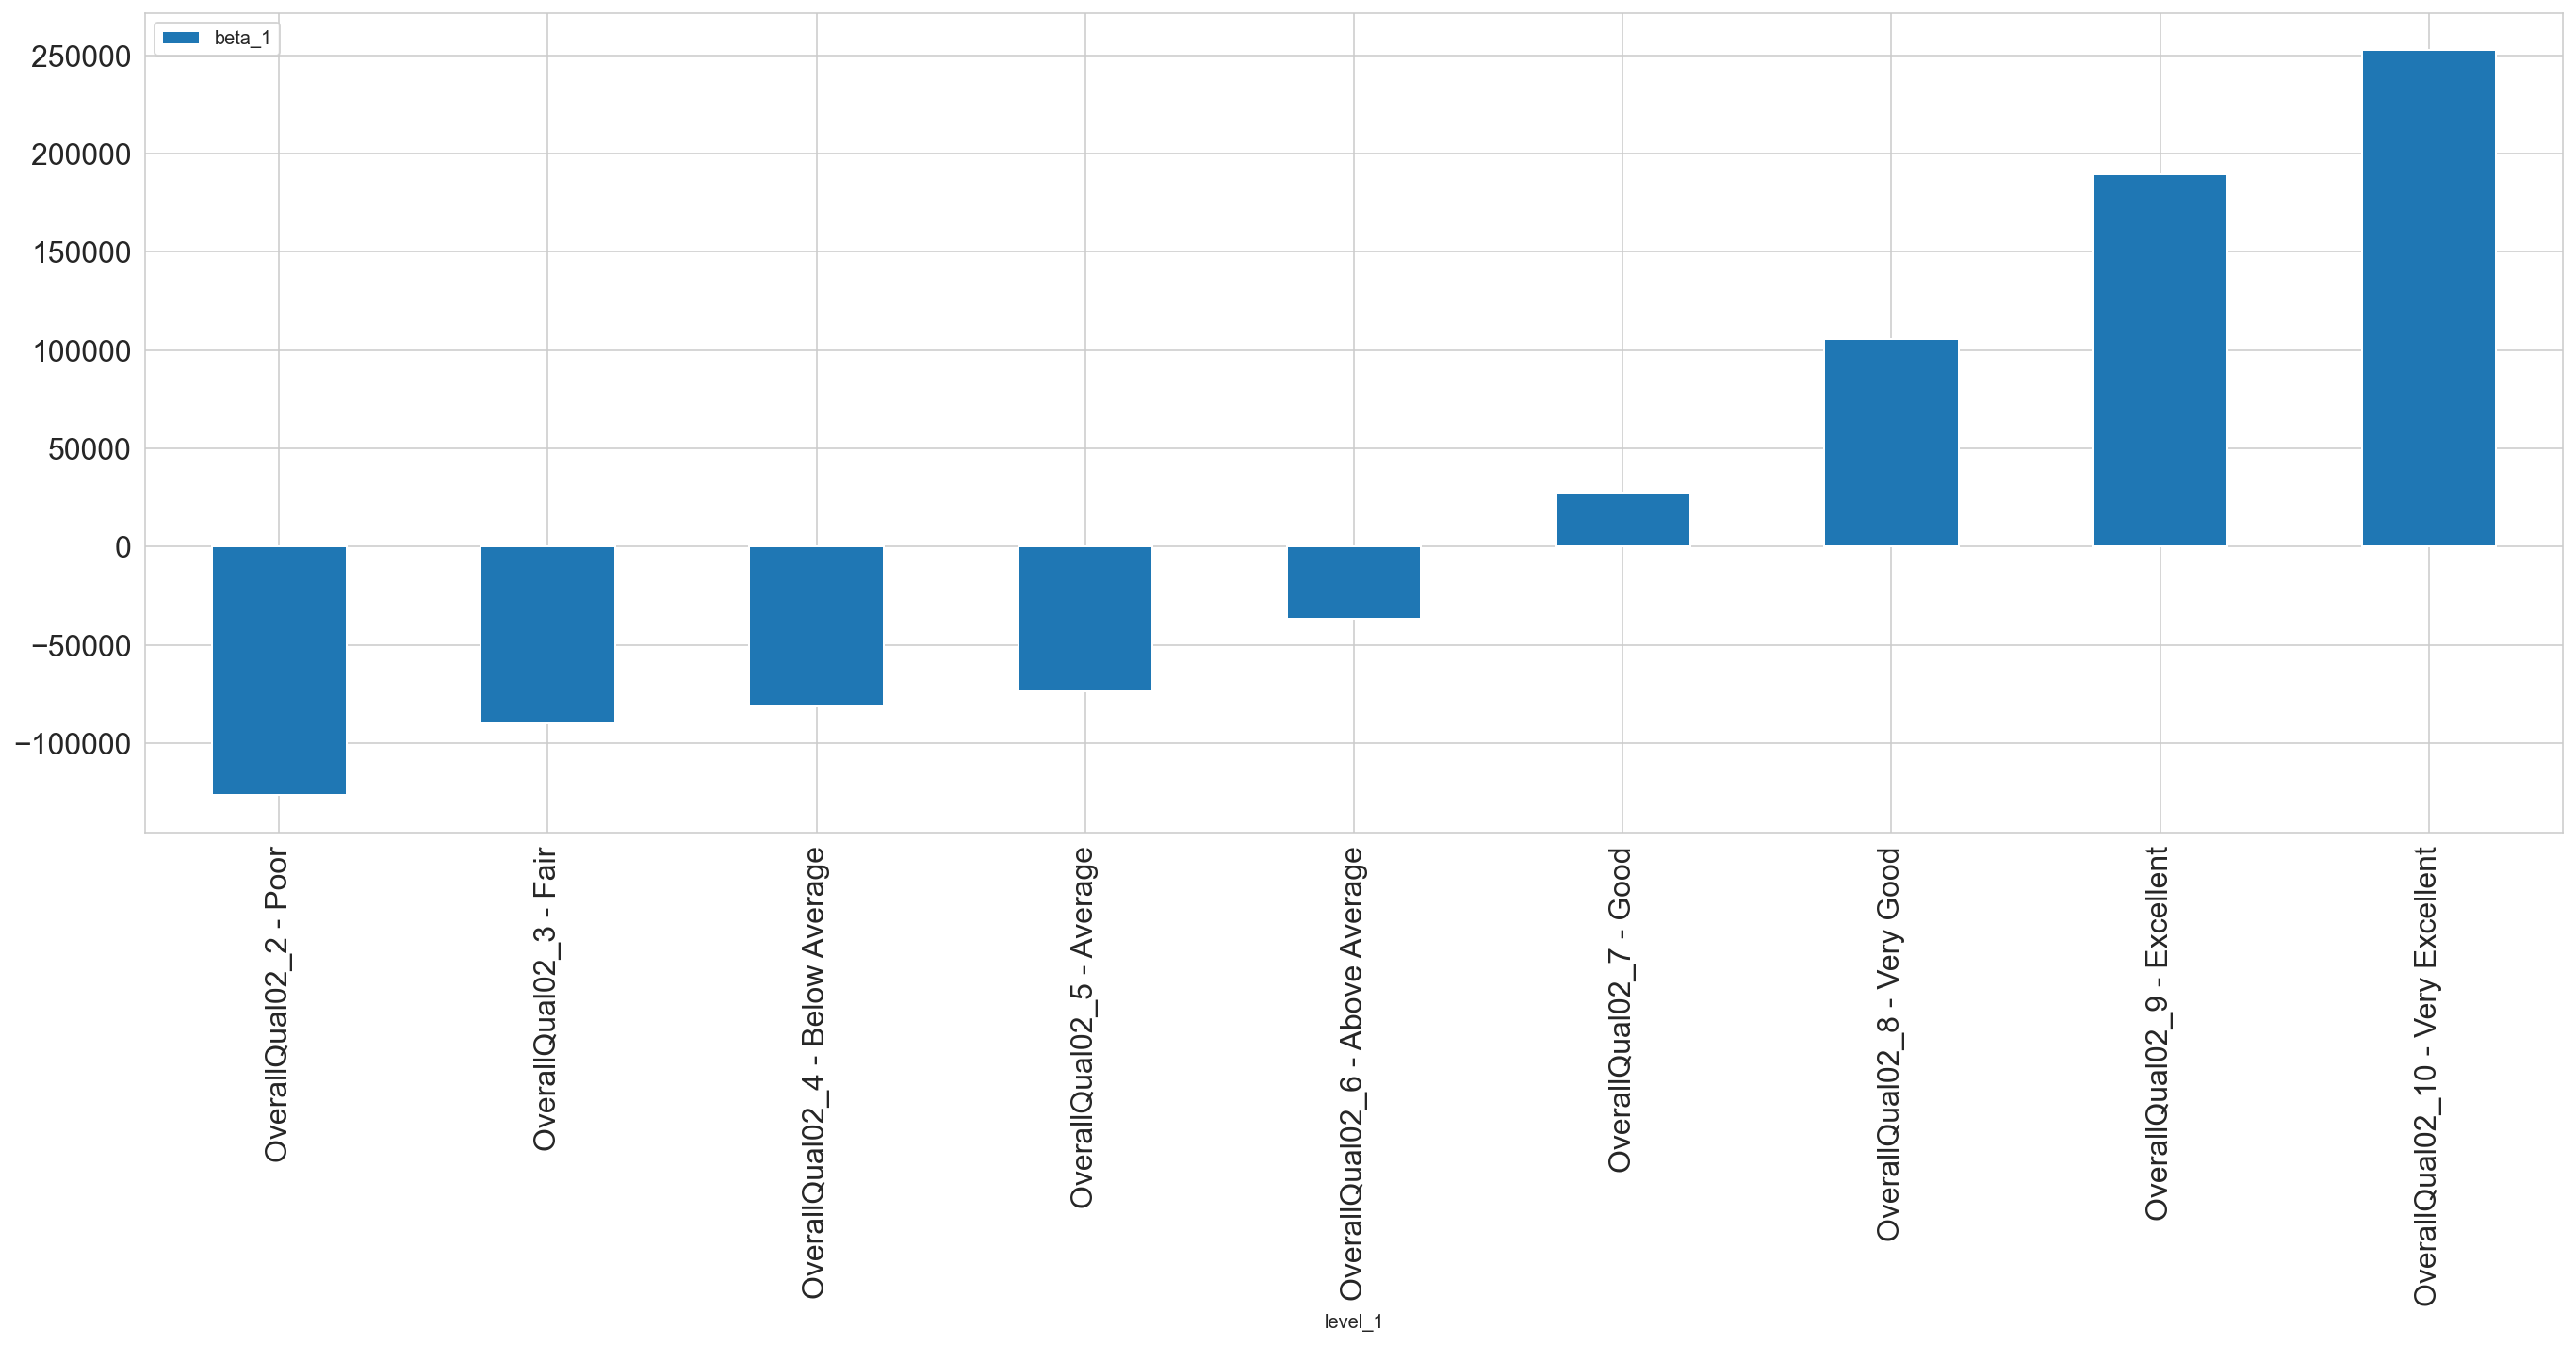

In [63]:
# Create bigger chart for slideshow
# OverallQual02

df_OverallQual02 = row_filterer(house11_SalePrice_Corr,'level_1',"OverallQual02").sort_values(by= 'beta_1', ascending  = False)
df_OverallQual02.index = df_OverallQual02['level_1']
df_OverallQual02 = df_OverallQual02[['beta_1']]
df_OverallQual02.sort_values('beta_1').plot(kind='bar', figsize = (23,8), fontsize = 16)

<AxesSubplot:xlabel='level_1'>

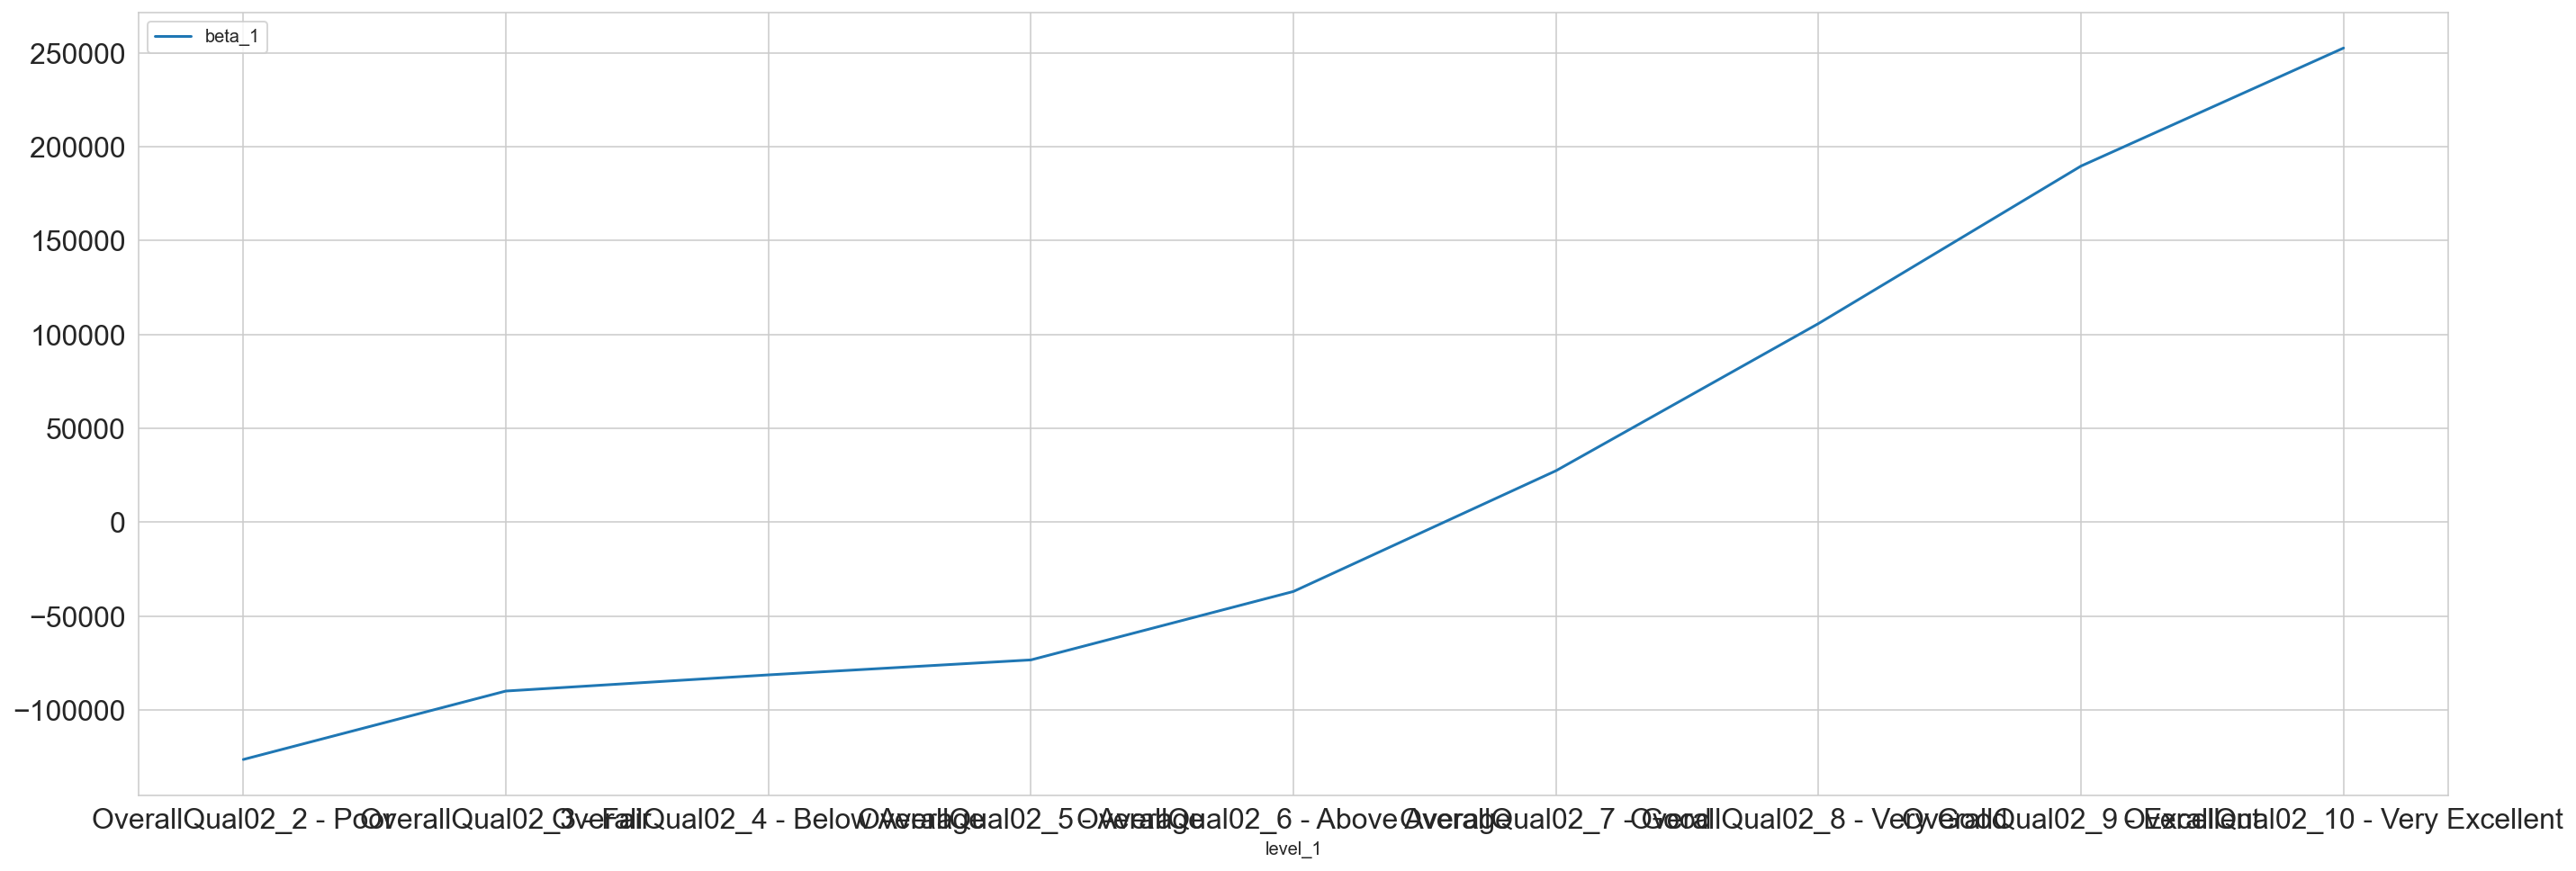

In [64]:
# Prove the comments are not linear and thus demand dummification

df_OverallQual02.sort_values('beta_1').plot(kind='line', figsize = (23,8), fontsize = 16)

,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
35,SalePrice,Neighborhood_NoRidge,0.319407,181659.637963,155752.725673,uint8
46,SalePrice,Neighborhood_StoneBr,0.244086,183546.698994,151977.051006,uint8
22,SalePrice,Neighborhood_NridgHt,0.422279,176889.141618,139325.365048,uint8
84,SalePrice,Neighborhood_Veenker,0.069673,185819.183544,72895.102170,uint8
73,SalePrice,Neighborhood_Timber,0.127551,184521.758079,65143.341921,uint8
66,SalePrice,Neighborhood_Somerst,0.144000,183076.108863,47510.771137,uint8
105,SalePrice,Neighborhood_ClearCr,0.025728,186055.481381,20605.518619,uint8
95,SalePrice,Neighborhood_Crawfor,0.040245,185626.660448,17671.802967,uint8
88,SalePrice,Neighborhood_CollgCr,0.053475,184718.637374,14107.102464,uint8
109,SalePrice,Neighborhood_Gilbert,0.020190,185919.277256,8140.028867,uint8


<AxesSubplot:xlabel='level_1'>

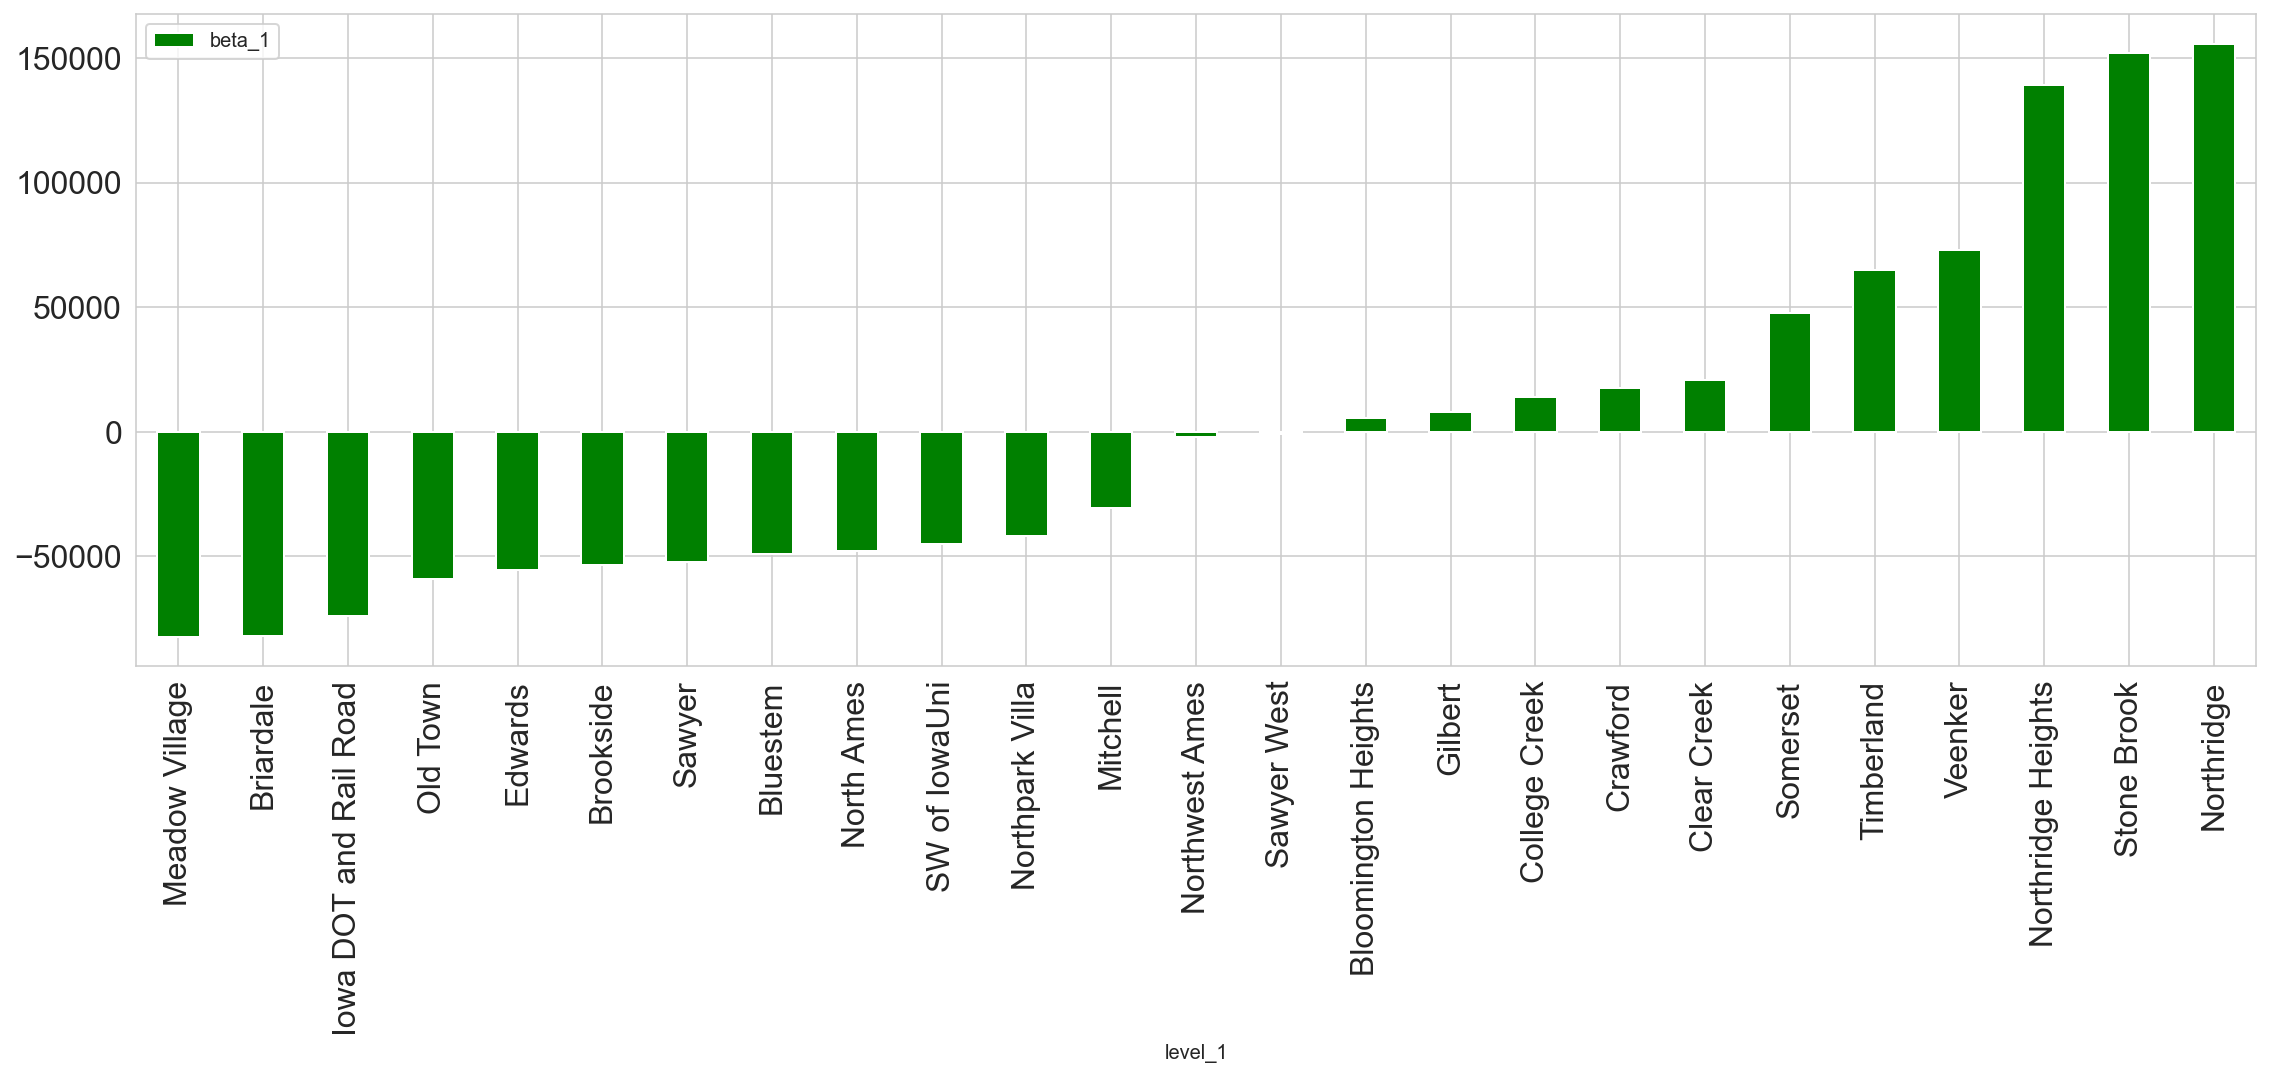

In [65]:
# Create dictionary for Neighborhoods and create chart for slideshow


# Neighborhood: Physical locations within Ames city limits

#        Blmngtn	Bloomington Heights
#        Blueste	Bluestem
#        BrDale	Briardale
#        BrkSide	Brookside
#        ClearCr	Clear Creek
#        CollgCr	College Creek
#        Crawfor	Crawford
#        Edwards	Edwards
#        Gilbert	Gilbert
#        IDOTRR	Iowa DOT and Rail Road
#        MeadowV	Meadow Village
#        Mitchel	Mitchell
#        Names	North Ames
#        NoRidge	Northridge
#        NPkVill	Northpark Villa
#        NridgHt	Northridge Heights
#        NWAmes	Northwest Ames
#        OldTown	Old Town
#        SWISU	South & West of Iowa State University
#        Sawyer	Sawyer
#        SawyerW	Sawyer West
#        Somerst	Somerset
#        StoneBr	Stone Brook
#        Timber	Timberland
#        Veenker	Veenker

Neighborhood_dict = {'Neighborhood_NoRidge' : 'Northridge',
 'Neighborhood_StoneBr' : 'Stone Brook',
 'Neighborhood_NridgHt' : 'Northridge Heights',
 'Neighborhood_Veenker' : 'Veenker',
 'Neighborhood_Timber' : 'Timberland', 
 'Neighborhood_Somerst' : 'Somerset',
 'Neighborhood_ClearCr' : 'Clear Creek', 
 'Neighborhood_Crawfor' : 'Crawford',
 'Neighborhood_CollgCr' : 'College Creek', 
 'Neighborhood_Gilbert' : 'Gilbert',
 'Neighborhood_Blmngtn' : 'Bloomington Heights', 
 'Neighborhood_SawyerW' : 'Sawyer West',
 'Neighborhood_NWAmes' : 'Northwest Ames', 
 'Neighborhood_Mitchel' : 'Mitchell',
 'Neighborhood_NPkVill' : 'Northpark Villa', 
 'Neighborhood_SWISU' : 'SW of IowaUni', 
 'Neighborhood_NAmes' : 'North Ames',
 'Neighborhood_Blueste' : 'Bluestem', 
 'Neighborhood_Sawyer' : 'Sawyer',
 'Neighborhood_BrkSide' : 'Brookside', 
 'Neighborhood_Edwards' : 'Edwards',
 'Neighborhood_OldTown' : 'Old Town', 
 'Neighborhood_IDOTRR' : 'Iowa DOT and Rail Road',
 'Neighborhood_BrDale' : 'Briardale', 
 'Neighborhood_MeadowV' : 'Meadow Village',
    }


df_Neighborhood = row_filterer(house11_SalePrice_Corr,'level_1',"Neighborhood").sort_values(by= 'beta_1', ascending  = False)
df_Neighborhood.index = df_Neighborhood['level_1'].map(Neighborhood_dict)
# df_Neighborhood = df_Neighborhood[['beta_1']]

display(
row_filterer(house11_SalePrice_Corr,'level_1',"Neighborhood").sort_values(by= 'beta_1', ascending  = False),
df_Neighborhood[['beta_1']].sort_values('beta_1').plot(kind='bar', figsize = (19,6), color = 'g', fontsize = 16)
    )

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


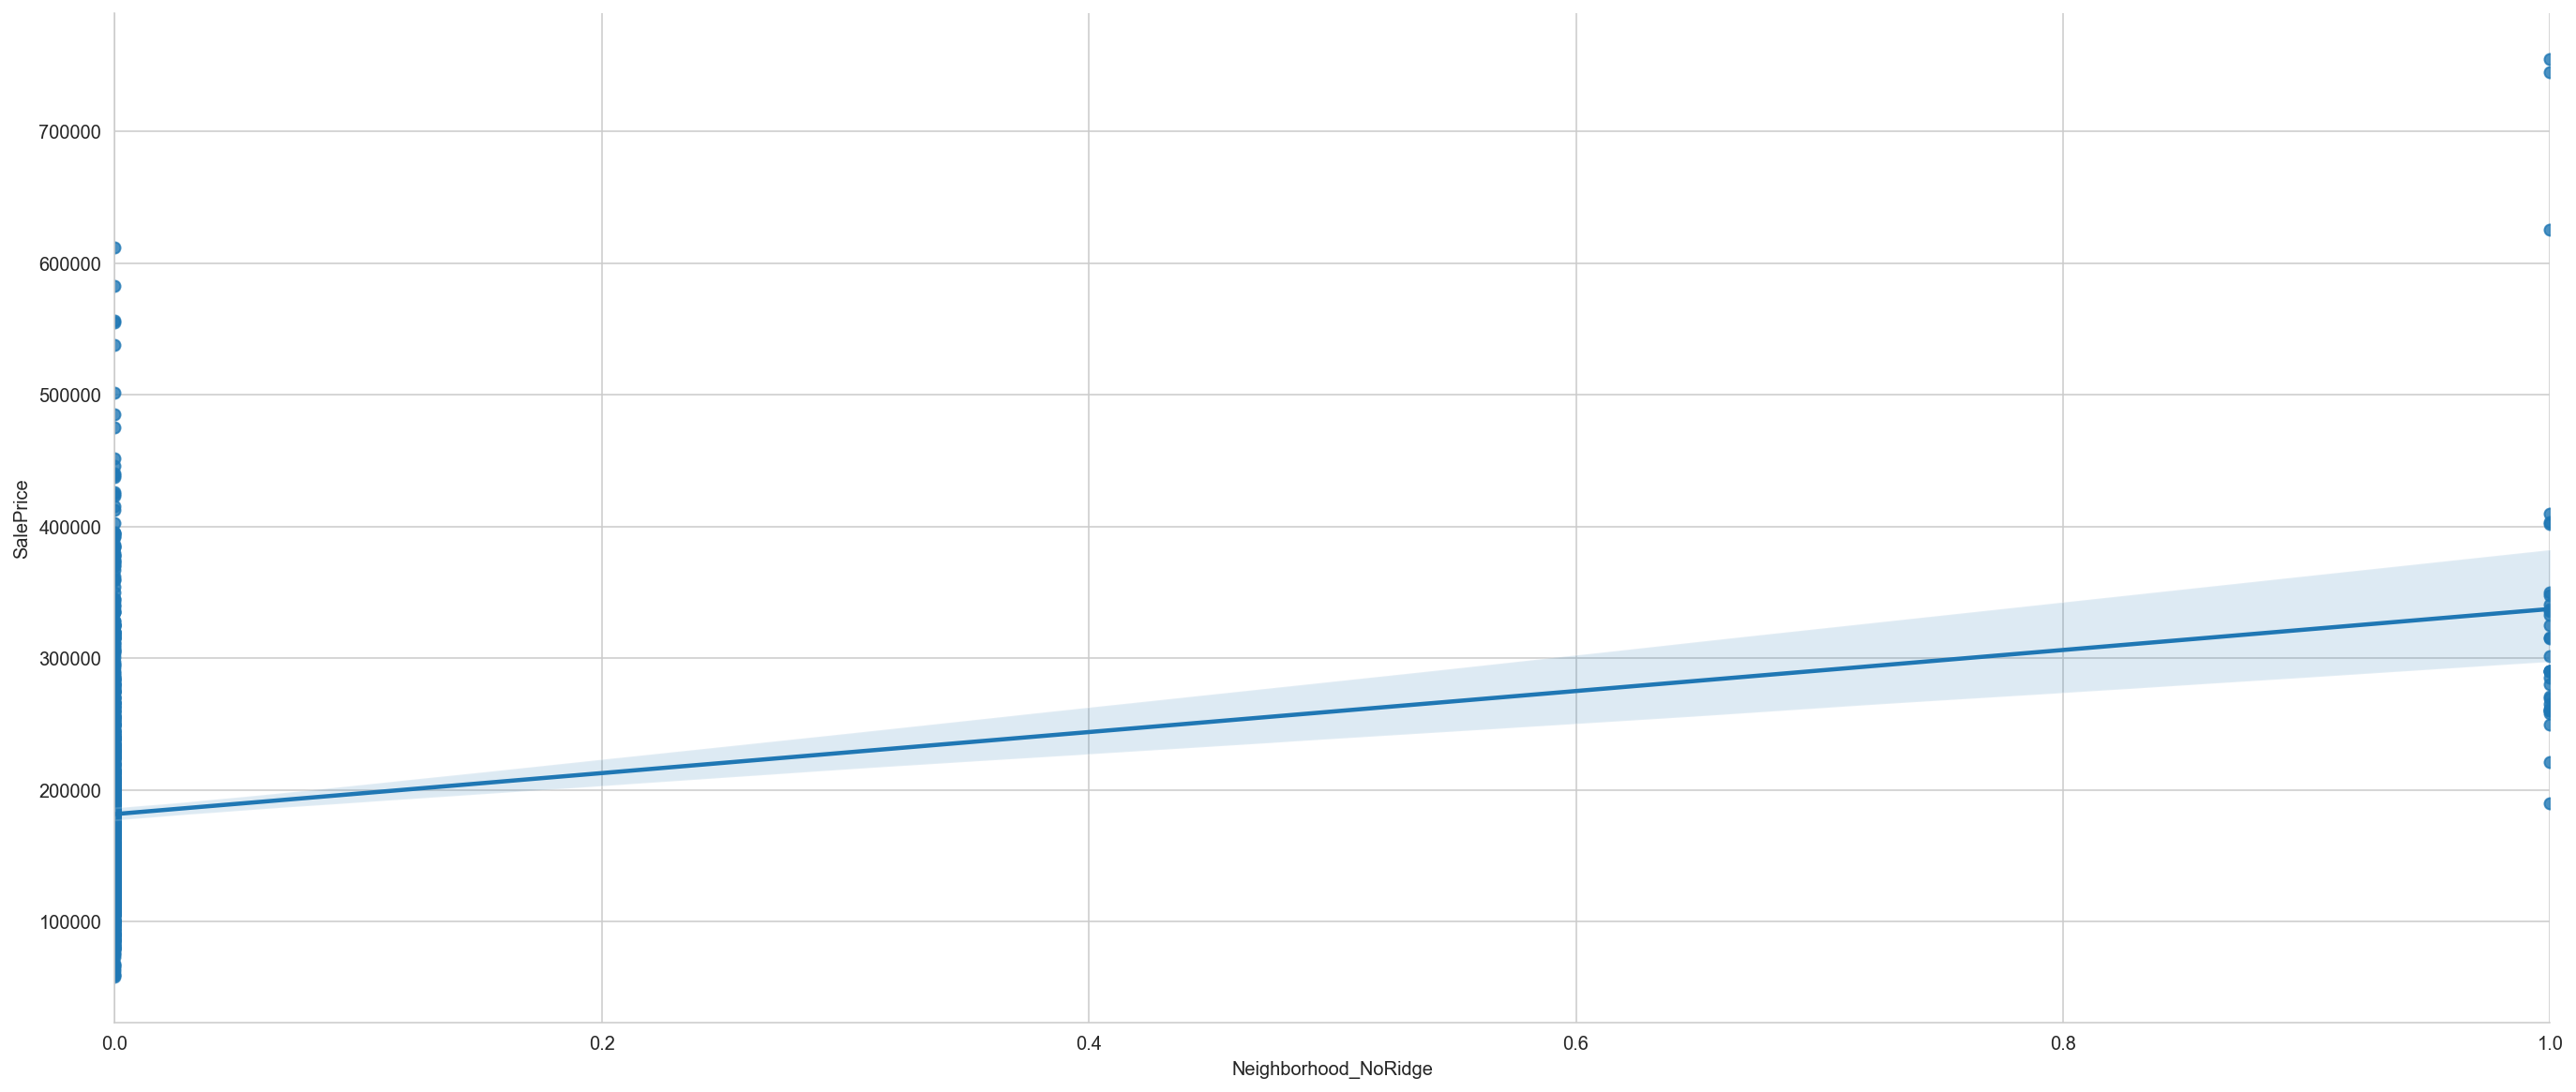

In [66]:
# Check out linear realtionship for Northridge
# Should actaully be using logistic regeression

# sns.lmplot('Neighborhood_NoRidge','SalePrice', house11)
sns.lmplot('Neighborhood_NoRidge','SalePrice', pd.get_dummies(house11), height=8, aspect=(19/8))

,level_0,level_1,corr,beta_0,beta_1,level_1_dtype
20,SalePrice,GarageFinish_Fin,0.431646,165628.069544,82376.256621,uint8
65,SalePrice,GarageFinish_RFn,0.147942,178265.281130,26699.877553,uint8
297,SalePrice,GarageFinish_Unf,-0.512402,224553.947798,-85203.053798,uint8


<AxesSubplot:xlabel='level_1'>

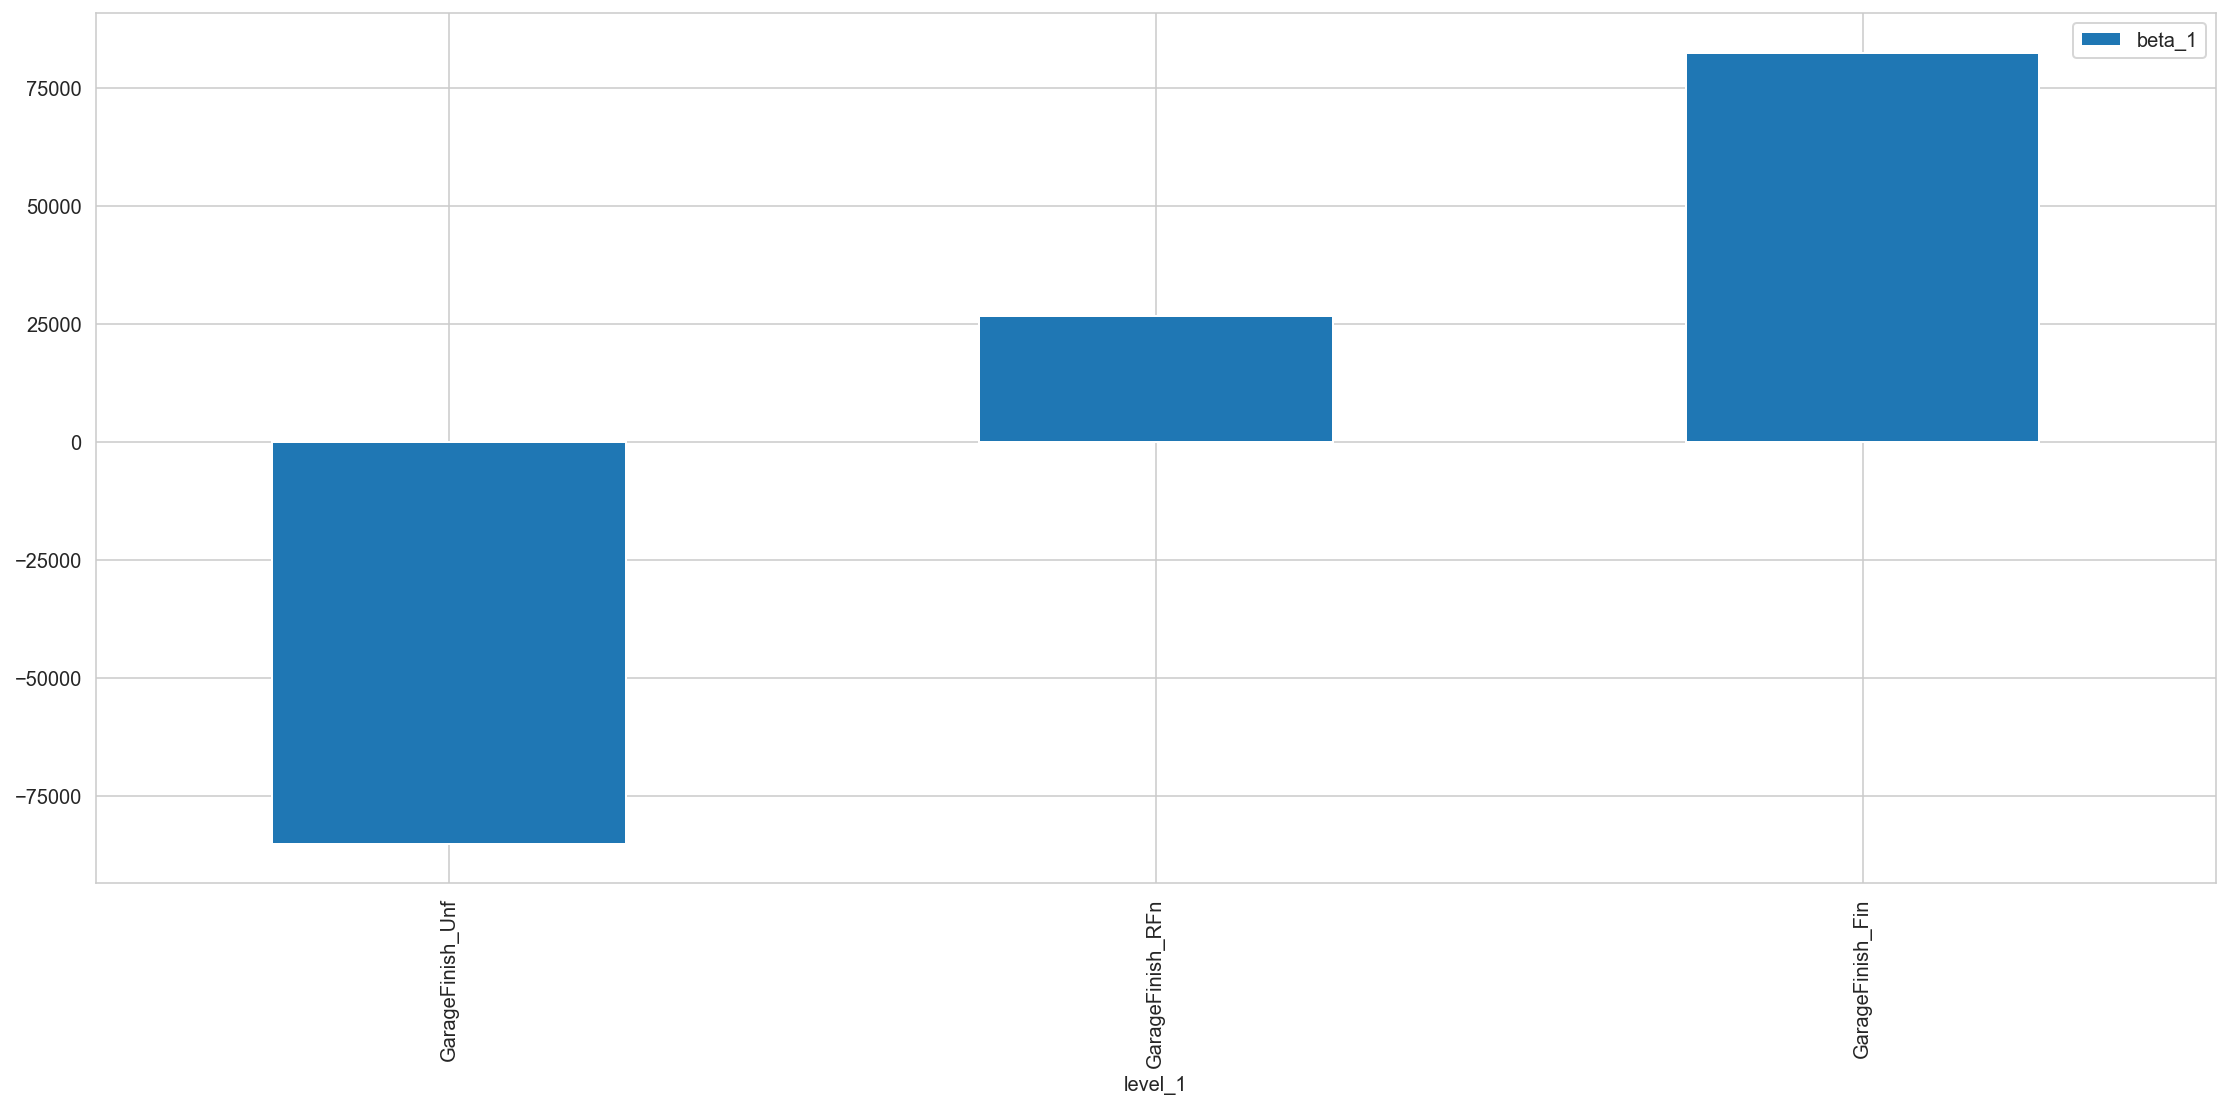

In [67]:
# Create dictionary for Neighborhoods and create chart for slideshow


df_GarageFinish = row_filterer(house11_SalePrice_Corr,'level_1',"GarageFinish").sort_values(by= 'beta_1', ascending  = False)
df_GarageFinish.index = df_GarageFinish['level_1']
df_GarageFinish = df_GarageFinish[['beta_1']]

display(
row_filterer(house11_SalePrice_Corr,'level_1',"GarageFinish").sort_values(by= 'beta_1', ascending  = False),
df_GarageFinish.sort_values('beta_1').plot(kind='bar', figsize = (19,8))
    )

In [68]:
# Attempting to create a funciton to create a bar chart from dummies

def bar_chart_from_dummies(filt):
    df = row_filterer(house11_SalePrice_Corr,'level_1',filt)
    df.index = df['level_1']
    df = df[['beta_1']]
    return df.sort_values('beta_1').plot(kind='bar')
    
    #IndexError: index 0 is out of bounds for axis 0 with size 0

In [69]:
# BsmtQual



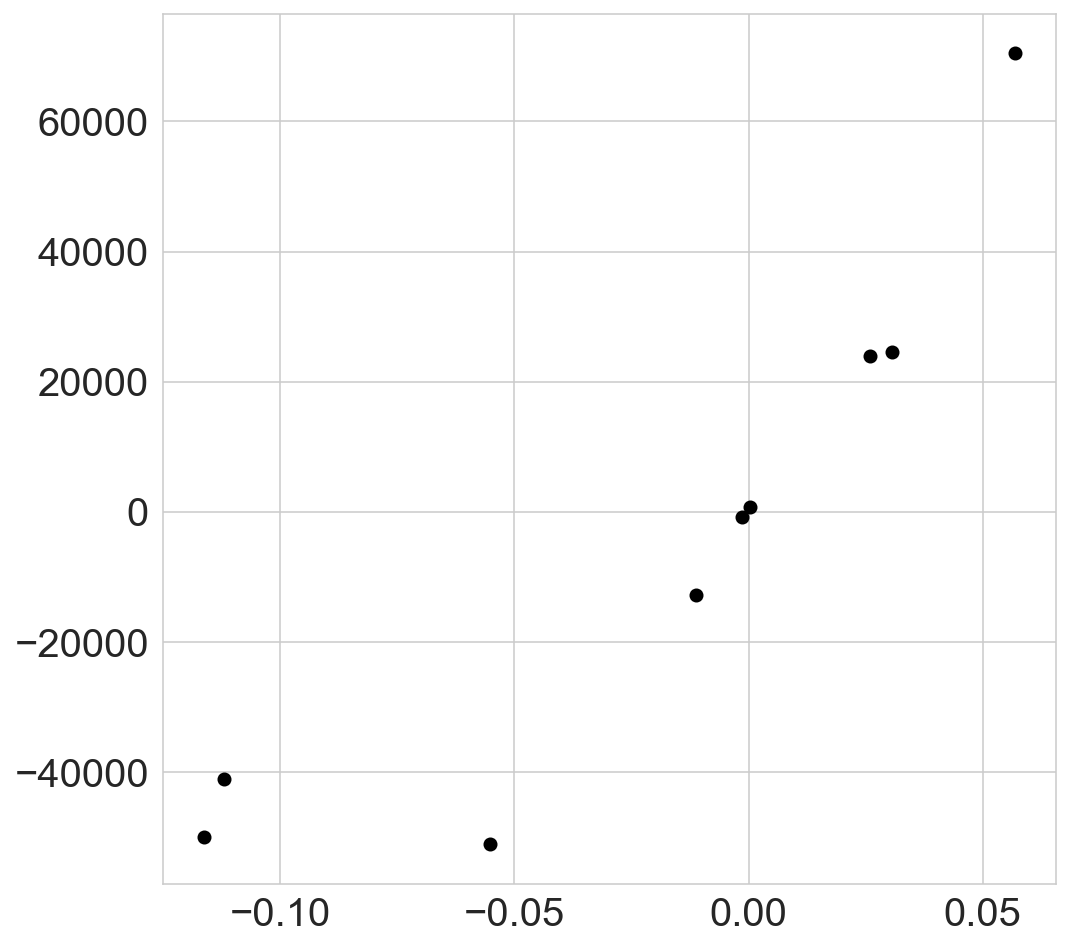

In [70]:
scatter_maker(row_filterer(house11_SalePrice_Corr,'level_1',"Condition0_"),'corr','beta_1',8)

In [71]:
# Attempt to convert to list-comp into a filter

# house11_SalePrice_Corr['level_1'] in [row for row in house11_SalePrice_Corr['level_1'] if "KitchenQual" in row]
# ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()

In [72]:
# Attempt to convert to list-comp

# [True else False for row in house11_SalePrice_Corr['level_1'] if "KitchenQual" in row]
# SyntaxError: invalid syntax

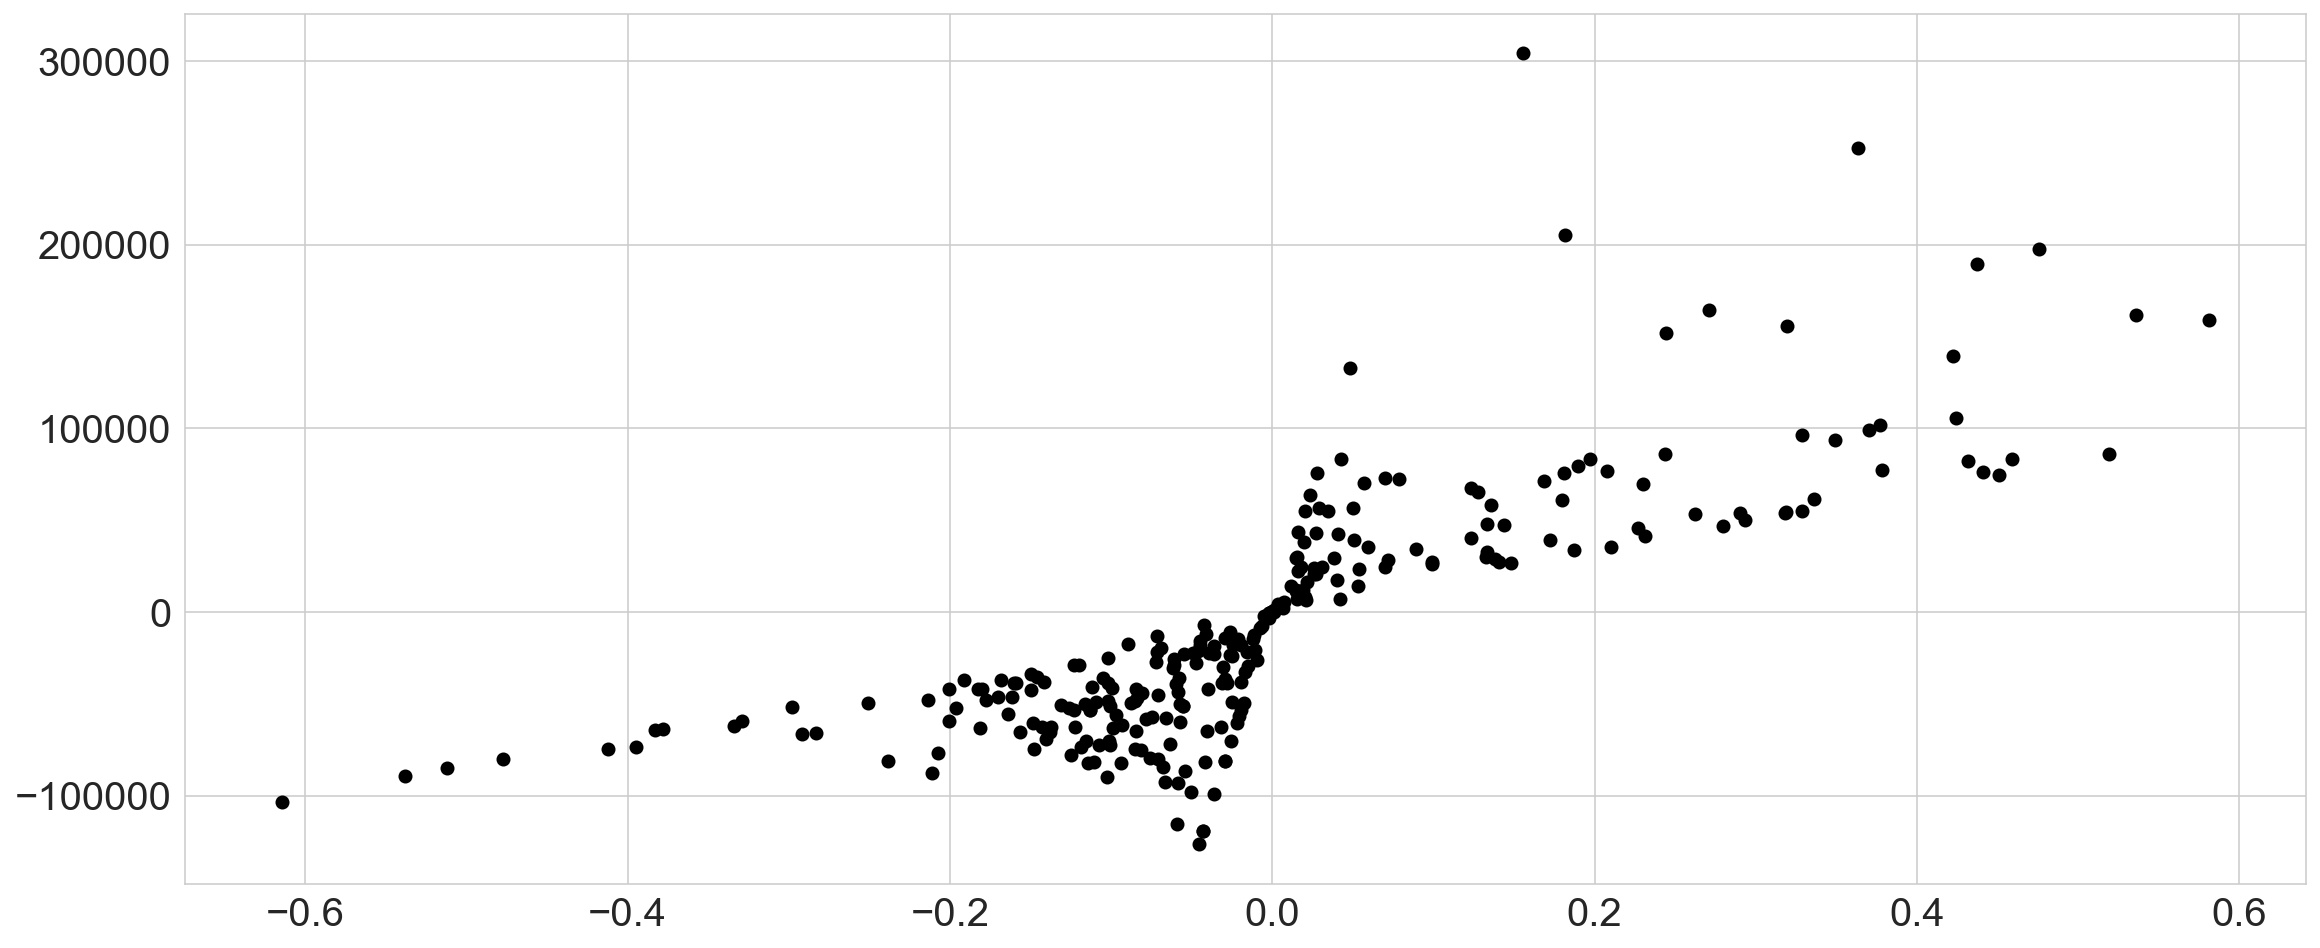

In [73]:
# Scatter plot for just the dummfied features


# Plot showing out linear forcast
fig = plt.figure(figsize=(19,8))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(
    x= house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'uint8']['corr'], 
    y=house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'uint8']['beta_1'], 
    c='k')


In [74]:
# house11_SalePrice_Corr.sort_values(by = 'beta_1', ascending = False).head(60)
# house11_SalePrice_Corr.sort_values(by = 'level_1', ascending = True).head(60)

house11_beta_1 = house11_SalePrice_Corr[house11_SalePrice_Corr['level_1_dtype'] == 'int64'].sort_values(by = 'beta_1', ascending = False)
house11_beta_1 = house11_beta_1[['level_1','beta_1']]
house11_beta_1.index = house11_beta_1['level_1']
house11_beta_1 = house11_beta_1.drop(columns = 'level_1')
house11_beta_1


# Idea before sleeping: Make a scatter graph for corr vs beta_1

,beta_1
level_1,
FullBath,84899.190866
GarageCars,82311.054751
Fireplaces,59918.874072
HalfBath,44011.235025
BsmtFullBath,37849.695571
TotRmsAbvGrd,28480.269462
BedroomAbvGr,17285.205389
YearRemodAdd,2037.844936
YearBuilt,1399.192522


In [75]:
house11['Fireplaces'].value_counts()

0    523
1    508
2     78
3      4
Name: Fireplaces, dtype: int64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---
 

#### Q1. You need to build a reliable estimator/model for the price of the house given characteristics of the house that CANNOT be renovated. 


#### Some examples of fixed and renovateble featurs include:

#### Fixed features
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

 

#### Renovateable features:(these are some examples of renovateable features that you will include in your model for question two)
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

 

### **Your goals for question one:**
 - Perform any cleaning, feature engineering, and EDA you deem necessary.
 - Be sure to remove any houses that are not residential from the dataset.
 - Identify **fixed** features that can predict price.
 - Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
 - Characterize your model. How well does it perform? What are the best estimates of price?

 

In [76]:
# My (Draft) Steps
    # Create Sebset DataFrame with just the 'fixed'
    # Create List Comp for just the objects within Sebset DataFrame with just the 'fixed'
    # Create Dummies using List Comp for just the objects within Sebset DataFrame with just the 'fixed'
    # Drop the object-columns
    # Standardize the INT columns before combining the the two DataFrames
        # dsi-unit-3.34-feature-engineerin
    # Merge/Concat with Create Dummies using List Comp for just the objects within Sebset DataFrame with just the 'fixed'


In [77]:
house11_Q1.columns

Index(['MSSubClass02', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition0_Artery', 'Condition0_Feedr',
       'Condition0_Norm', 'Condition0_PosA', 'Condition0_PosN',
       'Condition0_RRAe', 'Condition0_RRAn', 'Condition0_RRNe',
       'Condition0_RRNn', 'BldgType', 'YearBuilt', 'YearRemodAdd',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageType',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive', 'MoYrSold',
       'SaleType', 'SaleCondition', 'TestOrTrain', 'SalePrice'],
      dtype='object')

In [78]:
# 'TestOrTrain_Test'
# 'TestOrTrain_Train'

pd.get_dummies(house11_Q1)[pd.get_dummies(house11_Q1)['TestOrTrain_Train'] == 1].drop(columns = ['TestOrTrain_Test', 'TestOrTrain_Train'])


,LotFrontage,LotArea,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,78.0,9262,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1452,35.0,3675,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1454,62.0,7500,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,62.0,7917,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [79]:
pd.get_dummies(house11_Q1)[pd.get_dummies(house11_Q1)['TestOrTrain_Test'] == 1].drop(columns = ['TestOrTrain_Test', 'TestOrTrain_Train'])

,LotFrontage,LotArea,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
26,60.0,7200,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27,98.0,11478,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
33,70.0,10552,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
38,68.0,7922,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
45,61.0,7658,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,60.0,7200,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1438,90.0,7407,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,13175,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,9042,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [80]:
# Sorting out 
# X_train, X_test, y_train, y_test

# 'TestOrTrain_Test'
# 'TestOrTrain_Train'


# X_train
# house11_Q1_X_train = house11_Q1[house11_Q1['TestOrTrain'] == 'Train'].drop(columns = 'TestOrTrain')
house11_Q1_X_train = pd.get_dummies(house11_Q1)[pd.get_dummies(house11_Q1)['TestOrTrain_Train'] == 1].drop(columns = ['TestOrTrain_Test', 'TestOrTrain_Train','SalePrice'])

#X_test
# house11_Q1_X_test = house11_Q1[house11_Q1['TestOrTrain'] == 'Test'].drop(columns = 'TestOrTrain')
house11_Q1_X_test = pd.get_dummies(house11_Q1)[pd.get_dummies(house11_Q1)['TestOrTrain_Test'] == 1].drop(columns = ['TestOrTrain_Test', 'TestOrTrain_Train','SalePrice'])

#y_train
house11_Q1_y_train = house11_Q1[house11_Q1['TestOrTrain'] == 'Train']['SalePrice']

# y_test
house11_Q1_y_test = y_train = house11_Q1[house11_Q1['TestOrTrain'] == 'Test']['SalePrice']


# Display all four to check the shapes are all aligned for the models to work

display(
    house11_Q1_X_train,
    house11_Q1_X_test,
    house11_Q1_y_train,
    house11_Q1_y_test
    )

,LotFrontage,LotArea,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,78.0,9262,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1452,35.0,3675,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1454,62.0,7500,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,62.0,7917,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


,LotFrontage,LotArea,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
26,60.0,7200,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27,98.0,11478,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
33,70.0,10552,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
38,68.0,7922,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
45,61.0,7658,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,60.0,7200,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1438,90.0,7407,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,13175,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,9042,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1451    287090
1452    145000
1454    185000
1455    175000
1459    147500
Name: SalePrice, Length: 984, dtype: int64

26      134800
27      306000
33      165500
38      109000
45      319900
         ...  
1428    119000
1438    149700
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 129, dtype: int64

In [81]:
# Make sure shapes are all aligned

display(
    house11_Q1_X_train.shape,
    house11_Q1_X_test.shape,
    house11_Q1_y_train.shape,
    house11_Q1_y_test.shape
    )

(984, 131)

(129, 131)

(984,)

(129,)

In [82]:
# Creating the dummies for X_train and X_test
# No need to do this anymore

# house11_Q1_X_train

# house11_Q1_dummies_X_train = pd.get_dummies(house11_Q1_X_train)

# house11_Q1_dummies_X_test = pd.get_dummies(house11_Q1_X_test)

# house11_Q1_X_test

In [83]:
# Run a good old LinearRegression

# dsi-unit-3.08-evaluation-cross_validation_train_test-lesson

from sklearn.linear_model import LinearRegression

slr_Q1 = LinearRegression() # Make sure it's names something with "Q1" in it so it doesn't jam with Question 2

# slr.fit(house11_Q1_X_train, house11_Q1_y_train)
# # ValueError: could not convert string to float: '60 - 2-STORY 1946 & NEWER'

#.fit(X,y)
slr_Q1.fit(
    house11_Q1_X_train, 
    house11_Q1_y_train
)


# dsi-unit-3.09-evaluation-cross_validation_train_test-lab
slr_Q1.score( 
    house11_Q1_X_test, 
    house11_Q1_y_test
)

0.8840941542275492

Test R2 Score:  0.8840941542275492
Train R2 Score:  0.8544838910250884


None

None

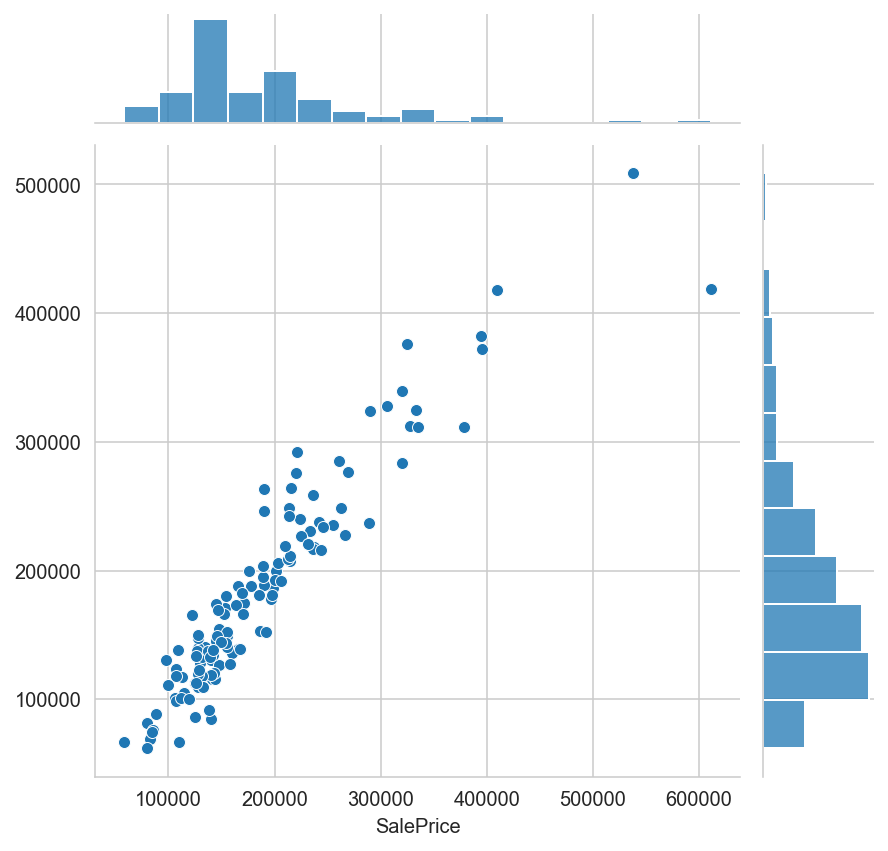

In [84]:
# Create a jointplot


# dsi-unit-3.09-evaluation-cross_validation_train_test-lab

house11_Q1_yhat = slr_Q1.predict(house11_Q1_X_test)

display(
sns.jointplot(x = house11_Q1_y_test, y = house11_Q1_yhat),
print("Test R2 Score: ",slr_Q1.score(house11_Q1_X_test, house11_Q1_y_test)),
print("Train R2 Score: ",slr_Q1.score(house11_Q1_X_train, house11_Q1_y_train))
    )

The jointplot above my first answer for Question 1

I split the train and test data by pre and post 2021, and simply used LinearRegression to achieve an R2 test score or 85%

I will next proceed to apply chi2, f_classif fundamentals to eliminate chose features in hope to beat this score.

- Characterize your model. How well does it perform? What are the best estimates of price?

It perform well with a balanced fit with a 87.7% R2 Score

In [85]:
# 


#### My Notes-to-self on chi-squared and F_classif

"The chi-squared statistic is a single number that tells you how much difference exists between your observed counts and the counts you would expect if there were no relationship at all in the population. ... A low value for chi-square means there is a high correlation between your two sets of data."

https://www.statisticshowto.com/probability-and-statistics/chi-square/#:~:text=The%20chi%2Dsquared%20statistic%20is,at%20all%20in%20the%20population.&text=A%20low%20value%20for%20chi,your%20two%20sets%20of%20data.


"What do chi squared results mean?
A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. ... The chi-square statistic compares the size of any discrepancies between the expected results and the actual results, given the size of the sample and the number of variables in the relationship."

https://www.investopedia.com/terms/c/chi-square-statistic.asp


"What is F_classif?

f_classif: Used only for categorical targets and based on the Analysis of Variance (ANOVA) statistical test. chi2: Performs the chi-square statistic for categorical targets, which is less sensible to the nonlinear relationship between the predictive variable and its target."

https://www.dummies.com/programming/big-data/data-science/how-to-use-python-to-select-the-right-variables-for-data-science/



In [86]:
# "I will next proceed to apply chi2, f_classif fundamentals to eliminate chose features in hope to beat this score."

# dsi-unit-3.21-optimization-feature_selection-lab


from sklearn.feature_selection import SelectKBest, chi2, f_classif

# build the selector (we'll build one with each score type)
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# train the selector on our data
skb_f.fit(house11_Q1_X_train, house11_Q1_y_train)
skb_chi2.fit(house11_Q1_X_train, house11_Q1_y_train)

# examine results
kbest_Q1 = pd.DataFrame([house11_Q1_X_train.columns, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)


# kbest_Q1.sort_values(by = 'chi2 score', ascending = False)

top5_chi2_Q1 = kbest_Q1.sort_values(by = 'chi2 score', ascending = False)['feature'][:5].to_list()

top5_Fclassif_Q1 = kbest_Q1.sort_values(by = 'f_classif', ascending = False)['feature'][:5].to_list()


display(
    top5_chi2_Q1, # Create list of top 5 featues with highest chi2 score
    top5_Fclassif_Q1 # Create list of top 5 featues with highest f_classif score
    )

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 42  43  54 118 123 127] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['LotArea', '2ndFlrSF', 'BsmtFinSF1', 'LowQualFinSF', 'GrLivArea']

['Street_Grvl',
 'SaleType_Con',
 'SaleCondition_Alloca',
 'Street_Pave',
 'SaleType_Oth']



'LotArea', 
'2ndFlrSF', 
'BsmtFinSF1', 
'LowQualFinSF', 
'GrLivArea'

In [87]:
house11_Q1_top5s_X_train = house11_Q1_X_train[top5_chi2_Q1 + top5_Fclassif_Q1]
house11_Q1_top5s_X_test = house11_Q1_X_test[top5_chi2_Q1 + top5_Fclassif_Q1]


# Have a look at the data and check the shapes are all matching

display(
    house11_Q1_top5s_X_train,
    house11_Q1_top5s_X_test
    )

,LotArea,2ndFlrSF,BsmtFinSF1,LowQualFinSF,GrLivArea,Street_Grvl,SaleType_Con,SaleCondition_Alloca,Street_Pave,SaleType_Oth
0,8450,854,706,0,1710,0,0,0,1,0
1,9600,0,978,0,1262,0,0,0,1,0
2,11250,866,486,0,1786,0,0,0,1,0
3,9550,756,216,0,1717,0,0,0,1,0
4,14260,1053,655,0,2198,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1451,9262,0,0,0,1578,0,0,0,1,0
1452,3675,0,547,0,1072,0,0,0,1,0
1454,7500,0,410,0,1221,0,0,0,1,0
1455,7917,694,0,0,1647,0,0,0,1,0


,LotArea,2ndFlrSF,BsmtFinSF1,LowQualFinSF,GrLivArea,Street_Grvl,SaleType_Con,SaleCondition_Alloca,Street_Pave,SaleType_Oth
26,7200,0,234,0,900,0,0,0,1,0
27,11478,0,1218,0,1704,0,0,0,1,0
33,10552,0,1018,0,1700,0,0,0,1,0
38,7922,0,731,0,1057,0,0,0,1,0
45,7658,0,456,0,1752,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1428,7200,0,510,0,804,0,0,0,1,0
1438,7407,0,600,0,1236,0,0,0,1,0
1456,13175,0,790,0,2073,0,0,0,1,0
1457,9042,1152,275,0,2340,0,0,0,1,0


In [88]:
# Check the shapes are all good and matching

display(
    house11_Q1_top5s_X_train.shape,
    house11_Q1_top5s_X_test.shape,
    house11_Q1_y_train.shape,
    house11_Q1_y_test.shape
    )

(984, 10)

(129, 10)

(984,)

(129,)

Test R2 Score:  0.6724126066632649
Train R2 Score:  0.574720349728733


None

None

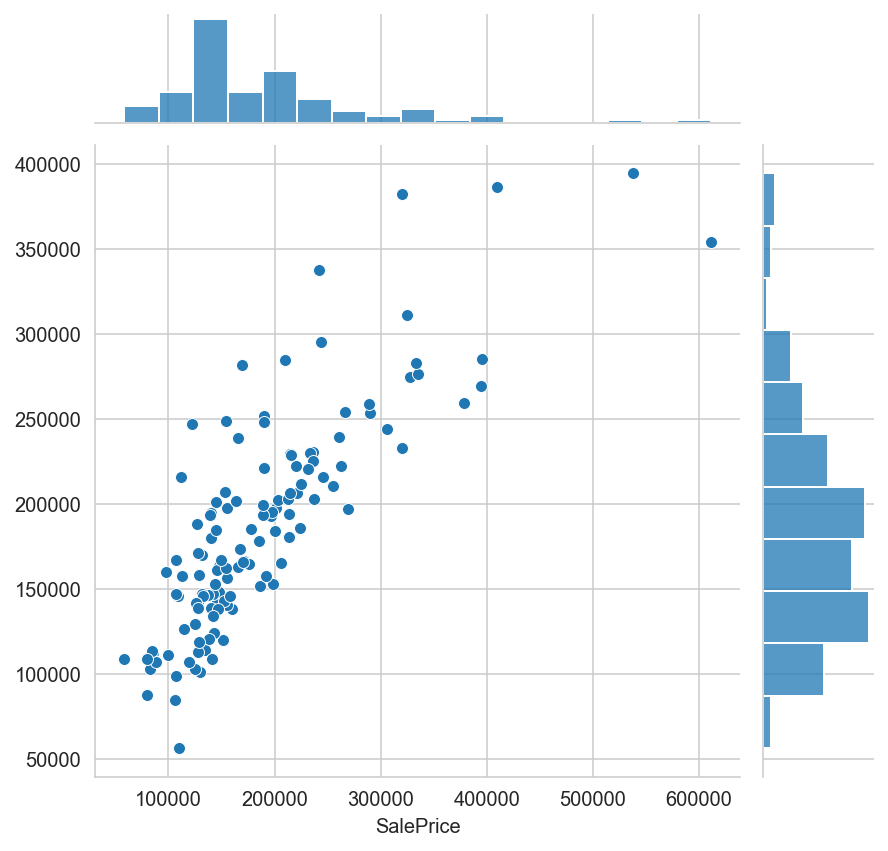

In [89]:

# dsi-unit-3.08-evaluation-cross_validation_train_test-lesson

from sklearn.linear_model import LinearRegression

slr_Q1_top5s = LinearRegression()

# slr.fit(house11_Q1_X_train, house11_Q1_y_train)
# # ValueError: could not convert string to float: '60 - 2-STORY 1946 & NEWER'

#.fit(X,y)
slr_Q1_top5s.fit(
    house11_Q1_top5s_X_train, 
    house11_Q1_y_train
)


# dsi-unit-3.09-evaluation-cross_validation_train_test-lab
slr_Q1_top5s.score( 
    house11_Q1_top5s_X_test, 
    house11_Q1_y_test
)


# Keep these here for easier copy-pasting
#     house11_Q1_top5s_X_train,
#     house11_Q1_top5s_X_test




house11_Q1_top5s_yhat = slr_Q1_top5s.predict(house11_Q1_top5s_X_test)

display(
sns.jointplot(x = house11_Q1_y_test, y = house11_Q1_top5s_yhat),
print("Test R2 Score: ",slr_Q1_top5s.score(house11_Q1_top5s_X_test, house11_Q1_y_test)),
print("Train R2 Score: ",slr_Q1_top5s.score(house11_Q1_top5s_X_train, house11_Q1_y_train))
    )

The above graph is my second answer for Question 1

I used only ten feature columns which were chosen from having the highest chi2 and f_class scores
This is did not score a higher R2 score than my first attempt at this question

In [90]:
# Try Huber from 
# dsi-unit-3.13-robust-regression

# ValueError: x and y must be the same size


# It seems to only works for comparing the target variable to one other predicter varaible



# import sklearn.linear_model
# huber = sklearn.linear_model.HuberRegressor()
# huber.fit(house11_Q1_X_train, house11_Q1_y_train)
# huber_predictions = huber.predict(house11_Q1_X_test)

# (fig, ax) = plt.subplots()
# # fig.size = (10,10)
# ax.scatter(house11_Q1_X_test, house11_Q1_y_test)
# ax.scatter(house11_Q1_X_test, huber_predictions, c='red', s=1)
# ax.set_xlabel('xlabel')
# ax.set_ylabel("ylabel")

# import sklearn.metrics
# print("R^2 = ",sklearn.metrics.r2_score(Xtest, huber_predictions))
# print("Median absolute error = ",sklearn.metrics.median_absolute_error(Xtest, huber_predictions))
# print("Mean absolute error = ",sklearn.metrics.mean_absolute_error(Xtest, huber_predictions))

In [91]:
# display(
#     house11_Q1_dummies_X_train.shape, 
#     house11_Q1_y_train.shape
# )

# NameError: name 'house11_Q1_dummies_X_train' is not defined

In [92]:
# dsi-unit-3.08-evaluation-cross_validation_train_test-lesson
# Calculate the  𝑅2  score on the test data

print(slr_Q1.score(house11_Q1_X_test, house11_Q1_y_test))

# ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 119 is different from 101)

0.8840941542275492


In [93]:
# dsi-unit-3.08-evaluation-cross_validation_train_test-lesson
# Calculate the  𝑅2  score on the train data

print(slr_Q1.score(house11_Q1_X_train, house11_Q1_y_train))

0.8544838910250884


In [94]:
# Still to do:
#     Need to plot scatter graph for prediction vs actual - Done
#     Need to creata a .summary table

In [95]:
# dsi-unit-3.08-evaluation-cross_validation_train_test-lesson

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 5-fold cross validation

# cross_val_scores_Q1 = cross_val_score(
#     slr_Q1, #slr, 
#     pd.concat([house11_Q1_X_train,house11_Q1_X_test], axis =0), #X, 
#     pd.concat([house11_Q1_y_train,house11_Q1_y_test], axis =0), #y, 
#     cv=5
#         )
# Removed because it uses the test data which the model shouldn't see yet


cross_val_scores_Q1 = cross_val_score(
    slr_Q1, #slr, 
    house11_Q1_X_train, #X, 
    house11_Q1_y_train, #y, 
    cv=5
        )

print("Cross-validated scores:", cross_val_scores_Q1, "\nnp.mean:", np.mean(cross_val_scores_Q1))

# Make cross validated predictions on the test sets# Might want to make a table for different cv-counts

Cross-validated scores: [ 8.22156752e-01  7.50819383e-01  7.95168202e-01 -5.70210671e+07
  5.38290542e-01] 
np.mean: -11404212.834653452


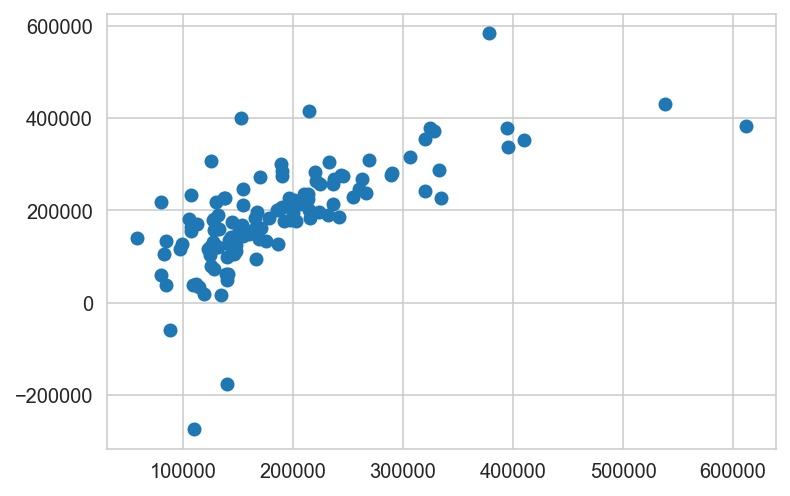

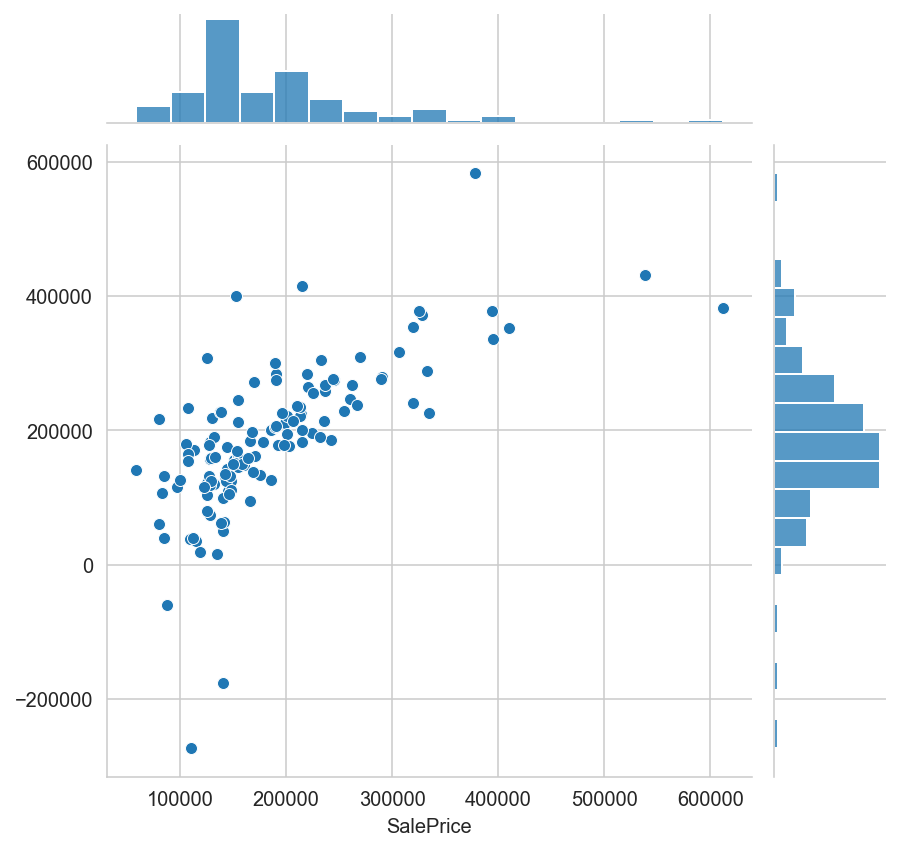

In [96]:
# Make cross validated predictions on the test sets

# dsi-unit-3.08-evaluation-cross_validation_train_test-lesson




# cross_val_predictions_Q1 = cross_val_predict(
#     slr_Q1, #slr, 
#     pd.concat([house11_Q1_X_train,house11_Q1_X_test], axis =0), #X, 
#     pd.concat([house11_Q1_y_train,house11_Q1_y_test], axis =0), #y, 
#     cv=5
#         )
# Removed because it uses the test data which the model shouldn't see yet

cross_val_predictions_Q1 = cross_val_predict(
    slr_Q1, #slr, 
    house11_Q1_X_test, #X, 
    house11_Q1_y_test, #y, 
    cv=5
        )


# plt.scatter(pd.concat([house11_Q1_y_train,house11_Q1_y_test], axis =0), cross_val_predictions_Q1)



# plt.pairplot(house11_Q1_y_test, cross_val_predictions_Q1)
# AttributeError: module 'matplotlib.pyplot' has no attribute 'pairplot'


# plt.jointplot(house11_Q1_y_test, cross_val_predictions_Q1)
# AttributeError: module 'matplotlib.pyplot' has no attribute 'jointplot'


# plt.pairplot(house11_Q1_y_test, cross_val_predictions_Q1)
# AttributeError: module 'matplotlib.pyplot' has no attribute 'pairplot


display(
plt.scatter(house11_Q1_y_test, cross_val_predictions_Q1),
sns.jointplot(x = house11_Q1_y_test, y = cross_val_predictions_Q1)
    )

The above scatter and joint plots are my second submission for Question 1. This was gerneragted using:
```python
from sklearn.model_selection import cross_val_score, cross_val_predict
``` 
With an R-Square score of 39.2%. I prefer to use the LinearRegression() for the presentation

In [97]:
# dsi-unit-3.08-evaluation-cross_validation_train_test-lesson
# manually calcualte the r2

cross_val_r2_Q1 = metrics.r2_score(house11_Q1_y_test, cross_val_predictions_Q1)
print("Cross-Predicted R2:", cross_val_r2_Q1)

Cross-Predicted R2: 0.15636961102656366


In [98]:
# Time to use .fit(X,y)

# All Lessons with a .fit(X, y)
    # dsi-unit-3.05-regression-sklearn_statsmodels_intro-lesson
    # dsi-unit-3.06-regression-mlr_assumptions_statsmodels-lab
    # dsi-unit-3.07-regression-object_oriented_programming-lesson
        # SimpleLinearRegression(fit_intercept=True)
    # dsi-unit-3.08-evaluation-cross_validation_train_test-lesson
        # from sklearn.model_selection import train_test_split
        # train_test_split(X, y, test_size=0.5)


In [99]:
# dsi-unit-3.35-missing-data-management

from sklearn.impute import KNNImputer

knn_imp = KNNImputer()
# knn_imp_income_missing = knn_imp.fit_transform(scaled_house_fixed_features_int)

# knn_imp_income_missing = pd.DataFrame(knn_imp_income_missing, columns = income_missing.columns)

In [100]:
# house['SalePrice'].astype(float)
# house_fixed_scaled_and_dummied['SalePrice'].astype(float)
#type(house['SalePrice'].astype(float)

In [101]:
# house_fixed_scaled_and_dummied[house_fixed_scaled_and_dummied['LotFrontage'].isnull() == False]
# house_fixed_scaled_and_dummied[house_fixed_scaled_and_dummied['GarageYrBlt'].isnull() == False]

# house_fixed_scaled_and_dummied_nulls_dropped = house_fixed_scaled_and_dummied[(house_fixed_scaled_and_dummied['LotFrontage'].isnull() == False) & (house_fixed_scaled_and_dummied['GarageYrBlt'].isnull() == False)]
# house_fixed_scaled_and_dummied_nulls_dropped

In [102]:
# Attempt LogisticRegressionCV

# dsi-unit-3.21-optimization-feature_selection-lab

# from sklearn.linear_model import LogisticRegressionCV
# lrcv = LogisticRegressionCV(penalty='l1', Cs=100, cv=10, solver='liblinear')
# lrcv.fit(
#     house_fixed_scaled_and_dummied_nulls_dropped.drop(columns = 'SalePrice'), #Xs, 
#     house_fixed_scaled_and_dummied_nulls_dropped['SalePrice'] #y
#     )


# ValueError: Unknown label type: 'continuous'

# Will try standardizing everything first and run this again


# scaled_house_fixed_features_int_and_dummies_nulls_dropped


# from sklearn.linear_model import LogisticRegressionCV
# lrcv = LogisticRegressionCV(penalty='l1', Cs=100, cv=10, solver='liblinear')
# lrcv.fit(
#     scaled_house_fixed_features_int_and_dummies_nulls_dropped.drop(columns = 'SalePrice'), #Xs, 
#     scaled_house_fixed_features_int_and_dummies_nulls_dropped['SalePrice'] #y
#     )


# Tried standardizing everything first and run this again
# Same error
# ValueError: Unknown label type: 'continuous'

In [103]:
# No need for train_test_split, reminded by to split by pre and post 2010 


# dsi-unit-3.09-evaluation-cross_validation_train_test-lab

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     house_fixed_scaled_and_dummied_nulls_dropped.drop(columns = 'SalePrice', axis=1), #X[predictors], 
#     house_fixed_scaled_and_dummied_nulls_dropped['SalePrice'].astype(float), #y, 
#     train_size=0.5#, 
# #    random_state=8
# )

# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# X_train.dtypes.value_counts()
# y_train
# lr.fit(X_train, y_train)
# lr.score(X_test, y_test)
# ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# No need to use 'train_test_split' because task specifies Year == 2010


In [104]:
import patsy

# Use Patsy
#     Convert column names in text: Targ_Col ~ Pred_Col1 + Pred_Col2 + Pred_Col3...
#     "If you do not want it to create an intercept column, add a -1 to the formula string" - dsi-unit-3.05-regression-sklearn_statsmodels_intro-lesson
    

# 'SalePrice ~ GrLivArea + GarageCars+ GarageArea + TotalBsmtSF + 1stFlrSF -1'

# patsy_y, patsy_X = patsy.dmatrices('CRIM ~ TAX + AGE + ZN -1', data=house, return_type='dataframe')

# list(house_fixed_scaled_and_dummied.drop(columns = 'SalePrice').columns)

In [105]:
# The core for creatiung jointplot(x = y_test, y = yhat)


# dsi-unit-3.09-evaluation-cross_validation_train_test-lab

# Creating the results visualisation

# yhat = lr.predict(X_test)
# sns.jointplot(x = y_test, y = yhat)

In [106]:

# [x for x in range(len(renovate_0_1)) if x % 2 == 0]

# [y for y in range(len(renovate_0_1)) if y % 2 != 0]
# # Name of List: renovate_0_1
# renovatable = pd.DataFrame()
# renovatable['orig_col'] = [renovate_0_1[x] for x in range(len(renovate_0_1)) if x % 2 == 0]
# renovatable['renov_dummy'] = [renovate_0_1[y] for y in range(len(renovate_0_1)) if y % 2 != 0]
# renovatable


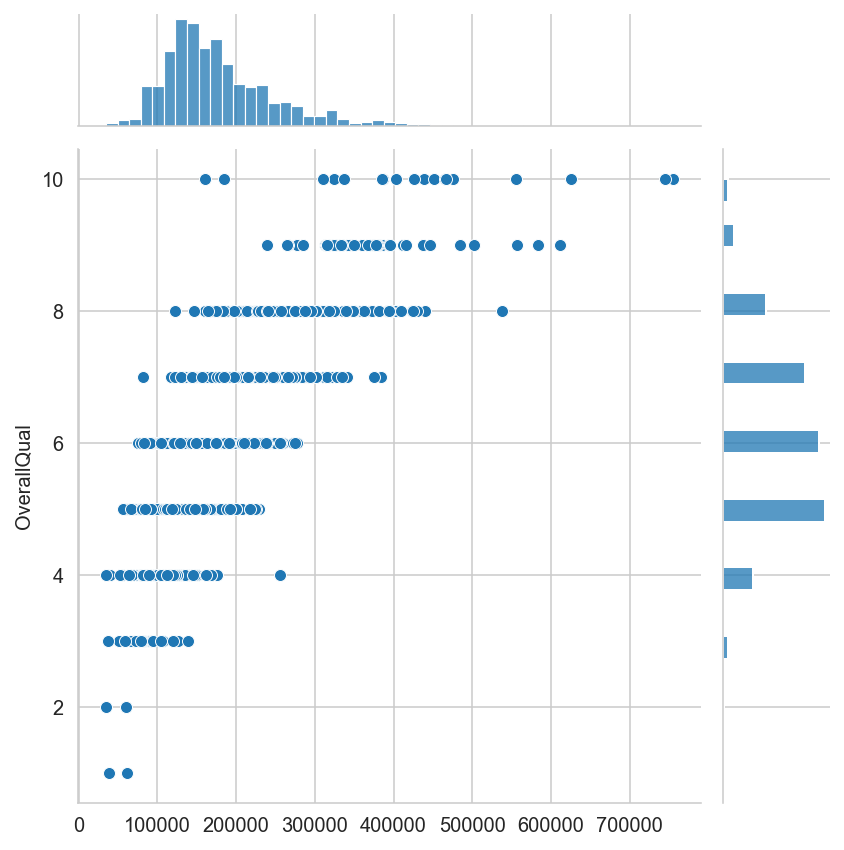

In [107]:
# Not using this anymore as it assume linearity between the scores

sns.jointplot(x = house['SalePrice'].values,
              y = house['OverallQual']
             )

In [108]:
# house.info()
house.dtypes.value_counts()

object     44
int64      35
float64     3
dtype: int64

In [109]:
# Considering making a columns with the .unique()


house['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [110]:
# Testing and playing about with [1][33]


house_options = pd.DataFrame(house.columns)
house_options[1] = np.nan
house_options[house_options[0] == 'BsmtFinType1'] # Specify the row
house_options[1][33] = house['BsmtFinType1'].unique()
house_options[house_options[0] == 'BsmtFinType1']

<ipython-input-110-2b9d5d4e2895>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_options[1][33] = house['BsmtFinType1'].unique()
D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,0,1
33,BsmtFinType1,"[GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]"


<AxesSubplot:>

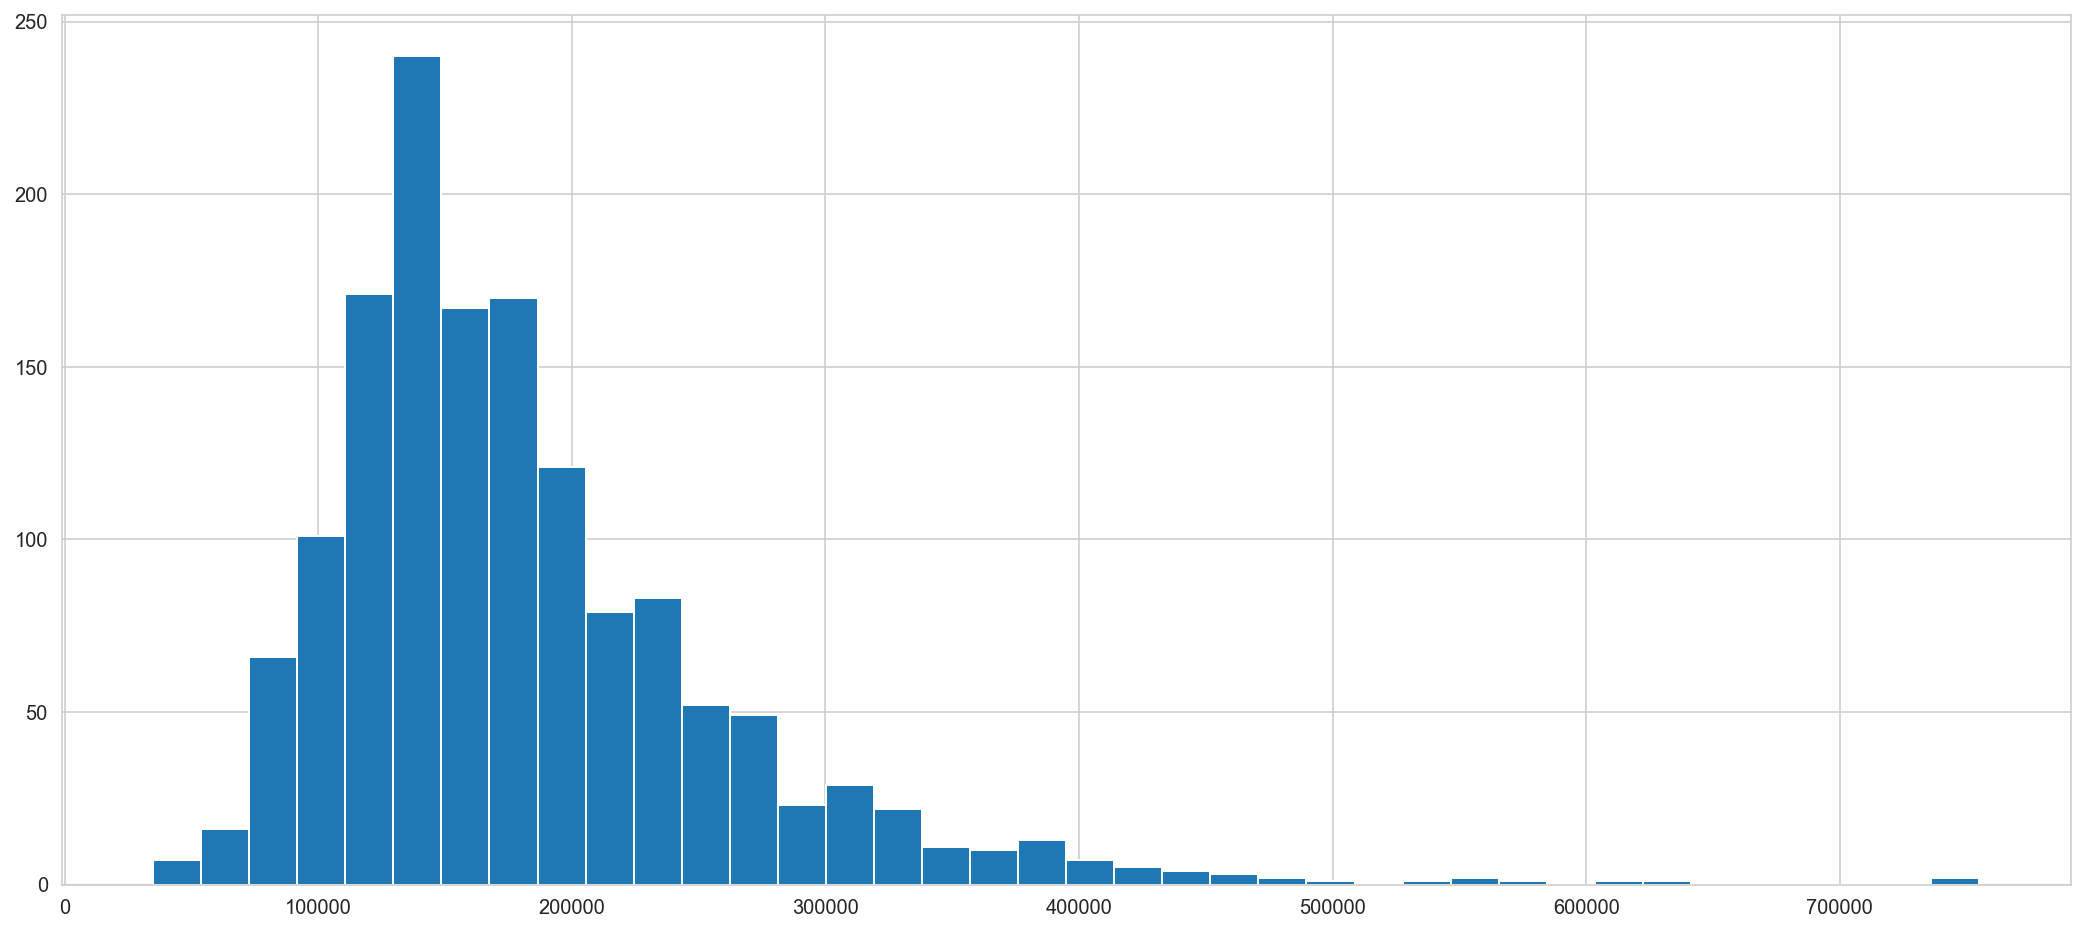

In [111]:
# Create big historgram to add to the slideshow

house['SalePrice'].hist(bins = int(np.sqrt(len(house['SalePrice']))),figsize=(18,8))
# house['SalePrice'].hist(bins = len(house['SalePrice']),figsize=(16,8))

In [112]:
# Calculate the mean/median/mode for the slideshow

# house11['SalePrice'].mean()
# 186277.64330637915

# house11['SalePrice'].median()
# 165000.0

# house11['SalePrice'].mode()
# 140000

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

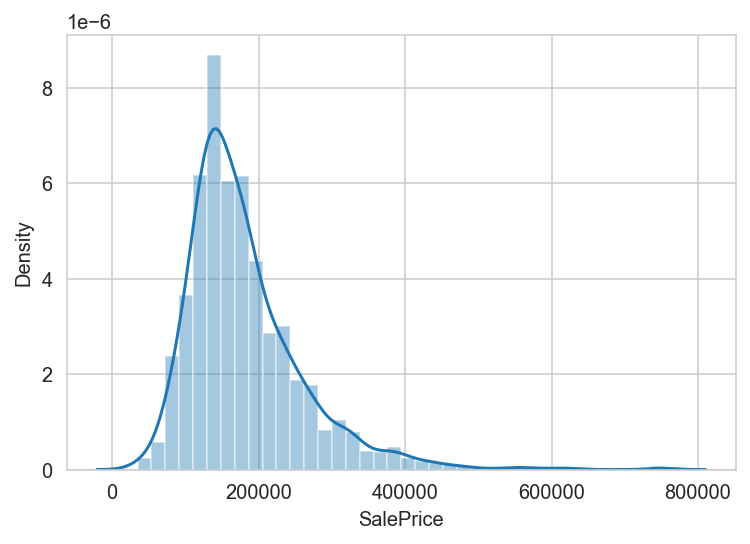

In [113]:
sns.figsize = (20,20)

sns.distplot(
    house['SalePrice'],
    bins=int(np.sqrt(house.shape[0]))
    )

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

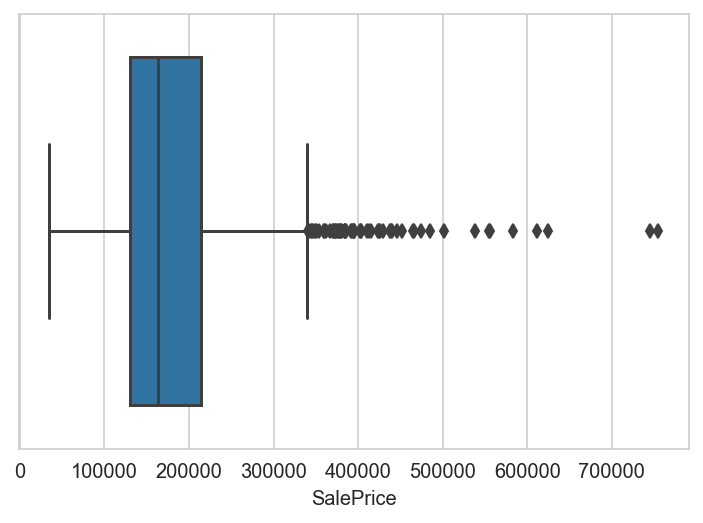

In [114]:
# Use boxplot to beck for outliers

sns.boxplot(house['SalePrice'])

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

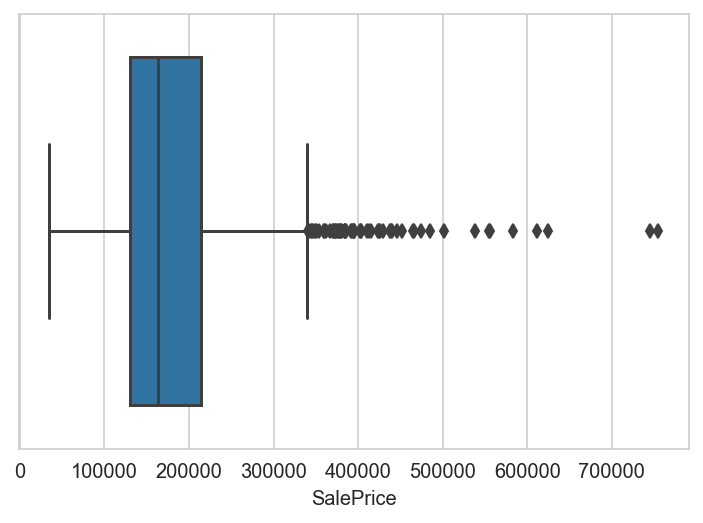

In [115]:
# This cellw as written before house11 was created, cannot put into Slideshow

sns.boxplot(house['SalePrice'])
house['SalePrice'].describe()

In [116]:
# Using interquartile range in the early days of this project

iqr3on2_house_SalePrice = 1.5 * (house['SalePrice'].describe()[6] - house['SalePrice'].describe()[4]),
top_iqr3on2_house_SalePrice = float(house['SalePrice'].describe()[5] + iqr3on2_house_SalePrice)
bottom_iqr3on2_house_SalePrice = float(house['SalePrice'].describe()[5] - iqr3on2_house_SalePrice)

In [117]:
# Using interquartile range in the early days of this project

display(
iqr3on2_house_SalePrice,
top_iqr3on2_house_SalePrice,
bottom_iqr3on2_house_SalePrice
    )

(126037.5,)

289037.5

36962.5

In [118]:
# rddunlap23_corr_heatmap(house)

In [119]:
# house_corr
pd.DataFrame(house.corr().stack().sort_values(ascending  = False)).to_csv('./house_corr.csv')
pd.DataFrame(house.corr().stack().sort_values(ascending  = False))

0
Id           Id             1.000000
FullBath     FullBath       1.000000
BsmtFullBath BsmtFullBath   1.000000
GrLivArea    GrLivArea      1.000000
LowQualFinSF LowQualFinSF   1.000000
...                              ...
YearBuilt    EnclosedPorch -0.387268
BsmtFullBath BsmtUnfSF     -0.422900
BsmtUnfSF    BsmtFullBath  -0.422900
             BsmtFinSF1    -0.495251
BsmtFinSF1   BsmtUnfSF     -0.495251

[1444 rows x 1 columns]

In [120]:
#A:

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Q2. Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 of the project: what are the costs/benefits of renovateable features such as quality, condition, and renovations?

To isolate the effect of the renovateable features on the sale price one way of doing this is to use the residuals from the first model as your target variable in the second model. The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. You will use the renovateable features as the predictors for this second model.  

 
---

### **Your goals for question two:**

Use the features in the data that are renovatable as predictors for your second model. This second model will predict the variance/residuals from the first model.  As with Q1 , train the model on pre-2010 data and evaluate its performance on the 2010 houses.

How well has your chosen model done?  


Which renovateable features are the most important in your second model .  Articulate your findings and make sense of the results.

 
Do you trust your model?   

 

In [121]:
# TAke a look at the Question 2 subset

display(
    house11_Q2,
    house11_Q2.columns.to_list(),
    house11_Q2.dtypes.value_counts()
    )

,HouseStyle,OverallQual02,OverallCond02,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,TestOrTrain,SalePrice
0,2Story,7 - Good,5 - Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,...,0,0,0,0,NaN,NaN,NaN,0,Train,208500
1,1Story,6 - Above Average,8 - Very Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,...,0,0,0,0,NaN,NaN,NaN,0,Train,181500
2,2Story,7 - Good,5 - Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,...,0,0,0,0,NaN,NaN,NaN,0,Train,223500
3,2Story,7 - Good,5 - Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,...,272,0,0,0,NaN,NaN,NaN,0,Train,140000
4,2Story,8 - Very Good,5 - Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,...,0,0,0,0,NaN,NaN,NaN,0,Train,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2Story,6 - Above Average,5 - Average,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,...,0,0,0,0,NaN,NaN,NaN,0,Train,175000
1456,1Story,6 - Above Average,6 - Above Average,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,...,0,0,0,0,NaN,MnPrv,NaN,0,Test,210000
1457,2Story,7 - Good,9 - Excellent,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,...,0,0,0,0,NaN,GdPrv,Shed,2500,Test,266500
1458,1Story,5 - Average,6 - Above Average,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,...,112,0,0,0,NaN,NaN,NaN,0,Test,142125


['HouseStyle',
 'OverallQual02',
 'OverallCond02',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'TestOrTrain',
 'SalePrice']

object     27
int64      18
float64     1
dtype: int64

In [122]:
# Sorting out 
# X_train, X_test, y_train, y_test

# 'TestOrTrain_Test'
# 'TestOrTrain_Train'


# X_train
# house11_Q2_X_train = house11_Q2[house11_Q2['TestOrTrain'] == 'Train'].drop(columns = 'TestOrTrain')
house11_Q2_X_train = pd.get_dummies(house11_Q2)[pd.get_dummies(house11_Q2)['TestOrTrain_Train'] == 1].drop(columns = ['TestOrTrain_Test', 'TestOrTrain_Train','SalePrice'])

#X_test
# house11_Q2_X_test = house11_Q2[house11_Q2['TestOrTrain'] == 'Test'].drop(columns = 'TestOrTrain')
house11_Q2_X_test = pd.get_dummies(house11_Q2)[pd.get_dummies(house11_Q2)['TestOrTrain_Test'] == 1].drop(columns = ['TestOrTrain_Test', 'TestOrTrain_Train','SalePrice'])

#y_train
house11_Q2_y_train = house11_Q2[house11_Q2['TestOrTrain'] == 'Train']['SalePrice']

# y_test
house11_Q2_y_test = y_train = house11_Q2[house11_Q2['TestOrTrain'] == 'Test']['SalePrice']

# .dtypes.value_counts()



display(
    house11_Q2_X_train,
    house11_Q2_X_train.dtypes.value_counts(),
    house11_Q2_X_test,
    house11_Q2_X_test.dtypes.value_counts(),
    house11_Q2_y_train,
    house11_Q2_y_test,
    # Make sure all the shapes as all aligned        
    house11_Q2_X_train.shape,
    house11_Q2_X_test.shape,
    house11_Q2_y_train.shape,
    house11_Q2_y_test.shape
    )

,MasVnrArea,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,196.0,0,150,1,0,2,1,3,1,8,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,284,0,1,2,0,3,1,6,...,0,0,0,0,0,0,0,0,0,0
2,162.0,0,434,1,0,2,1,3,1,6,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,540,1,0,1,0,3,1,7,...,0,0,0,0,0,0,0,0,0,0
4,350.0,0,490,1,0,2,1,4,1,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,194.0,0,1573,0,0,2,0,3,1,7,...,0,0,0,0,0,0,0,0,0,0
1452,80.0,0,0,1,0,1,0,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1454,0.0,0,811,1,0,2,0,2,1,6,...,0,0,0,0,0,0,0,0,0,0
1455,0.0,0,953,0,0,2,1,3,1,7,...,0,0,0,0,0,0,0,0,0,0


uint8      150
int64       17
float64      1
dtype: int64

,MasVnrArea,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
26,0.0,486,180,0,1,1,0,3,1,5,...,0,0,0,0,0,0,0,0,0,0
27,200.0,0,486,1,0,2,0,3,1,7,...,0,0,0,0,0,0,0,0,0,0
33,0.0,0,380,0,1,1,1,4,1,6,...,0,0,0,0,0,0,0,0,0,0
38,0.0,0,326,1,0,1,0,3,1,5,...,0,0,0,0,0,0,0,0,0,0
45,412.0,0,1296,1,0,2,0,2,1,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,294.0,0,278,1,0,1,0,2,1,4,...,0,0,0,0,0,1,0,0,0,0
1438,0.0,0,312,1,0,1,0,2,1,6,...,0,0,0,0,0,1,0,0,0,0
1456,119.0,163,589,1,0,2,0,3,1,7,...,0,0,0,0,0,1,0,0,0,0
1457,0.0,0,877,0,0,2,0,4,1,9,...,0,0,0,1,0,0,0,0,1,0


uint8      150
int64       17
float64      1
dtype: int64

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1451    287090
1452    145000
1454    185000
1455    175000
1459    147500
Name: SalePrice, Length: 984, dtype: int64

26      134800
27      306000
33      165500
38      109000
45      319900
         ...  
1428    119000
1438    149700
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 129, dtype: int64

(984, 168)

(129, 168)

(984,)

(129,)

In [123]:
# fit in another good old LinearRegression()

# dsi-unit-3.08-evaluation-cross_validation_train_test-lesson

from sklearn.linear_model import LinearRegression

slr_Q2 = LinearRegression()

# slr.fit(house11_Q2_X_train, house11_Q2_y_train)
# # ValueError: could not convert string to float: '60 - 2-STORY 1946 & NEWER'

#.fit(X,y)
slr_Q2.fit(
    house11_Q2_X_train, 
    house11_Q2_y_train
)


# dsi-unit-3.09-evaluation-cross_validation_train_test-lab
slr_Q2.score( 
    house11_Q2_X_test, 
    house11_Q2_y_test
)

0.8435344470946806

Test R2 Score:  0.8435344470946806
Train R2 Score:  0.8652160782397448


None

None

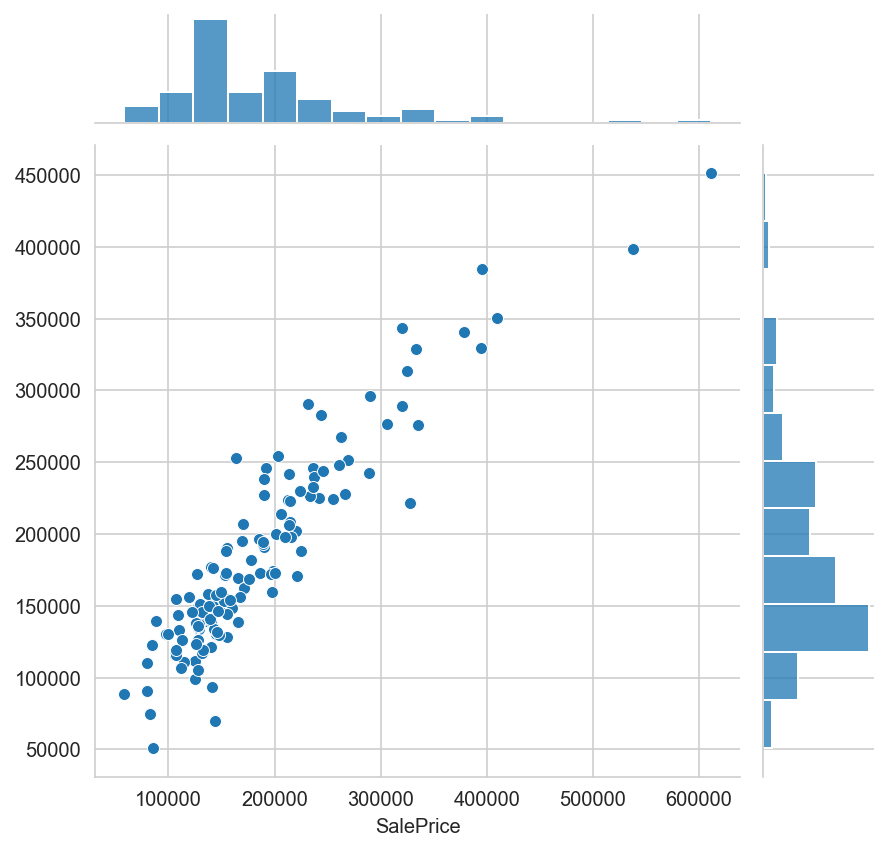

In [124]:
# dsi-unit-3.09-evaluation-cross_validation_train_test-lab

house11_Q2_yhat = slr_Q2.predict(house11_Q2_X_test)

display(
sns.jointplot(x = house11_Q2_y_test, y = house11_Q2_yhat),
print("Test R2 Score: ",slr_Q2.score(house11_Q2_X_test, house11_Q2_y_test)),
print("Train R2 Score: ",slr_Q2.score(house11_Q2_X_train, house11_Q2_y_train))
    )

In [125]:
len(house11_Q2_yhat)

129

The above graph is my first submission for Question 2

Test R2 Score:  0.8194994635588606


- Characterize your model. How well does it perform? What are the best estimates of price?

How well does it perform?

Test R2 Score: 81.9%

What are the best estimates of price?

'Condition0_Feedr',
 'Condition0_RRNe',
 'Condition0_PosN',
 'Condition0_RRNn',
 'MasVnrArea'
 
 

I may try other strategies with k-folds or patsy but I won't use the top 5 chi2 of f_class since that didn't help with quesiton 1

In [126]:
# "I will next proceed to apply chi2, f_classif fundamentals to eliminate chose features in hope to beat this score."

# dsi-unit-3.21-optimization-feature_selection-lab


from sklearn.feature_selection import SelectKBest, chi2, f_classif

# build the selector (we'll build one with each score type)
skb_f_Q2 = SelectKBest(f_classif, k=5)
skb_chi2_Q2 = SelectKBest(chi2, k=5)

# train the selector on our data
skb_f_Q2.fit(house11_Q2_X_train, house11_Q2_y_train)
skb_chi2_Q2.fit(house11_Q2_X_train, house11_Q2_y_train)

# examine results
kbest_Q2 = pd.DataFrame([house11_Q2_X_train.columns, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)


# kbest_Q2.sort_values(by = 'chi2 score', ascending = False)

top5_chi2_Q2 = kbest_Q2.sort_values(by = 'chi2 score', ascending = False)['feature'][:5].to_list()

top5_Fclassif_Q2 = kbest_Q2.sort_values(by = 'f_classif', ascending = False)['feature'][:5].to_list()


display(
    top5_chi2_Q2, # Create list of top 5 featues with highest chi2 score
    top5_Fclassif_Q2 # Create list of top 5 featues with highest f_classif score
    )

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


['BsmtFinSF2', 'PoolArea', 'EnclosedPorch', 'MiscVal', 'HouseStyle_1.5Fin']

['OverallCond02_9 - Excellent',
 'HeatingQC_Ex',
 'Electrical_FuseP',
 'RoofStyle_Flat',
 'CentralAir_N']

In [127]:
# Display Cell to get ready for
# dsi-unit-3.12-regression-regularization_kobe_shots-lab

display(
    house11_Q2_X_train,
    house11_Q2_X_train.dtypes.value_counts(),
    house11_Q2_X_test,
    house11_Q2_X_test.dtypes.value_counts(),
    house11_Q2_y_train,
    house11_Q2_y_test,
    # Make sure all the shapes as all aligned        
    house11_Q2_X_train.shape,
    house11_Q2_X_test.shape,
    house11_Q2_y_train.shape,
    house11_Q2_y_test.shape
    )

,MasVnrArea,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,196.0,0,150,1,0,2,1,3,1,8,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,284,0,1,2,0,3,1,6,...,0,0,0,0,0,0,0,0,0,0
2,162.0,0,434,1,0,2,1,3,1,6,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,540,1,0,1,0,3,1,7,...,0,0,0,0,0,0,0,0,0,0
4,350.0,0,490,1,0,2,1,4,1,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,194.0,0,1573,0,0,2,0,3,1,7,...,0,0,0,0,0,0,0,0,0,0
1452,80.0,0,0,1,0,1,0,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1454,0.0,0,811,1,0,2,0,2,1,6,...,0,0,0,0,0,0,0,0,0,0
1455,0.0,0,953,0,0,2,1,3,1,7,...,0,0,0,0,0,0,0,0,0,0


uint8      150
int64       17
float64      1
dtype: int64

,MasVnrArea,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
26,0.0,486,180,0,1,1,0,3,1,5,...,0,0,0,0,0,0,0,0,0,0
27,200.0,0,486,1,0,2,0,3,1,7,...,0,0,0,0,0,0,0,0,0,0
33,0.0,0,380,0,1,1,1,4,1,6,...,0,0,0,0,0,0,0,0,0,0
38,0.0,0,326,1,0,1,0,3,1,5,...,0,0,0,0,0,0,0,0,0,0
45,412.0,0,1296,1,0,2,0,2,1,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,294.0,0,278,1,0,1,0,2,1,4,...,0,0,0,0,0,1,0,0,0,0
1438,0.0,0,312,1,0,1,0,2,1,6,...,0,0,0,0,0,1,0,0,0,0
1456,119.0,163,589,1,0,2,0,3,1,7,...,0,0,0,0,0,1,0,0,0,0
1457,0.0,0,877,0,0,2,0,4,1,9,...,0,0,0,1,0,0,0,0,1,0


uint8      150
int64       17
float64      1
dtype: int64

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1451    287090
1452    145000
1454    185000
1455    175000
1459    147500
Name: SalePrice, Length: 984, dtype: int64

26      134800
27      306000
33      165500
38      109000
45      319900
         ...  
1428    119000
1438    149700
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 129, dtype: int64

(984, 168)

(129, 168)

(984,)

(129,)

In [128]:
# dsi-unit-3.12-regression-regularization_kobe_shots-lab

# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
# Xs = ss.fit_transform(X)

house11_Q2_Xs_train = ss.fit_transform(house11_Q2_X_train)
house11_Q2_Xs_test = ss.fit_transform(house11_Q2_X_test)


In [129]:
# dsi-unit-3.12-regression-regularization_kobe_shots-lab

# Build a linear regression predicting 'SalePrice' from the rest of the columns.
# Cross-validate the  𝑅2  of an ordinary linear regression model with 10 cross-validation folds.


linreg_Q2 = LinearRegression()

linreg_Q2_scores = cross_val_score(linreg_Q2, house11_Q2_Xs_train, house11_Q2_y_train, cv=10)

print(linreg_Q2_scores,"\n\n")
print(np.mean(linreg_Q2_scores))

[ 7.92561001e-01 -1.86879370e+24 -2.89515774e+25 -9.24848804e+24
 -6.63743868e+20 -3.76710052e+22  7.94673806e-01 -8.50966759e+18
 -4.17873517e+25 -1.71597531e+24] 


-8.36105294092589e+24


In [130]:
# dsi-unit-3.12-regression-regularization_kobe_shots-lab
# Find an optimal value for Ridge regression alpha using RidgeCV

# This take a while to run so I'll comment this all out. The optimal value for Ridge regression alpha is 344.9

from sklearn.linear_model import RidgeCV

# ridge_alphas_Q2 = np.logspace(0, 5, 200)

# optimal_ridge_Q2 = RidgeCV(alphas=ridge_alphas_Q2, cv=10)
# optimal_ridge_Q2.fit(house11_Q2_Xs_train, house11_Q2_y_train)

# print(optimal_ridge_Q2.alpha_)


optimal_ridge_Q2_alpha = 344.896226040576

In [131]:
# dsi-unit-3.12-regression-regularization_kobe_shots-lab
# Ridge Cross-Validation:

from sklearn.linear_model import Ridge

l2 = Ridge(alpha=344.896226040576)
score = cross_val_score(l2,house11_Q2_Xs_train, house11_Q2_y_train, cv=10)

l2.fit(house11_Q2_Xs_train, house11_Q2_y_train) # Originally commented out in dsi-unit-3.12-regression-regularization_kobe_shots-lab
l2.score(house11_Q2_Xs_train, house11_Q2_y_train) # Originally commented out in dsi-unit-3.12-regression-regularization_kobe_shots-lab

np.mean(score)

0.7676863152769883

The above is the score using Ridge (L2) and it is still lower than that from LinearRegression()

In [132]:
# Make the y_hats

house11_Q2_l2_y_hat = pd.DataFrame(l2.predict(house11_Q2_Xs_test))[0]
type(pd.DataFrame(l2.predict(house11_Q2_Xs_test))[0])

pandas.core.series.Series

In [133]:
# house11_Q2_y_test
type(house11_Q2_y_test)


pandas.core.series.Series

In [134]:
display(
len(house11_Q2_y_test),
len(house11_Q2_l2_y_hat)
    )

129

129

129

129

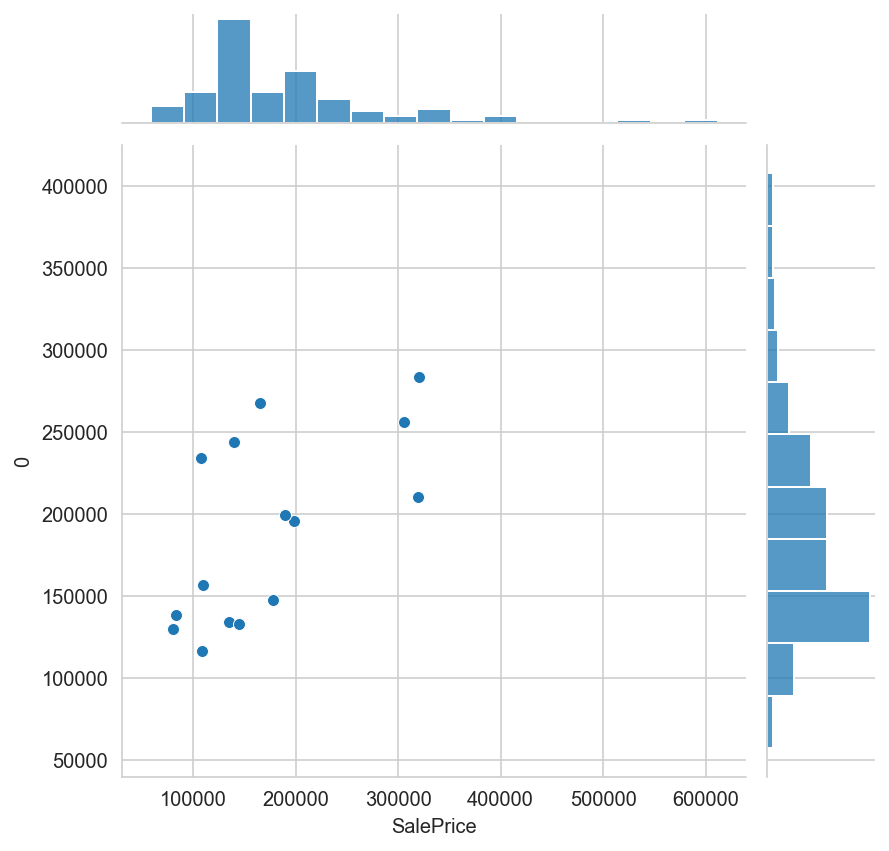

In [135]:

display(
    sns.jointplot(x = house11_Q2_y_test,
                  y = house11_Q2_l2_y_hat
                 ),
    len(house11_Q2_y_test),
    len(house11_Q2_l2_y_hat)
    )

# I'm really not sure why it's only showing fifteen datapoints

The above jointplot is my second submission for Question 2, I'm really not sure why it's only showing fifteen datapoints, but with a score of only 77.9% and lower than LinearRegression(), I think I'll use the LinearRegression() for the presentation

In [136]:
# dsi-unit-3.11-regression-regularization-lesson

import patsy

# Get the non-target cols with a simple list comprehension
non_target_cols = [c for c in house11_Q2_X_train.columns]

# Use some string adding and joining to make the simple model formula:
formula_simple = 'SalePrice' + ' ~ ' + ' + '.join(non_target_cols) + ' -1'
print(formula_simple)

# Make the complex formula:
formula_complex = 'SalePrice' + ' ~ (' + ' + '.join(non_target_cols) + ')**2 -1'
print(formula_complex)


# # Create the X and Y pairs for both!
# Y, X = patsy.dmatrices(formula_simple, data=house11_Q2_X_train, return_type='dataframe')
# Yoverfit, Xoverfit = patsy.dmatrices(formula_complex, data=house11_Q2_X_train, return_type='dataframe')

# Y = Y.values.ravel()
# Yoverfit = Yoverfit.values.ravel()

# SyntaxError: invalid syntax


SalePrice ~ MasVnrArea + BsmtFinSF2 + BsmtUnfSF + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + Fireplaces + WoodDeckSF + OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch + PoolArea + MiscVal + HouseStyle_1.5Fin + HouseStyle_1.5Unf + HouseStyle_1Story + HouseStyle_2.5Fin + HouseStyle_2.5Unf + HouseStyle_2Story + HouseStyle_SFoyer + HouseStyle_SLvl + OverallQual02_10 - Very Excellent + OverallQual02_2 - Poor + OverallQual02_3 - Fair + OverallQual02_4 - Below Average + OverallQual02_5 - Average + OverallQual02_6 - Above Average + OverallQual02_7 - Good + OverallQual02_8 - Very Good + OverallQual02_9 - Excellent + OverallCond02_2 - Poor + OverallCond02_3 - Fair + OverallCond02_4 - Below Average + OverallCond02_5 - Average + OverallCond02_6 - Above Average + OverallCond02_7 - Good + OverallCond02_8 - Very Good + OverallCond02_9 - Excellent + RoofStyle_Flat + RoofStyle_Gable + RoofStyle_Gambrel + RoofStyle_Hip + RoofStyle_Mansard + Roo

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.


 


In [137]:
# dsi-unit-3.21-optimization-feature_selection-lab

# Sri says duing class on Sat 27/11/2021
    # Use Lasso
    # Use Ridge

# Geoff says this is the 'first step' on Mon 29/11/2021    

# Geoff warns there might be 'class imbalance' on Mon 29/11/2021
    # Solutions:
        # Up-sampling
        # Down-sampling - Use 'smote'
        # 'smote' is not in SK-Learn
    # 

# from imblearn.over_sampling import SMOTE
#     ModuleNotFoundError: No module named 'imblearn'

In [138]:
# List-Comp for all object-columns
# [col for col in house10.columns if house10[col].dtype == 'O']

In [139]:
# Can't use DataFrame called 'house10' because the dummy column named 'SaleCondition_Abnorml' is missing after removing the Nulls
pd.get_dummies(house10[[col for col in house10.columns if house10[col].dtype == 'O']], drop_first = True)


,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,OverallQual02_7 - Good,OverallQual02_8 - Very Good,OverallQual02_9 - Excellent,OverallCond02_3 - Fair,OverallCond02_4 - Below Average,OverallCond02_5 - Average,OverallCond02_6 - Above Average,OverallCond02_7 - Good,OverallCond02_8 - Very Good,OverallCond02_9 - Excellent
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1456,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1457,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1458,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [140]:
house10[[col for col in house10.columns if house10[col].dtype != 'O']]
# Can't use DataFrame called 'house10' because the dummy column named 'SaleCondition_Abnorml' is missing after removing the Nulls

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MoYrSold,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,Condition0_RRNn
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,2008.125000,0,0,1,0,0,0,0,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,2007.375000,0,1,1,0,0,0,0,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,2008.708333,0,0,1,0,0,0,0,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,2006.125000,0,0,1,0,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,2008.958333,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,2007.625000,0,0,1,0,0,0,0,0,0
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,2010.125000,0,0,1,0,0,0,0,0,0
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,2010.375000,0,0,1,0,0,0,0,0,0
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,2010.291667,0,0,1,0,0,0,0,0,0


In [141]:
house10_2_DummiedObj = pd.concat([house10[[col for col in house10.columns if house10[col].dtype != 'O']],pd.get_dummies(house10[[col for col in house10.columns if house10[col].dtype == 'O']], drop_first = True)],axis = 1)
house10_2_DummiedObj.columns

# Can't use DataFrame called 'house10' because the dummy column named 'SaleCondition_Abnorml' is missing after removing the Nulls

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'OverallQual02_7 - Good', 'OverallQual02_8 - Very Good',
       'OverallQual02_9 - Excellent', 'OverallCond02_3 - Fair',
       'OverallCond02_4 - Below Average', 'OverallCond02_5 - Average',
       'OverallCond02_6 - Above Average', 'OverallCond02_7 - Good',
       'OverallCond02_8 - Very Good', 'OverallCond02_9 - Excellent'],
      dtype='object', length=256)

In [142]:
corr_sort(house10_2_DummiedObj)
# Can't use DataFrame called 'house10' because the dummy column named 'SaleCondition_Abnorml' is missing after removing the Nulls

,level_0,level_1,corr
0,BldgType_Duplex,MSSubClass02_90 - DUPLEX - ALL STYLES AND AGES,1.000000
1,Exterior2nd_CBlock,Exterior1st_CBlock,1.000000
2,Exterior1st_CBlock,Exterior2nd_CBlock,1.000000
3,MSSubClass02_90 - DUPLEX - ALL STYLES AND AGES,BldgType_Duplex,1.000000
4,BsmtCond_Po,Electrical_Mix,1.000000
...,...,...,...
65275,ExterQual_Gd,ExterQual_TA,-0.907297
65276,ExterCond_Gd,ExterCond_TA,-0.914368
65277,ExterCond_TA,ExterCond_Gd,-0.914368
65278,RoofStyle_Hip,RoofStyle_Gable,-0.946117


In [143]:
# Number of rows where 'SaleCondition' == 'Abnorml'
house05[house05['SaleCondition'] == 'Abnorml'].shape[0]

101

In [144]:
# Find the colummns in DataFrame named 'house05' which have any nulls

# house05[[col for col in house05.columns if house05[col].dtypes != 'O']]
# house05[[col for col in house05.columns if house05[col].dtypes != 'O']].isnull().sum()
house05[[col for col in house05.columns if house05[col].dtypes != 'O']].isnull().sum()[house05[[col for col in house05.columns if house05[col].dtypes != 'O']].isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [145]:
house05_2 = house05.copy()

# Create null-dummies
house05_2['LotFrontage_null'] = house05['LotFrontage'].isnull().astype(int)
house05_2['MasVnrArea_null'] = house05['MasVnrArea'].isnull().astype(int)
house05_2['GarageYrBlt_null'] = house05['GarageYrBlt'].isnull().astype(int)

# Drop columns with nulls
house05_3 = house05_2.drop(columns = ['LotFrontage','MasVnrArea','GarageYrBlt'])

# Drop 'SaleType' since this is after-the-fact
house05_3 = house05_2.drop(columns = ['SaleType'])



# MSZoning: Identifies the general zoning classification of the sale.
#        A	Agriculture
#        C	Commercial
#        FV	Floating Village Residential
#        I	Industrial
#        RH	Residential High Density
#        RL	Residential Low Density
#        RP	Residential Low Density Park 
#        RM	Residential Medium Density

# Drop non-residential
house05_3 = house05_3[house05_3['MSZoning'].isin(['RL', 'RM', 'FV', 'RH'])]




# Check new null-dummy columns
# house05_3[['LotFrontage_null','MasVnrArea_null','GarageYrBlt_null']]

In [146]:
house05_Q3 = pd.get_dummies(house05_3)



# Drop other options of 'SaleCondition'
house05_Q3 = house05_Q3.drop(columns = ['SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'])


# Drop columns with nulls
house05_Q3 = house05_Q3.drop(columns = ['LotFrontage','MasVnrArea','GarageYrBlt'])


display(
    house05.dtypes.value_counts(),
    house05_2.dtypes.value_counts(),
    house05_Q3.dtypes.value_counts()
    )

object     46
int64      29
float64     4
dtype: int64

object     46
int64      29
float64     4
int32       3
dtype: int64

uint8      271
int64       29
int32        3
float64      1
dtype: int64

In [147]:
# Check that DataFrame: house05_Q3 has zero nulls

house05_Q3.isnull().sum()[house05_Q3.isnull().sum() > 0]

Series([], dtype: int64)

In [148]:
#  corr_sort(pd.get_dummies(house05))[corr_sort(pd.get_dummies(house05))['level_0'] == 'SaleCondition_Abnorml'].head(60)
corr_sort(house05_Q3)[corr_sort(house05_Q3)['level_0'] == 'SaleCondition_Abnorml'].head(60)

,level_0,level_1,corr
4104,SaleCondition_Abnorml,PoolQC_Ex,0.139574
4106,SaleCondition_Abnorml,Exterior1st_Stone,0.139574
6252,SaleCondition_Abnorml,MSZoning_RH,0.104631
6773,SaleCondition_Abnorml,Functional_Sev,0.098660
6775,SaleCondition_Abnorml,Electrical_Mix,0.098660
6776,SaleCondition_Abnorml,Utilities_NoSeWa,0.098660
7263,SaleCondition_Abnorml,BsmtQual_TA,0.093265
8488,SaleCondition_Abnorml,ExterQual_TA,0.082744
8497,SaleCondition_Abnorml,GarageYrBlt_null,0.082729
8541,SaleCondition_Abnorml,MasVnrType_BrkCmn,0.082427


In [149]:

# other_sale_conditions = ['SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family','SaleCondition_Normal','SaleCondition_Partial']

house05_Q3_X = house05_Q3.drop(columns = ['SaleCondition_Abnorml','SalePrice'])
house05_Q3_y = house05_Q3['SaleCondition_Abnorml']

display(
    house05_Q3.shape,
    house05_Q3_X.shape,
    house05_Q3_y.shape
    )

(1450, 304)

(1450, 302)

(1450,)

In [150]:
house05_Q3.isnull().sum()

LotArea                            0
YearBuilt                          0
YearRemodAdd                       0
BsmtFinSF1                         0
BsmtFinSF2                         0
                                  ..
OverallCond02_5 - Average          0
OverallCond02_6 - Above Average    0
OverallCond02_7 - Good             0
OverallCond02_8 - Very Good        0
OverallCond02_9 - Excellent        0
Length: 304, dtype: int64

In [151]:
from sklearn.linear_model import Ridge

def ridge_coefs(X, Y, alphas):
    '''
    dsi-unit-3.11-regression-regularization-lesson
    '''
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    ridge_reg = Ridge()
    
    # Iterate through the alphas fed into the function:
    for a in alphas:
        
        # On each alpha reset the ridge model's alpha to the current one:
        ridge_reg.set_params(alpha=a)
        
        # fit or refit the model on the provided X, Y
        ridge_reg.fit(X, Y)
        
        # Get out the coefficient list
        coefs.append(ridge_reg.coef_)
        
    return coefs

In [152]:
# dsi-unit-3.11-regression-regularization-lesson

# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
# r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above

# r_coefs = ridge_coefs(X, Y, r_alphas) # original line fromdsi-unit-3.11-regression-regularization-lesson

# r_coefs = ridge_coefs(house05_Q3_X, house05_Q3_y, r_alphas)

# ValueError: Input contains NaN, infinity or a value too large for dtype('float64')

,f_classif
feature,
Exterior1st_Stone,28.768775
PoolQC_Ex,28.768775
YearRemodAdd,22.426016
MSZoning_RH,16.027682
Utilities_AllPub,14.232973
...,...
Neighborhood_SawyerW,0.002511
Neighborhood_Sawyer,0.002332
LotFrontage_null,0.001654


<AxesSubplot:xlabel='feature'>

,chi2 score
feature,
LotArea,10038.970571
PoolArea,2572.068249
MiscVal,2541.248367
BsmtFinSF2,2273.120858
LowQualFinSF,1379.445313
...,...
BedroomAbvGr,0.000776
BldgType_1Fam,0.000416
BldgType_2fmCon,0.000103


<AxesSubplot:xlabel='feature'>

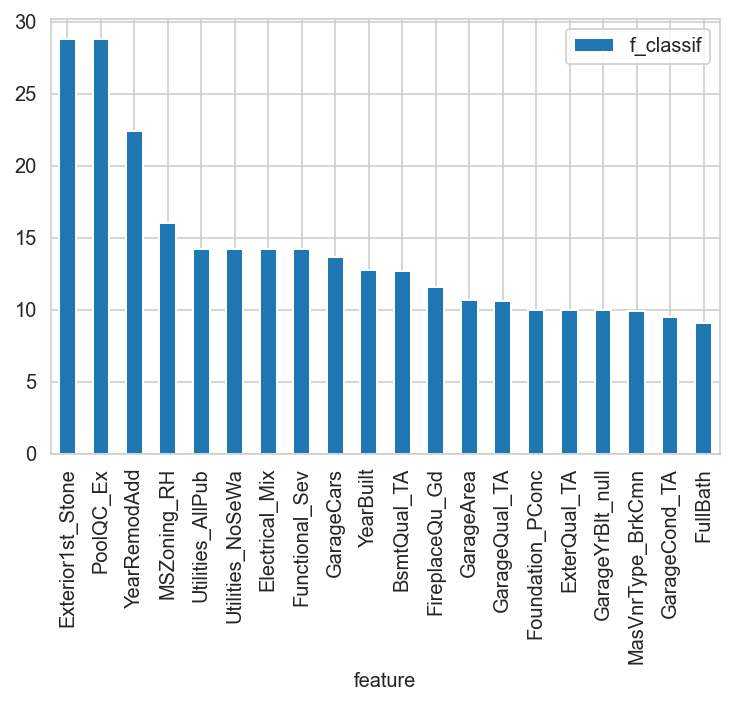

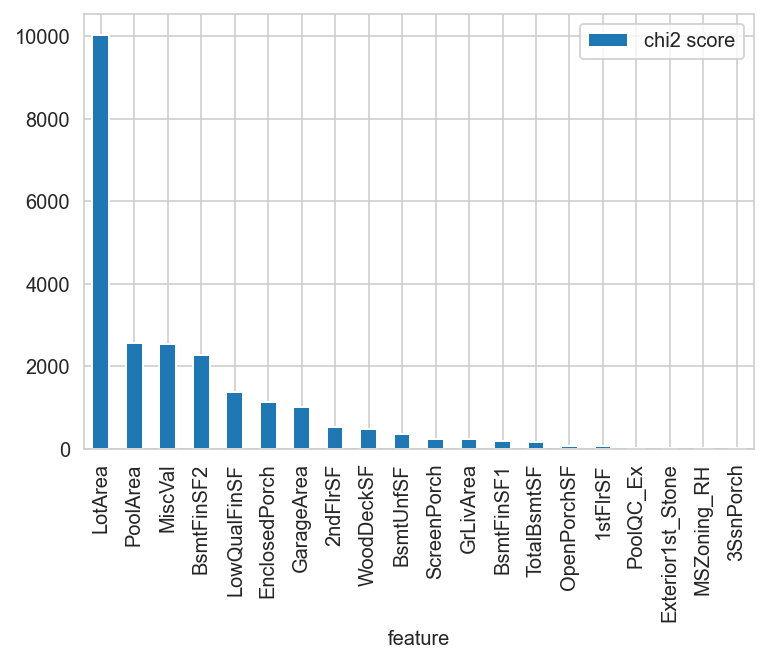

In [153]:
# dsi-unit-3.21-optimization-feature_selection-lab

from sklearn.feature_selection import SelectKBest, chi2, f_classif

# # build the selector (we'll build one with each score type)
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# # train the selector on our data
skb_f.fit(house05_Q3_X, house05_Q3_y)
skb_chi2.fit(house05_Q3_X, house05_Q3_y)

# examine results
kbest = pd.DataFrame([house05_Q3_X.columns, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)

# display(
#     kbest.head(60),
#     kbest.sort_values(by = 'chi2 score', ascending  = False).head(60)
#     )


f_classif_Q3 = kbest[['feature','f_classif']].reset_index(drop = True)
f_classif_Q3.index = f_classif_Q3['feature']
f_classif_Q3 = f_classif_Q3.drop(columns = 'feature')


chi2_Q3 = kbest.sort_values(by = 'chi2 score', ascending  = False)[['feature','chi2 score']].reset_index(drop = True)
chi2_Q3.index = chi2_Q3['feature']
chi2_Q3 = chi2_Q3.drop(columns = 'feature')


display(
    f_classif_Q3,
    f_classif_Q3.head(20).plot(kind='bar'),
    chi2_Q3,
    chi2_Q3.head(20).plot(kind='bar')
    )

# ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

The two barcharts above are my first, and likely only, submission for Question 3

"1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature."



Top 5 highest chi-squared features

- LotArea
- PoolArea
- MiscVal
- BsmtFinSF2
- LowQualFinSF


Top 5 highest f_class features

- Exterior1st_Stone
- PoolQC_Ex
- YearRemodAdd
- MSZoning_RH
- Utilities_AllPub

<AxesSubplot:xlabel='feature'>

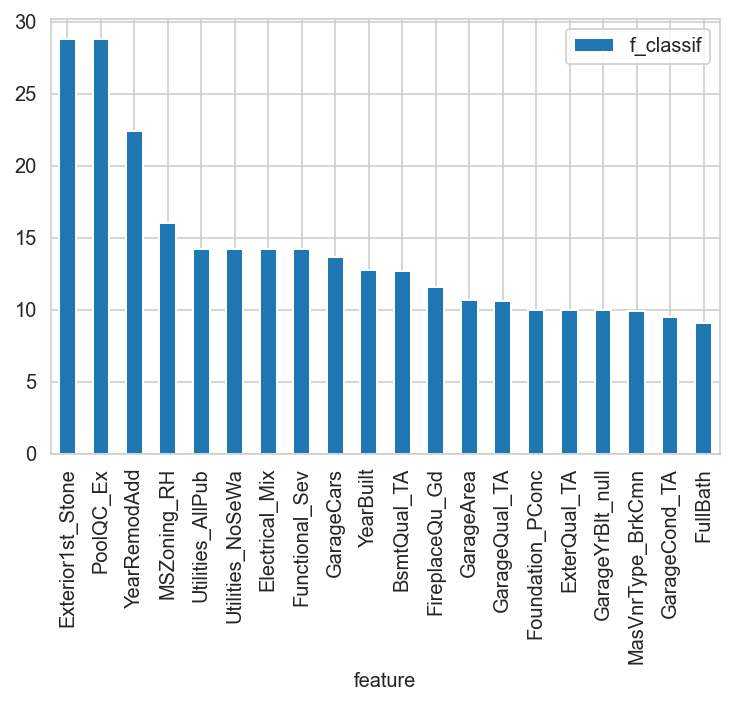

In [154]:
# Create chart to add to slieshow

f_classif_Q3.head(20).plot(kind='bar')


# f_classif: Used only for categorical targets and based on the Analysis of Variance (ANOVA) 
# statistical test. 

# chi2: Performs the chi-square statistic for categorical targets, 
# which is less sensible to the nonlinear relationship between the predictive variable and its target.

# https://www.dummies.com/programming/big-data/data-science/how-to-use-python-to-select-the-right-variables-for-data-science/#:~:text=f_classif%3A%20Used%20only%20for%20categorical,predictive%20variable%20and%20its%20target.


<AxesSubplot:xlabel='feature'>

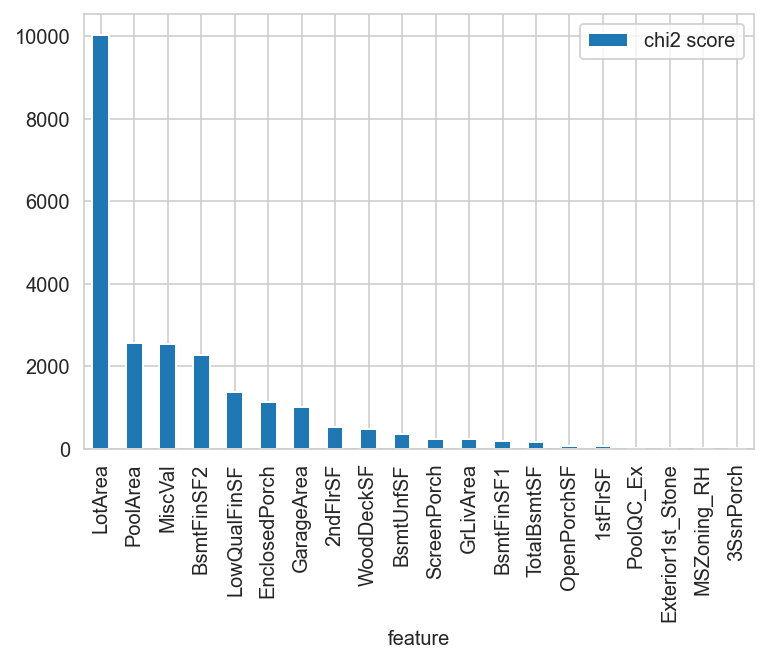

In [155]:
# Create chart to add to slieshow

chi2_Q3.head(20).plot(kind='bar')

# f_classif: Used only for categorical targets and based on the Analysis of Variance (ANOVA) 
# statistical test. 

# chi2: Performs the chi-square statistic for categorical targets, 
# which is less sensible to the nonlinear relationship between the predictive variable and its target.

# https://www.dummies.com/programming/big-data/data-science/how-to-use-python-to-select-the-right-variables-for-data-science/#:~:text=f_classif%3A%20Used%20only%20for%20categorical,predictive%20variable%20and%20its%20target.


In [156]:
# dsi-unit-3.21-optimization-feature_selection-lab

from sklearn.preprocessing import StandardScaler

house05_Q3_Xs = StandardScaler().fit_transform(house05_Q3_X)



from sklearn.linear_model import LogisticRegressionCV

lrcv = LogisticRegressionCV(penalty='l1', Cs=1000, cv=100, solver='liblinear')
# lrcv.fit(house05_Q3_Xs, house05_Q3_y) # Very slow

In [157]:
display(
    house11_Q1_X_train,
    house11_Q1_X_test,
    house11_Q1_y_train,
    house11_Q1_y_test
    )

,LotFrontage,LotArea,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,78.0,9262,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1452,35.0,3675,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1454,62.0,7500,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,62.0,7917,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


,LotFrontage,LotArea,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
26,60.0,7200,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27,98.0,11478,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
33,70.0,10552,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
38,68.0,7922,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
45,61.0,7658,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,60.0,7200,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1438,90.0,7407,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,13175,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,9042,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1451    287090
1452    145000
1454    185000
1455    175000
1459    147500
Name: SalePrice, Length: 984, dtype: int64

26      134800
27      306000
33      165500
38      109000
45      319900
         ...  
1428    119000
1438    149700
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 129, dtype: int64

In [158]:
# Merging the train-data with test-data incase I need it

display(
    pd.concat([house11_Q1_X_train,house11_Q1_X_test], axis =0),
    pd.concat([house11_Q1_y_train,house11_Q1_y_test], axis =0)
    )

,LotFrontage,LotArea,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,60.0,7200,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1438,90.0,7407,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,13175,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,9042,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1428    119000
1438    149700
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 1113, dtype: int64

In [159]:
# Make sure there are not object-columns to to put through StandardScaler
house11_Q1_X_train.dtypes.value_counts()

uint8      117
int64       11
float64      3
dtype: int64

In [160]:
# Trying to get to the Lasso Coefficients
# dsi-unit-3.21-optimization-feature_selection-lab

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
house11_Q1_Xs_train = ss.fit_transform(house11_Q1_X_train)

# Take a look at effect of StandardScaler() on house11_Q1_Xs_train
pd.DataFrame(house11_Q1_Xs_train, columns = house11_Q1_X_train.columns)


,LotFrontage,LotArea,Condition0_Artery,Condition0_Feedr,Condition0_Norm,Condition0_PosA,Condition0_PosN,Condition0_RRAe,Condition0_RRAn,Condition0_RRNe,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.223177,-0.201220,-0.197663,-0.236208,0.106326,-0.0553,-0.084645,-0.084645,-0.154704,-0.031895,...,-0.063888,-0.354765,-0.031895,0.434057,-0.257077,-0.031895,-0.090536,-0.128565,0.503491,-0.360189
1,0.390363,-0.065138,-0.197663,4.233566,0.106326,-0.0553,-0.084645,-0.084645,-0.154704,-0.031895,...,-0.063888,-0.354765,-0.031895,0.434057,-0.257077,-0.031895,-0.090536,-0.128565,0.503491,-0.360189
2,-0.100469,0.130110,-0.197663,-0.236208,0.106326,-0.0553,-0.084645,-0.084645,-0.154704,-0.031895,...,-0.063888,-0.354765,-0.031895,0.434057,-0.257077,-0.031895,-0.090536,-0.128565,0.503491,-0.360189
3,-0.427691,-0.071055,-0.197663,-0.236208,0.106326,-0.0553,-0.084645,-0.084645,-0.154704,-0.031895,...,-0.063888,-0.354765,-0.031895,0.434057,3.889878,-0.031895,-0.090536,-0.128565,-1.986133,-0.360189
4,0.553974,0.486290,-0.197663,-0.236208,0.106326,-0.0553,-0.084645,-0.084645,-0.154704,-0.031895,...,-0.063888,-0.354765,-0.031895,0.434057,-0.257077,-0.031895,-0.090536,-0.128565,0.503491,-0.360189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.308558,-0.105134,-0.197663,-0.236208,0.106326,-0.0553,-0.084645,-0.084645,-0.154704,-0.031895,...,-0.063888,2.818768,-0.031895,-2.303843,-0.257077,-0.031895,-0.090536,-0.128565,-1.986133,2.776322
980,-1.450258,-0.766256,-0.197663,-0.236208,0.106326,-0.0553,-0.084645,-0.084645,-0.154704,-0.031895,...,-0.063888,-0.354765,-0.031895,0.434057,-0.257077,-0.031895,-0.090536,-0.128565,0.503491,-0.360189
981,-0.345886,-0.313635,-0.197663,-0.236208,0.106326,-0.0553,-0.084645,-0.084645,-0.154704,-0.031895,...,-0.063888,-0.354765,-0.031895,0.434057,-0.257077,-0.031895,-0.090536,-0.128565,0.503491,-0.360189
982,-0.345886,-0.264291,-0.197663,-0.236208,0.106326,-0.0553,-0.084645,-0.084645,-0.154704,-0.031895,...,-0.063888,-0.354765,-0.031895,0.434057,-0.257077,-0.031895,-0.090536,-0.128565,0.503491,-0.360189


In [161]:
# Trying to get to the Lasso Coefficients
# dsi-unit-3.21-optimization-feature_selection-lab

from sklearn.linear_model import LogisticRegressionCV

lrcv = LogisticRegressionCV(penalty='l2', Cs=100, cv=10, solver='newton-cg')
# Solver options:
# {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},             default='lbfgs'

# lrcv = LogisticRegressionCV(penalty='l1', Cs=100, cv=10, solver='newton-cg')
# ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


# lrcv.fit(house11_Q1_Xs_train, house11_Q1_y_train)
# ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: -1.0

In [162]:
# Function to crossvalidate accuracy of a knn model acros folds

# dsi-unit-3.14-classification-knn_intro_to_classification-lesson

def accuracy_crossvalidator(X, y, knn, cv_indices):
    '''
    Function to crossvalidate accuracy of a knn model acros folds
    
    dsi-unit-3.14-classification-knn_intro_to_classification-lesson
    
    '''
    # list to store the scores/accuracy of folds
    scores = []
    
    # iterate through the training and testing folds in cv_indices
    for train_i, test_i in cv_indices:
        
        # get the current X train & test subsets of X
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        # get the Y train & test subsets of Y
        Y_train = y[train_i]
        Y_test = y[test_i]

        # fit the knn model on the training data
        knn.fit(X_train, Y_train)
        
        # get the accuracy predicting the testing data
        acc = knn.score(X_test, Y_test)
        scores.append(acc)
        
        print(('Fold accuracy:', acc))
        
    print(('Mean CV accuracy:', np.mean(scores)))
    return scores


In [163]:
display(
    house11_Q1_Xs_train.shape, 
    house11_Q1_y_train.shape
    )

(984, 131)

(984,)

In [164]:
# dsi-unit-3.14-classification-knn_intro_to_classification-lesson


from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
cv_indices = skf.split(house11_Q1_Xs_train, house11_Q1_y_train)

# Cross-validate the mean accuracy for a KNN model with 5 neighbors

from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# knn5.fit(Xs, y)

# knn5.score(Xs, y)

# scores = accuracy_crossvalidator(house11_Q1_Xs_train, house11_Q1_y_train, knn5, cv_indices)
# scores
# KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([ 16,  24,  31,  39,  43,\n            ...\n            975, 976, 977, 980, 983],\n           dtype='int64', length=252). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"


In [165]:
# Was attempting to create 2-hue scatter plots